In [465]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Read in data

In [467]:
data = pd.read_csv('model_data/full_model_data.csv', index_col=0)

In [468]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
2  100049            6.250000           10.1                33.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   

                               urban_rural            denomination   FSM  \
1  (England/Wales) Urban major conurbation  No religious character  41.2   
2  (England/Wales) Urban major conurbation  No religious character  63.5   
3  (England/Wales) Urban major conurbation  No religious character  35.6   
4  (England/Wales) Urban major conurbation  No religious character  61.8   
5  (England/Wales) Urban major conurbation  No religious character  41.8   

   White_British   EAL  perc_boys   region_name             school_name  \
1           10.8  51.7  56.874466  Inner London         The UCL Academy   
2           14.2  57.5  56.924644  Inner London       Haverstock School   
3           38.8  34.1   4.963971  Inner London  Parliament Hill School   
4            3.9  67.3  56.163114  Inner London      Regent High School   
5           11.4  38.1  51.630023  Inner London        Hampstead School   

   headcount  perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
1     1171.0         0.34159   14.51751             8.45431            168   
2      982.0         0.00000    7.43381             4.98982            151   
3     1249.0         0.08006    9.12730             5.04404            174   
4     1079.0         0.09268    5.37535             4.26321            173   
5     1319.0         0.07582    3.26005             2.65353            197   

   KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate POSTCODE  \
1        105.1          47.4       -0.18          0             27  NW3 3AQ   
2        102.3          41.7       -0.32          0             26  NW3 2BQ   
3        107.1          59.1        0.61          0             40  NW5 1RL   
4        103.5          43.8       -0.06          0             21  NW1 1RX   
5        103.2          44.6       -0.04          0             10  NW2 3RT   

   post16 school_sex                 type         Ofsted_rating  sen_support  \
1       1      Mixed  Academy sponsor led  Requires improvement    10.247652   
2       1      Mixed     Community school                  Good    19.144603   
3       1      Girls     Community school                  Good    13.370697   
4       1      Mixed     Community school                  Good    17.886932   
5       1      Mixed     Community school                  Good     9.628506   

       ehcp     LSOA11  IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1  3.245090  E01000963  8.0                 13.0                      0.2   
2  2.851324  E01000902  2.0                  NaN                      NaN   
3  1.281025  E01000912  4.0                 14.7                      0.1   
4  3.614458  E01000952  2.0                 11.9                      0.2   
5  2.880970  E01000871  7.0                 14.9                      0.2   

   absence_rate_non_excl  
1              10.803701  
2               9.832177  
3               7.769210  
4              11.246731  
5               8.103096

In [469]:
data['not_sustained_rate'].describe()

count    3146.000000
mean        5.467439
std         3.908988
min         0.000000
25%         2.728048
50%         4.615385
75%         7.352941
max        36.363636
Name: not_sustained_rate, dtype: float64

In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3146 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3146 non-null   int64  
 1   not_sustained_rate       3146 non-null   float64
 2   total_absence            3119 non-null   float64
 3   persistent_absence       3119 non-null   float64
 4   urban_rural              3120 non-null   object 
 5   denomination             3120 non-null   object 
 6   FSM                      3120 non-null   float64
 7   White_British            3120 non-null   float64
 8   EAL                      3120 non-null   float64
 9   perc_boys                3120 non-null   float64
 10  region_name              3120 non-null   object 
 11  school_name              3120 non-null   object 
 12  headcount                3120 non-null   float64
 13  perm_excl_rate           3120 non-null   float64
 14  susp_rate                3120

### Drop school types that are specialist or only KS4 & 5

In [471]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [472]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3069 non-null   int64  
 1   not_sustained_rate       3069 non-null   float64
 2   total_absence            3054 non-null   float64
 3   persistent_absence       3054 non-null   float64
 4   urban_rural              3055 non-null   object 
 5   denomination             3055 non-null   object 
 6   FSM                      3055 non-null   float64
 7   White_British            3055 non-null   float64
 8   EAL                      3055 non-null   float64
 9   perc_boys                3055 non-null   float64
 10  region_name              3055 non-null   object 
 11  school_name              3055 non-null   object 
 12  headcount                3055 non-null   float64
 13  perm_excl_rate           3055 non-null   float64
 14  susp_rate                3055

In [474]:
data = data.dropna(subset=['total_absence'])

In [475]:
data = data.dropna(subset=['Progress_8'])

In [476]:
data = data.dropna(subset=['Ofsted_rating'])

In [477]:
data = data.dropna(subset=['pupil_teacher_ratio'])

### Edit categorical vars

#### School sex

In [478]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [479]:
data['single_sex_binary'] = data['school_sex']

In [480]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [481]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  
count              2972.000000            2972.000000        2972.000000  
mean                  0.230585               8.819434           0.113392  
std                   0.120709               2.263271           0.317124  
min                   0.000000               3.034038           0.000000  
25%                   0.100000               7.330413           0.000000  
50%                   0.200000               8.653188           0.000000  
75%          

In [482]:
data.loc[data['assistant_teacher_ratio'] == 1].shape

(1, 35)

In [483]:
data.loc[data['not_sustained_rate'] == 0].shape

(95, 35)

In [484]:
data.loc[data['not_sustained_rate'] >= (100/7)].shape

(79, 35)

In [485]:
data.loc[data['susp_rate'] == 0].shape

(26, 35)

In [486]:
data.loc[data['susp_rate'] > 200].shape

(8, 35)

#### Ofsted rating

In [487]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [488]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [489]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

# Shape of the Data

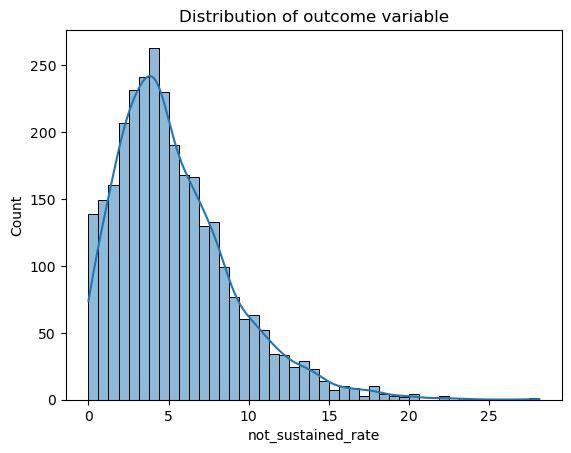

In [490]:
# distribution of outcomes
sns.histplot(data['not_sustained_rate'], kde=True )
plt.title('Distribution of outcome variable');

In [491]:
performance_indicators = data[['not_sustained_rate', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [492]:
#sns.pairplot(performance_indicators);

In [493]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [494]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

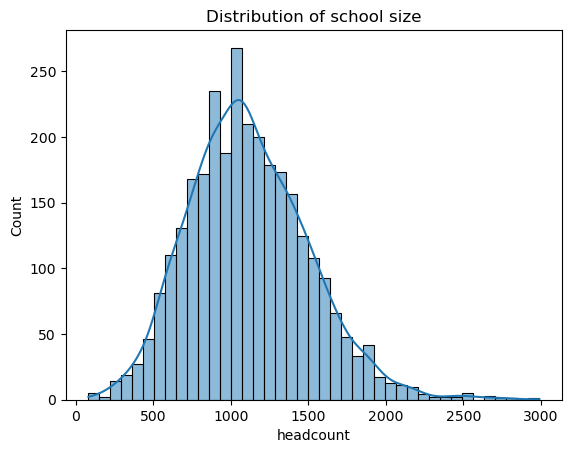

In [495]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

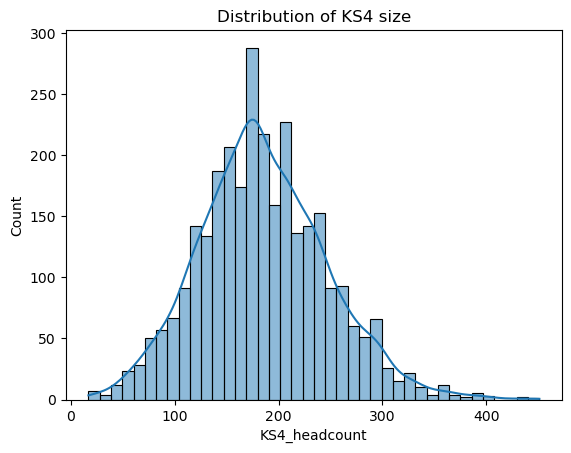

In [496]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

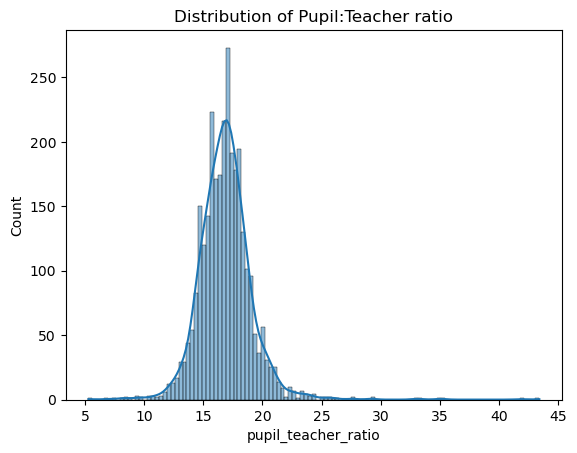

In [497]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### Performance indicators

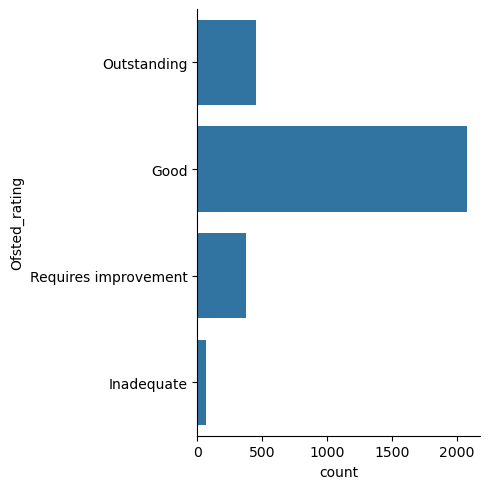

In [498]:
sns.catplot(data['Ofsted_rating'], kind='count');

In [499]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              450
Good                    2077
Requires improvement     374
Inadequate                71
dtype: int64

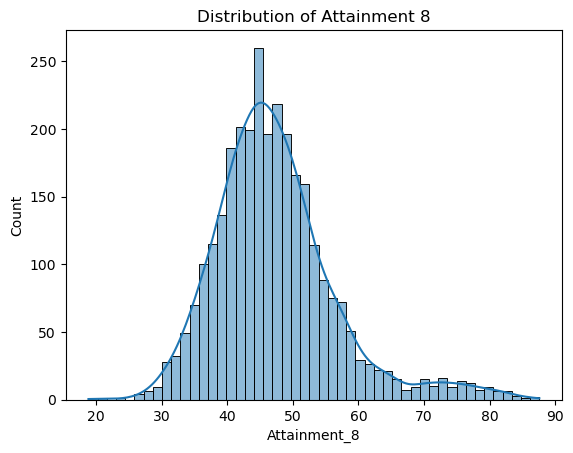

In [500]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

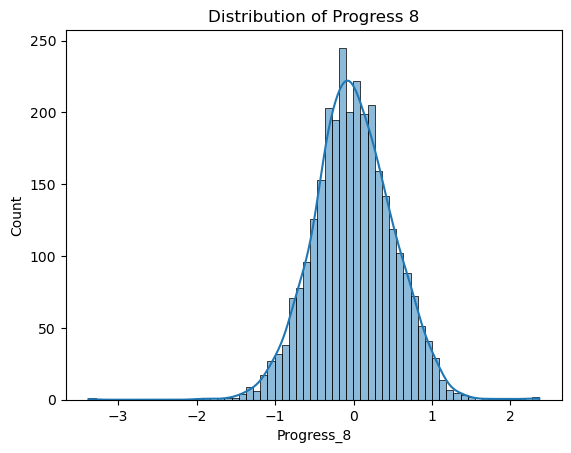

In [501]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

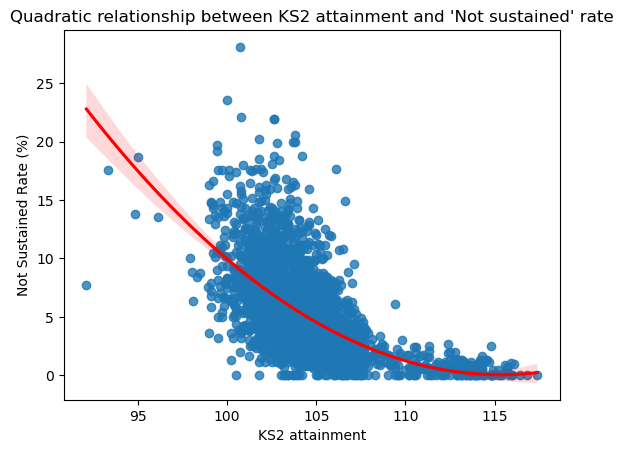

In [502]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

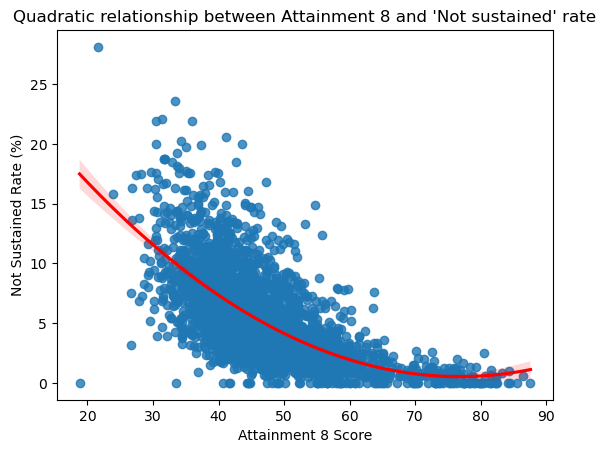

In [503]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   object  
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

### Other school characteristics

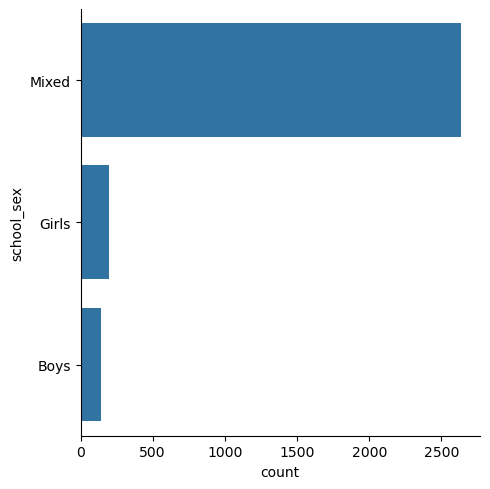

In [505]:
sns.catplot(data['school_sex'], kind='count');

In [506]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2635
1     337
dtype: int64

In [507]:
data.groupby('post16').size()

post16
0    1112
1    1860
dtype: int64

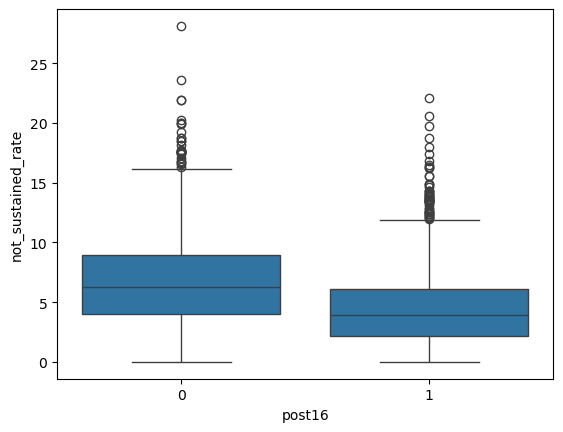

In [508]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

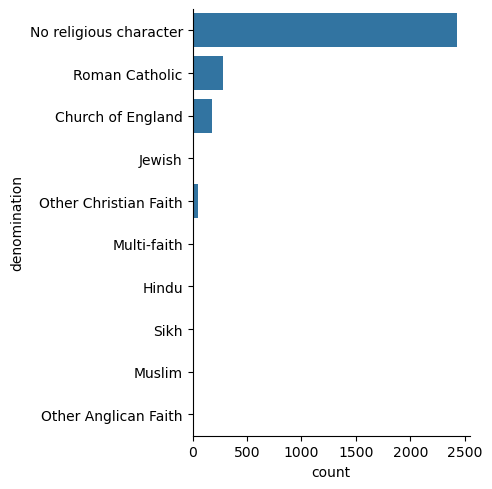

In [509]:
sns.catplot(data['denomination'], kind='count');

In [510]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

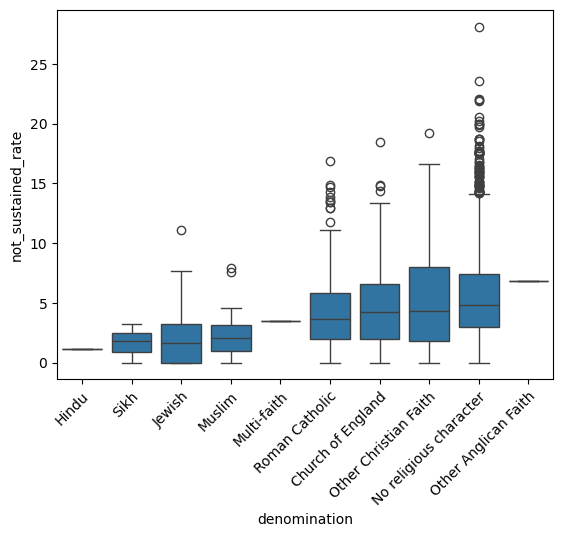

In [511]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [512]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [513]:
data.groupby('denomination').size()

denomination
Christian       515
No faith       2425
Other faith      32
dtype: int64

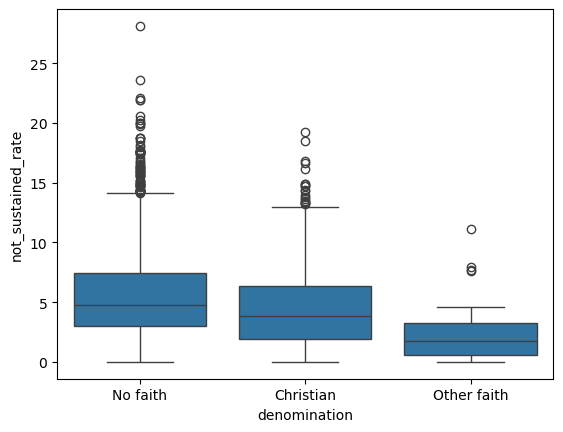

In [514]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [515]:
data['faith_binary'] = data['denomination']

In [516]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [517]:
data.groupby('faith_binary').size()

faith_binary
0    2425
1     547
dtype: int64

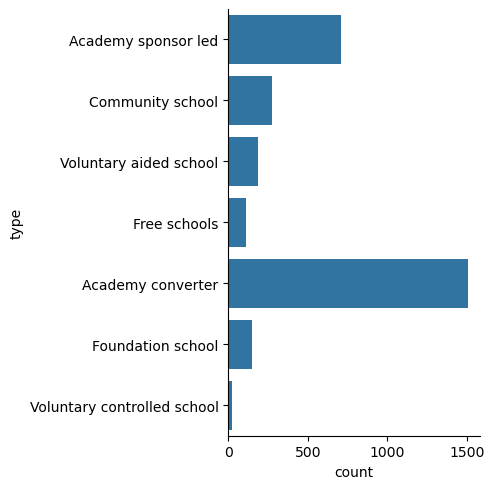

In [518]:
sns.catplot(data['type'], kind='count');

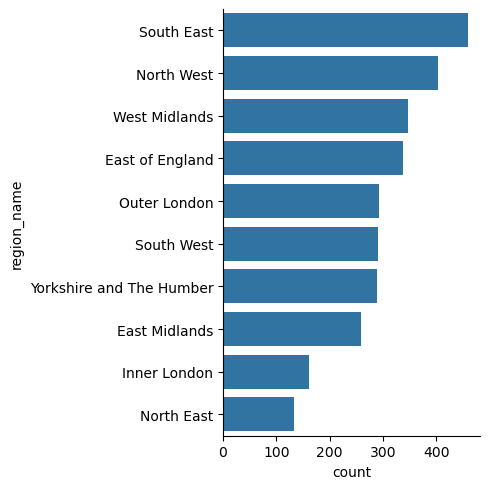

In [519]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [520]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

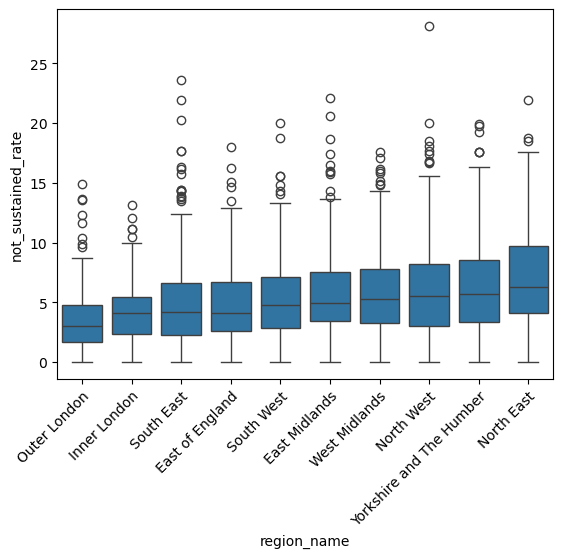

In [521]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [522]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [523]:
data.groupby('region_new').size()

region_new
London       453
Midlands     606
North        826
South       1087
dtype: int64

In [524]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

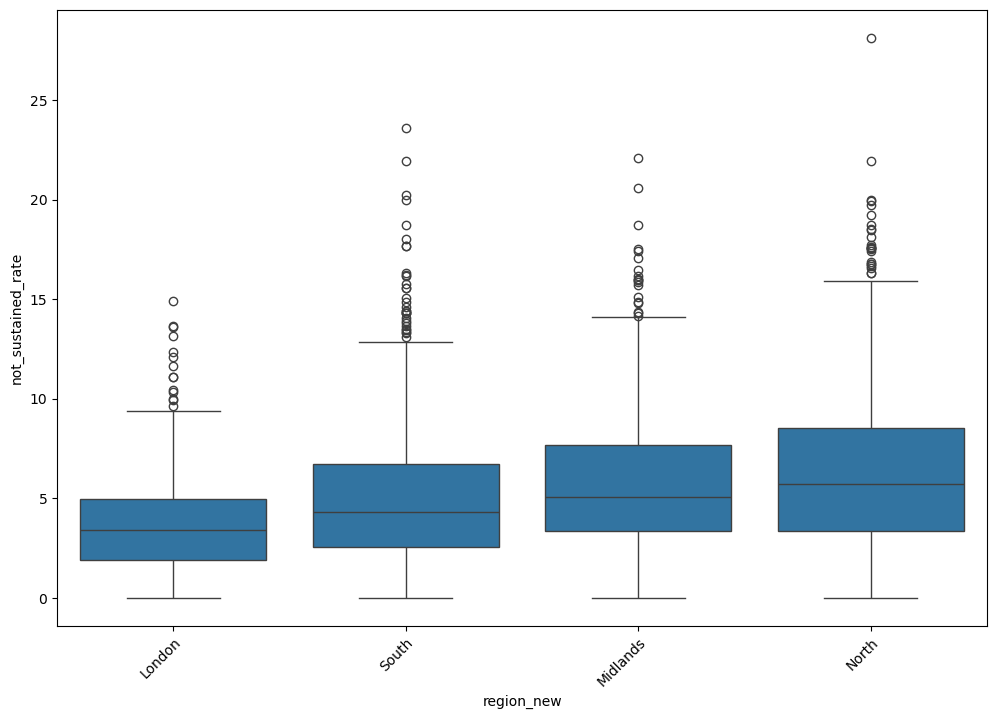

In [525]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [526]:
data.groupby('IMD').size()

IMD
1.0     228
2.0     281
3.0     315
4.0     316
5.0     288
6.0     297
7.0     304
8.0     306
9.0     336
10.0    301
dtype: int64

In [527]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.907336
East of England             6.426036
Inner London                4.043478
North East                  5.022388
North West                  5.032178
Outer London                5.736301
South East                  6.764706
South West                  6.065517
West Midlands               4.985591
Yorkshire and The Humber    5.218750
Name: IMD, dtype: float64


In [528]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.134658
Midlands    5.379538
North       5.095642
South       6.472861
Name: IMD, dtype: float64


In [529]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [530]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [531]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [532]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1054
Urban minor conurbation                                     105
Urban city and town                                        1381
Urban city and town in a sparse setting                       8
Rural town and fringe                                       289
Rural town and fringe in a sparse setting                    29
Rural village                                                54
Rural village in a sparse setting                             6
Rural hamlet and isolated dwellings                          43
Rural hamlet and isolated dwellings in a sparse setting       3
dtype: int64

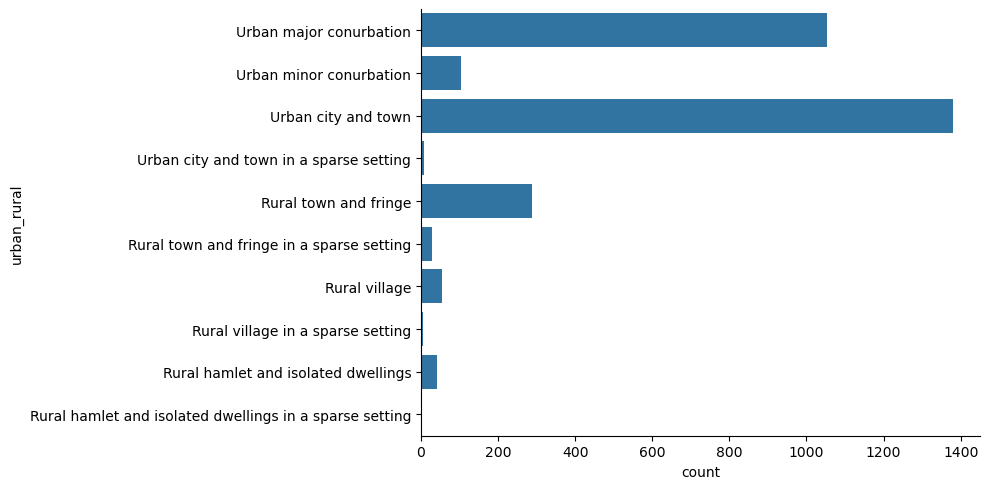

In [533]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [534]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


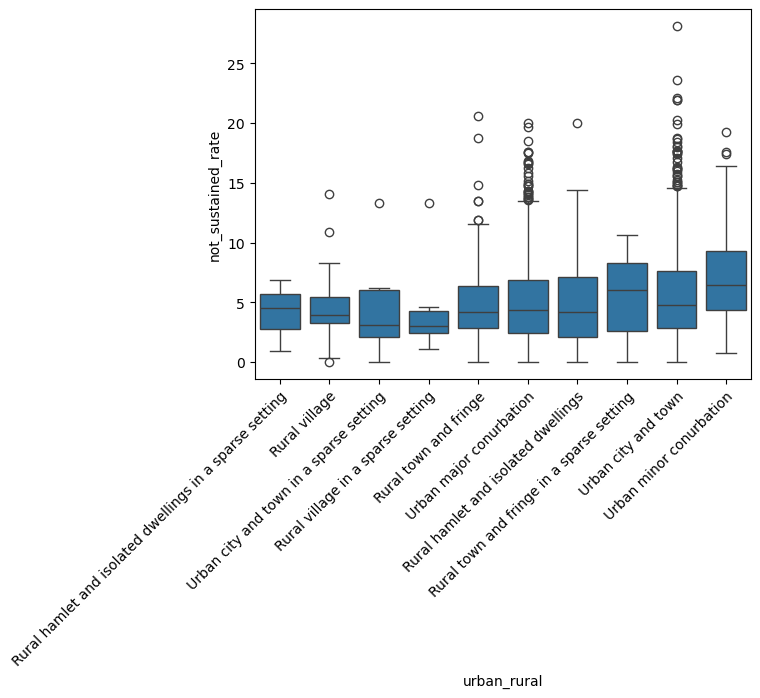

In [535]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [536]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [537]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [538]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2548
0     424
dtype: int64

In [539]:
data.groupby('selective').size()

selective
0    2813
1     159
dtype: int64

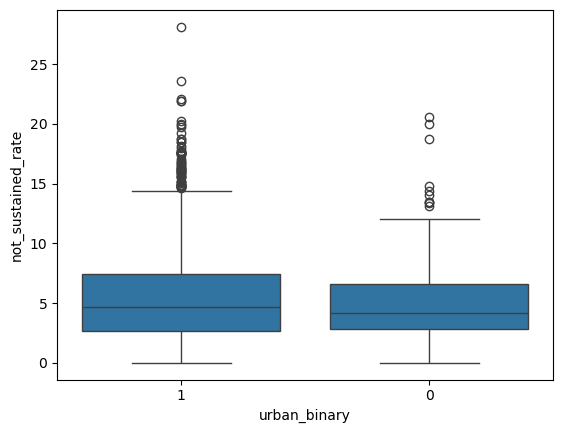

In [540]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

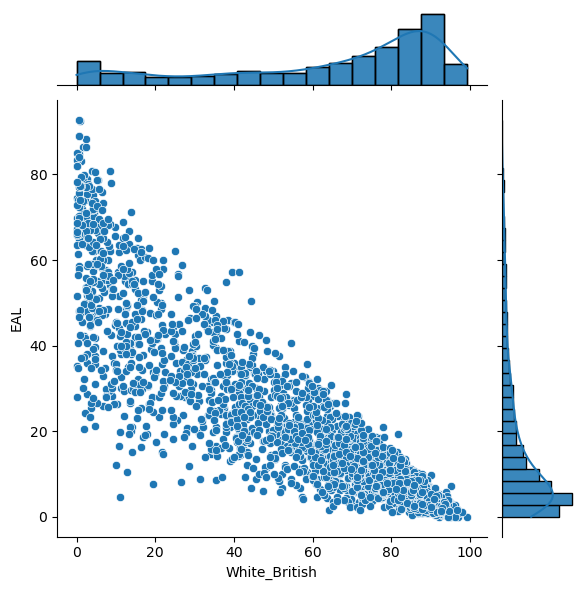

In [541]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

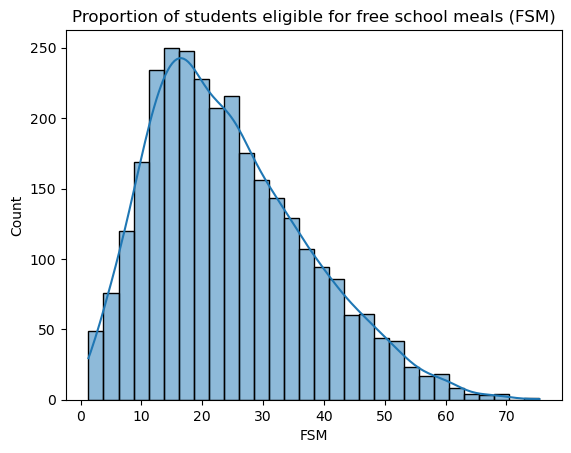

In [542]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

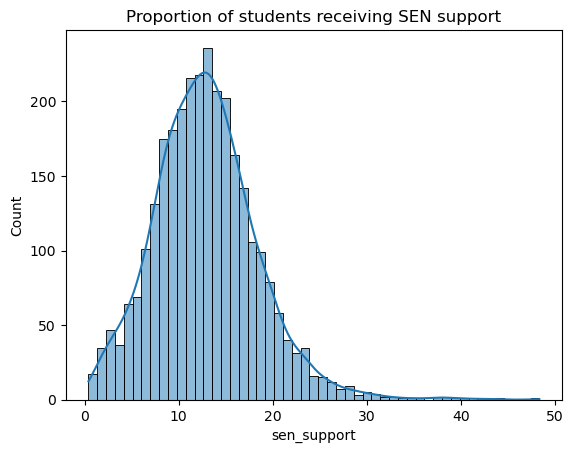

In [543]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

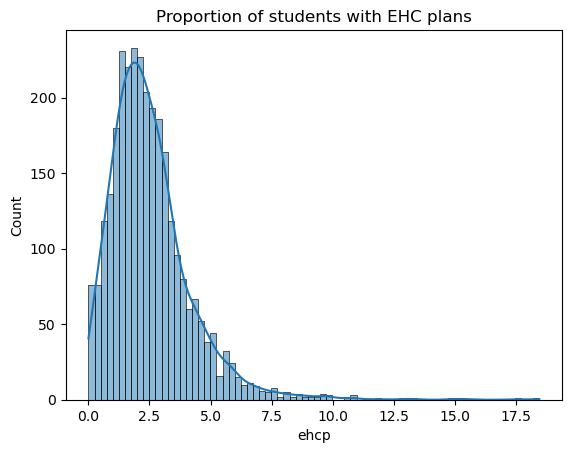

In [544]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [545]:
from copy import copy
from scipy.stats import kendalltau

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [547]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [548]:
vars_for_corr = data[['not_sustained_rate', 
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [549]:
vars_for_corr.columns

Index(['not_sustained_rate', 'absence_rate_non_excl', 'persistent_absence',
       'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 'FSM',
       'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 'headcount',
       'KS4_headcount', 'pupil_teacher_ratio', 'assistant_teacher_ratio',
       'Ofsted_num', 'KS2_history', 'KS4_pass_rate', 'Attainment_8',
       'Progress_8', 'selective', 'post16', 'IMD', 'urban_binary',
       'single_sex_binary', 'faith_binary'],
      dtype='object')

In [550]:
corr_names = {
    'not_sustained_rate': 'Not sustained %', 
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [551]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [552]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

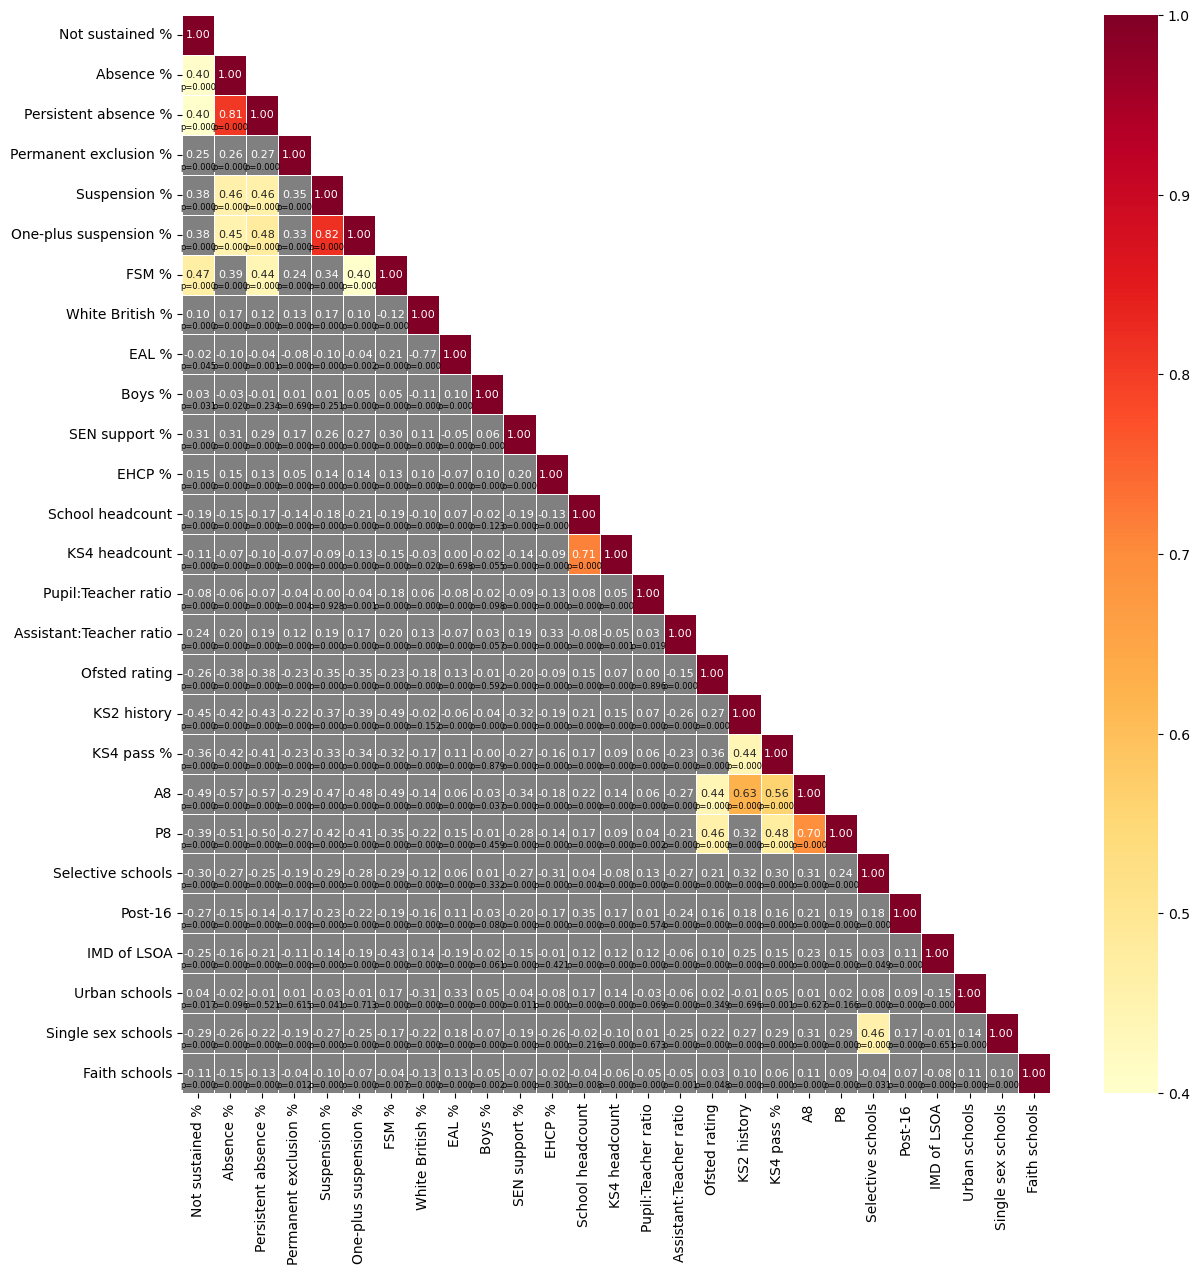

In [553]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

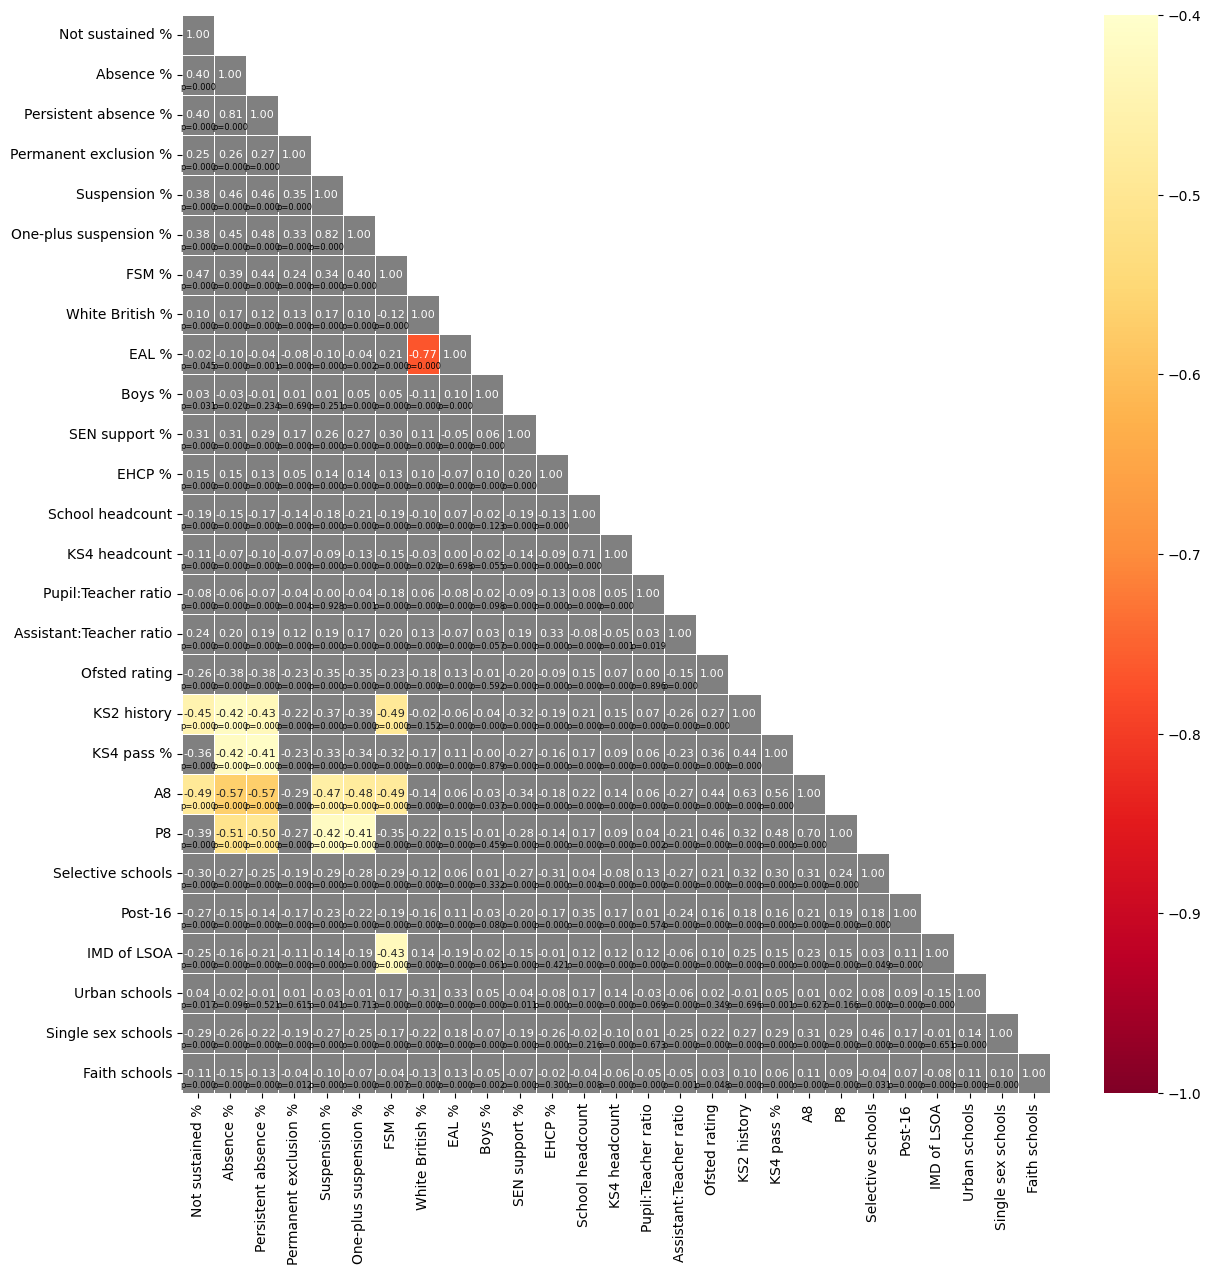

In [554]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Data Transformation

In [555]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [556]:
# transformer to convert quadratic variables
# include bias=false as using linear regression which automatically includes an intercept
poly = Pipeline(steps=[
    ('encoder', PolynomialFeatures(include_bias=False))])

# transformer to convert categorical variables 
cat_transformer_onehot = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories='auto'))])

# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[
    ('encoder', PowerTransformer())])      

In [557]:
# classify columns for transformation
preprocessor  = ColumnTransformer(transformers = [
    ('cat_onehot', cat_transformer_onehot, 
     ['post16', 'faith_binary', 'single_sex_binary', 'urban_binary', 'selective'
     ]), 
    
    ('poly', poly, 
     ['KS2_history', 'Attainment_8', 'Progress_8', 'headcount'
     ]),
    
    ('cat_ordinal', cat_transformer_ordinal,
     ['Ofsted_rating', 'IMD'
     ]),
    
    ('num', num,
     ['pupil_teacher_ratio', 'assistant_teacher_ratio', 'susp_rate', 'FSM', 'sen_support', 'perc_boys', 'White_British', 'total_absence'
    ])
])

In [558]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(data)

data_transformed = pd.DataFrame(
    pipe_fit.transform(data), 
    columns = pipe_fit.get_feature_names_out().tolist())

data_transformed.head()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   0.0                   1.0                         1.0   
2                   0.0                   1.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         1.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              0.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         0.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         0.0   
1                              1.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         1.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              105.1                47.4   
1                      0.0              107.1                59.1   
2                      0.0              103.5                43.8   
3                      0.0              103.2                44.6   
4                      0.0              106.0                50.3   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.18           1171.0             11046.01   
1              0.61           1249.0             11470.41   
2             -0.06           1079.0             10712.25   
3             -0.04           1319.0             10650.24   
4             -0.17           1163.0             11236.00   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         4981.74                       -18.918   
1                         6329.61                        65.331   
2                         4533.30                        -6.210   
3                         4602.72                        -4.128   
4                         5331.80                       -18.020   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                     123072.1               2246.76   
1                     133767.9               3492.81   
2                     111676.5               1918.44   
3                     136120.8               1989.16   
4                     123278.0               2530.09   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                         -8.532                       55505.4   
1                         36.051                       73815.9   
2                         -2.628                       47260.2   
3                         -1.784                       58827.4   
4                         -8.551                       58498.9   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.0324                     -210.78          1371241.0   
1              0.3721                      761.89          1560001.0   
2              0.0036                      -64.74          1164241.0   
3              0.0016                      -52.76          1739761.0   
4              0.0289                     -197.71          1352569.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [559]:
y_transformer = PowerTransformer()
Not_Sustained_transformed = y_transformer.fit_transform(data[['not_sustained_rate']])

In [560]:
#Not_Sustained_transformed = np.log(data['not_sustained_rate']+1)

In [561]:
Not_Sustained_transformed

array([[ 0.15070063],
       [-0.6138039 ],
       [ 0.23057935],
       ...,
       [-0.03013134],
       [-2.2515585 ],
       [ 1.15491314]])

In [562]:
data_transformed['Not_Sustained_transformed'] = Not_Sustained_transformed

In [563]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2972 non-null   float64
 1   cat_onehot__post16_1             2972 non-null   float64
 2   cat_onehot__faith_binary_0       2972 non-null   float64
 3   cat_onehot__faith_binary_1       2972 non-null   float64
 4   cat_onehot__single_sex_binary_0  2972 non-null   float64
 5   cat_onehot__single_sex_binary_1  2972 non-null   float64
 6   cat_onehot__urban_binary_0       2972 non-null   float64
 7   cat_onehot__urban_binary_1       2972 non-null   float64
 8   cat_onehot__selective_0          2972 non-null   float64
 9   cat_onehot__selective_1          2972 non-null   float64
 10  poly__KS2_history                2972 non-null   float64
 11  poly__Attainment_8               2972 non-null   float64
 12  poly__Progress_8    

<Axes: xlabel='not_sustained_rate', ylabel='Count'>

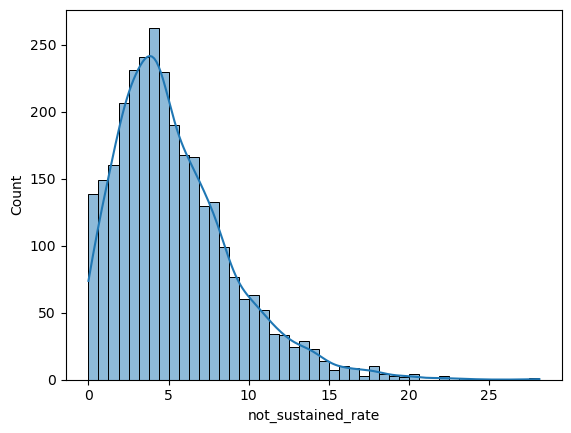

In [564]:
sns.histplot(data['not_sustained_rate'], kde=True )

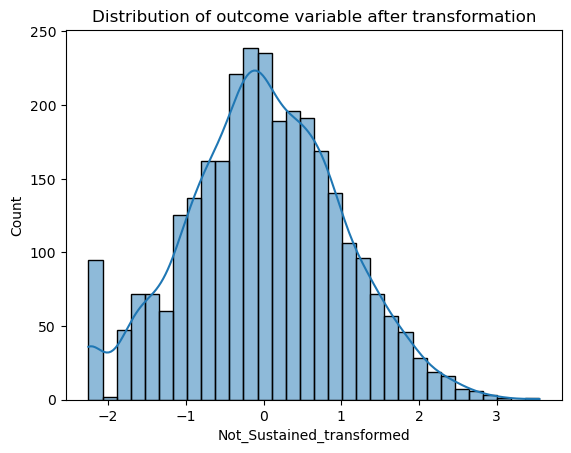

In [565]:
# distribution of outcomes
sns.histplot(data_transformed['Not_Sustained_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

# Regression

In [100]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2972 non-null   float64
 1   cat_onehot__post16_1             2972 non-null   float64
 2   cat_onehot__faith_binary_0       2972 non-null   float64
 3   cat_onehot__faith_binary_1       2972 non-null   float64
 4   cat_onehot__single_sex_binary_0  2972 non-null   float64
 5   cat_onehot__single_sex_binary_1  2972 non-null   float64
 6   cat_onehot__urban_binary_0       2972 non-null   float64
 7   cat_onehot__urban_binary_1       2972 non-null   float64
 8   cat_onehot__selective_0          2972 non-null   float64
 9   cat_onehot__selective_1          2972 non-null   float64
 10  poly__KS2_history                2972 non-null   float64
 11  poly__Attainment_8               2972 non-null   float64
 12  poly__Progress_8    

In [101]:
data_transformed.head()

cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   0.0                   1.0                         1.0   
2                   0.0                   1.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         1.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              0.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         0.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         0.0   
1                              1.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         1.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              105.1                47.4   
1                      0.0              107.1                59.1   
2                      0.0              103.5                43.8   
3                      0.0              103.2                44.6   
4                      0.0              106.0                50.3   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.18           1171.0             11046.01   
1              0.61           1249.0             11470.41   
2             -0.06           1079.0             10712.25   
3             -0.04           1319.0             10650.24   
4             -0.17           1163.0             11236.00   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         4981.74                       -18.918   
1                         6329.61                        65.331   
2                         4533.30                        -6.210   
3                         4602.72                        -4.128   
4                         5331.80                       -18.020   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                     123072.1               2246.76   
1                     133767.9               3492.81   
2                     111676.5               1918.44   
3                     136120.8               1989.16   
4                     123278.0               2530.09   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                         -8.532                       55505.4   
1                         36.051                       73815.9   
2                         -2.628                       47260.2   
3                         -1.784                       58827.4   
4                         -8.551                       58498.9   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.0324                     -210.78          1371241.0   
1              0.3721                      761.89          1560001.0   
2              0.0036                      -64.74          1164241.0   
3              0.0016                      -52.76          1739761.0   
4              0.0289                     -197.71          1352569.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [102]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## IGNORE

In [133]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [134]:
data_transformed = pd.get_dummies(data, 
                                  columns=['type', 
                                           'denomination', 
                                           #'school_sex', 
                                           'region_new', 
                                           #'Ofsted_rating'
                                          ], 
                                 drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [135]:
ord_transformer = OrdinalEncoder()

In [136]:
data_transformed[['Ofsted_rating']] = ord_transformer.fit_transform(data_transformed[['Ofsted_rating']])

In [137]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [138]:
data_transformed = data_transformed.astype({col: 'int' for col in data_transformed.select_dtypes(include='bool').columns})

## Specify variables

In [ ]:
predictors = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school'
]]

In [140]:
controls = data_transformed[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [141]:
predictors_controls = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

### Run model - Predictors only

#### predictors - individual effects

In [142]:
predictors_results = {}

for p in predictors:
    x = data_transformed[p]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    predictors_results[p] = model.summary()
    

In [143]:
predictors_results

{'headcount': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.528
 Model:                            OLS   Adj. R-squared (uncentered):              0.528
 Method:                 Least Squares   F-statistic:                              3321.
 Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
 Time:                        15:55:54   Log-Likelihood:                         -8661.3
 No. Observations:                2972   AIC:                                  1.732e+04
 Df Residuals:                    2971   BIC:                                  1.733e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t   

In [144]:
# extract t stat for each predictor 
t_statistics = {}

for predictor, result in predictors_results.items():
    t_statistics[predictor] = result.tables[1].data[1][3] 

t_statistics

{'headcount': '   57.625',
 'pupil_teacher_ratio': '   76.058',
 'assistant_teacher_ratio': '   73.178',
 'susp_rate': '   58.408',
 'Progress_8': '  -17.018',
 'post16': '   35.063',
 'Ofsted_rating': '   26.236',
 'faith_binary': '   16.758',
 'single_sex_binary': '    6.366',
 'type_Academy sponsor led': '   41.872',
 'type_Community school': '   13.483',
 'type_Foundation school': '   11.451',
 'type_Free schools': '    8.698',
 'type_Voluntary aided school': '    8.956',
 'type_Voluntary controlled school': '    2.915'}

#### all predictors

In [145]:
x = predictors

In [146]:
y = data_transformed['not_sustained_rate']

In [147]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              825.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7329.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2957   BIC:                                  1.478e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                        -2.702e-05      0.000     -0.174      0.862      -0.000       0.000
pupil_teacher_ratio                  0.2080      0.012     16.650      0.000       0.184       0.232
assistant_teacher_ratio              3.6672      0.464      7.896      0.000       2.757       4.578
susp_rate                            0.0332      0.003     13.127      0.000       0.028       0.038
Progress_8                          -2.0172      0.127    -15.833      0.000      -2.267      -1.767
post16                              -0.7340      0.125     -5.867      0.000      -0.979      -0.489
Ofsted_rating                        0.0047      0.047      0.099      0.921      -0.088       0.097
faith_binary                        -0.0062      0.160     -0.039      0.969      -0.320       0.307
single_sex_binary                   -0.6330      0.185     -3.419      0.001      -0.996      -0.270
type_Academy sponsor led             2.4293      0.138     17.555      0.000       2.158       2.701
type_Community school                0.5893      0.191      3.092      0.002       0.216       0.963
type_Foundation school               1.2039      0.246      4.891      0.000       0.721       1.687
type_Free schools                    1.1026      0.284      3.889      0.000       0.547       1.659
type_Voluntary aided school          0.5095      0.252      2.020      0.043       0.015       1.004
type_Voluntary controlled school    -0.4183      0.632     -0.662      0.508      -1.658       0.821
==============================================================================
Omnibus:                      360.013   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.407
Skew:                           0.767   Prob(JB):                    2.98e-153
Kurtosis:                       4.822   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### forward selection: corr coef

In [148]:
x = predictors[['susp_rate',
'Progress_8']]

In [149]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              1720.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8633.2
No. Observations:                2972   AIC:                                  1.727e+04
Df Residuals:                    2970   BIC:                                  1.728e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
susp_rate      0.1459      0.003     53.574      0.000       0.141       0.151
Progress_8    -0.6306      0.171     -3.685      0.000      -0.966      -0.295
==============================================================================
Omnibus:                      908.024   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15351.209
Skew:                          -0.997   Prob(JB):                         0.00
Kurtosis:                      13.954   Cond. No.                         67.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary']]

In [151]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              1182.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8608.2
No. Observations:                2972   AIC:                                  1.722e+04
Df Residuals:                    2969   BIC:                                  1.724e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1416      0.003     51.187      0.000       0.136       0.147
Progress_8           -1.1431      0.184     -6.198      0.000      -1.505      -0.781
single_sex_binary     1.8485      0.260      7.105      0.000       1.338       2.359
==============================================================================
Omnibus:                      784.601   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11010.012
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                      12.272   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary', 'post16']]

In [153]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              1239.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8316.7
No. Observations:                2972   AIC:                                  1.664e+04
Df Residuals:                    2968   BIC:                                  1.667e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1093      0.003     38.816      0.000       0.104       0.115
Progress_8           -2.0718      0.171    -12.103      0.000      -2.407      -1.736
single_sex_binary     0.1288      0.245      0.525      0.600      -0.353       0.610
post16                2.8175      0.111     25.361      0.000       2.600       3.035
==============================================================================
Omnibus:                      253.561   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.316
Skew:                           0.173   Prob(JB):                    6.30e-309
Kurtosis:                       6.368   Cond. No.                         112.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio']]

In [155]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              2158.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7750.4
No. Observations:                2972   AIC:                                  1.551e+04
Df Residuals:                    2968   BIC:                                  1.553e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0630      0.003     23.895      0.000       0.058       0.068
Progress_8                 -1.8039      0.135    -13.386      0.000      -2.068      -1.540
post16                      0.8785      0.103      8.547      0.000       0.677       1.080
assistant_teacher_ratio    13.0312      0.351     37.109      0.000      12.343      13.720
==============================================================================
Omnibus:                      287.830   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.226
Skew:                           0.561   Prob(JB):                    1.80e-156
Kurtosis:                       5.129   Cond. No.                         187.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [157]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [159]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount', 'pupil_teacher_ratio']]

In [161]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1806.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7491.3
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2966   BIC:                                  1.503e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0427      0.003     16.611      0.000       0.038       0.048
Progress_8                 -2.3652      0.127    -18.679      0.000      -2.613      -2.117
post16                     -0.7510      0.129     -5.832      0.000      -1.004      -0.499
assistant_teacher_ratio     4.8527      0.474     10.243      0.000       3.924       5.782
headcount                  -0.0001      0.000     -0.820      0.412      -0.000       0.000
pupil_teacher_ratio         0.2285      0.012     18.512      0.000       0.204       0.253
==============================================================================
Omnibus:                      400.294   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.862
Skew:                           0.830   Prob(JB):                    4.58e-175
Kurtosis:                       4.931   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio']]

In [163]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              2167.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7491.7
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2967   BIC:                                  1.502e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0429      0.003     16.750      0.000       0.038       0.048
Progress_8                 -2.3764      0.126    -18.879      0.000      -2.623      -2.130
post16                     -0.7940      0.118     -6.751      0.000      -1.025      -0.563
assistant_teacher_ratio     4.8224      0.472     10.211      0.000       3.896       5.748
pupil_teacher_ratio         0.2219      0.009     23.755      0.000       0.204       0.240
==============================================================================
Omnibus:                      406.016   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.625
Skew:                           0.839   Prob(JB):                    7.75e-178
Kurtosis:                       4.941   Cond. No.                         290.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio',
               #'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school']]

In [165]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              1122.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7335.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2961   BIC:                                  1.476e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
susp_rate                            0.0332      0.003     13.224      0.000       0.028       0.038
Progress_8                          -2.1382      0.121    -17.696      0.000      -2.375      -1.901
post16                              -0.7757      0.112     -6.923      0.000      -0.995      -0.556
assistant_teacher_ratio              3.8815      0.460      8.443      0.000       2.980       4.783
pupil_teacher_ratio                  0.2008      0.009     22.170      0.000       0.183       0.219
type_Academy sponsor led             2.4547      0.138     17.779      0.000       2.184       2.725
type_Community school                0.5704      0.189      3.018      0.003       0.200       0.941
type_Foundation school               1.1943      0.246      4.861      0.000       0.713       1.676
type_Free schools                    1.1334      0.278      4.076      0.000       0.588       1.679
type_Voluntary aided school          0.4471      0.219      2.042      0.041       0.018       0.876
type_Voluntary controlled school    -0.4616      0.631     -0.731      0.465      -1.700       0.776
==============================================================================
Omnibus:                      350.299   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.924
Skew:                           0.752   Prob(JB):                    6.18e-148
Kurtosis:                       4.792   Cond. No.                         410.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [167]:
vif_values

predictor       VIF
10  type_Voluntary controlled school  1.022831
8                  type_Free schools  1.076771
9        type_Voluntary aided school  1.112678
7             type_Foundation school  1.120807
6              type_Community school  1.199982
1                         Progress_8  1.354455
5           type_Academy sponsor led  1.657943
0                          susp_rate  2.314476
2                             post16  2.853182
3            assistant_teacher_ratio  5.197548
4                pupil_teacher_ratio  8.656963

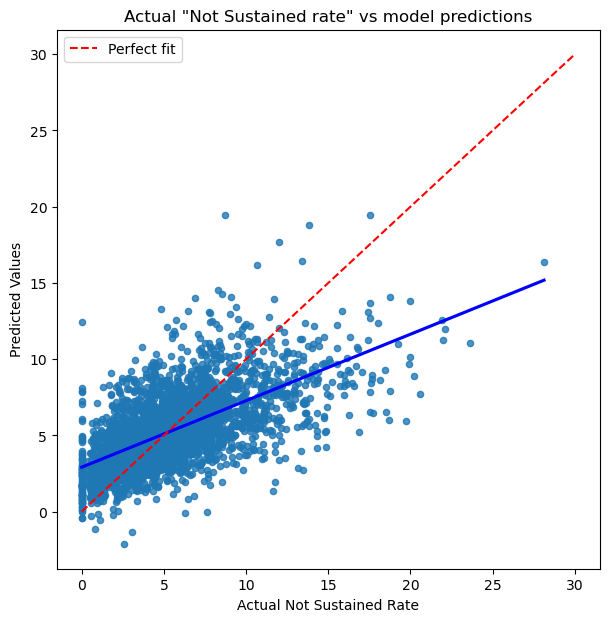

In [168]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

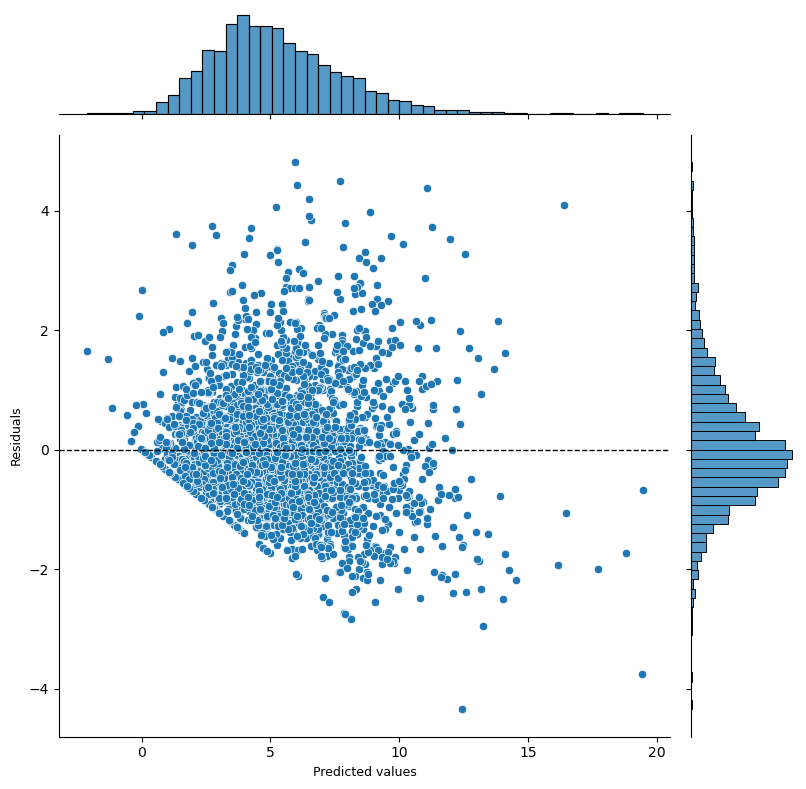

In [169]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

In [170]:
best_predictors = predictors[[
    'susp_rate',
    'Progress_8', 
    'post16', 
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio'
]]

## forward selection: adj. R-squared

In [566]:
x = data_transformed[[
    'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio'
]]

In [567]:
y = data_transformed['Not_Sustained_transformed']

In [568]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.108
Model:                                   OLS   Adj. R-squared (uncentered):              0.107
Method:                        Least Squares   F-statistic:                              179.2
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                    3.46e-74
Time:                               16:53:24   Log-Likelihood:                         -4047.8
No. Observations:                       2972   AIC:                                      8100.
Df Residuals:                           2970   BIC:                                      8112.
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.3194      0.017     18.401      0.000       0.285       0.353
num__pupil_teacher_ratio        -0.0943      0.017     -5.435      0.000      -0.128      -0.060
==============================================================================
Omnibus:                        5.690   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.638
Skew:                           0.095   Prob(JB):                       0.0597
Kurtosis:                       3.095   Cond. No.                         1.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
model.aic

8099.6411893058075

In [107]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate'
]]

In [108]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.346
Model:                                   OLS   Adj. R-squared (uncentered):              0.345
Method:                        Least Squares   F-statistic:                              523.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   4.58e-273
Time:                               09:38:12   Log-Likelihood:                         -3586.1
No. Observations:                       2972   AIC:                                      7178.
Df Residuals:                           2969   BIC:                                      7196.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1871      0.015     12.148      0.000       0.157       0.217
num__pupil_teacher_ratio        -0.1054      0.015     -7.086      0.000      -0.135      -0.076
num__susp_rate                   0.5061      0.015     32.891      0.000       0.476       0.536
==============================================================================
Omnibus:                       36.025   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.651
Skew:                           0.194   Prob(JB):                     3.32e-10
Kurtosis:                       3.449   Cond. No.                         1.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
model.aic

7178.244730009816

In [110]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'poly__headcount',
    'poly__headcount^2'
]]

In [111]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.354
Model:                                   OLS   Adj. R-squared (uncentered):              0.353
Method:                        Least Squares   F-statistic:                              325.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   1.83e-278
Time:                               09:38:13   Log-Likelihood:                         -3567.4
No. Observations:                       2972   AIC:                                      7145.
Df Residuals:                           2967   BIC:                                      7175.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1868      0.015     12.201      0.000       0.157       0.217
num__pupil_teacher_ratio        -0.0975      0.015     -6.569      0.000      -0.127      -0.068
num__susp_rate                   0.4876      0.016     31.277      0.000       0.457       0.518
poly__headcount                  0.0002   4.41e-05      4.749      0.000       0.000       0.000
poly__headcount^2            -1.753e-07    3.1e-08     -5.660      0.000   -2.36e-07   -1.15e-07
==============================================================================
Omnibus:                       24.454   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.207
Skew:                           0.126   Prob(JB):                     1.67e-07
Kurtosis:                       3.435   Cond. No.                     1.99e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
model.aic

7144.724010721971

In [113]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
     'poly__headcount',
    'poly__headcount^2',
    'cat_onehot__post16_0'
]]

In [114]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.373
Model:                                   OLS   Adj. R-squared (uncentered):              0.372
Method:                        Least Squares   F-statistic:                              293.8
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   5.74e-296
Time:                               09:38:13   Log-Likelihood:                         -3523.9
No. Observations:                       2972   AIC:                                      7060.
Df Residuals:                           2966   BIC:                                      7096.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1558      0.015     10.084      0.000       0.125       0.186
num__pupil_teacher_ratio        -0.0961      0.015     -6.572      0.000      -0.125      -0.067
num__susp_rate                   0.4613      0.016     29.538      0.000       0.431       0.492
poly__headcount              -6.638e-05   5.25e-05     -1.264      0.206      -0.000    3.66e-05
poly__headcount^2            -3.009e-08   3.42e-08     -0.879      0.379   -9.72e-08     3.7e-08
cat_onehot__post16_0             0.3020      0.032      9.379      0.000       0.239       0.365
==============================================================================
Omnibus:                       22.149   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.767
Skew:                           0.093   Prob(JB):                     3.44e-07
Kurtosis:                       3.454   Cond. No.                     3.79e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model.aic

7059.853638128736

In [116]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0'
]]

In [117]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.360
Model:                                   OLS   Adj. R-squared (uncentered):              0.359
Method:                        Least Squares   F-statistic:                              417.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   9.55e-286
Time:                               09:38:14   Log-Likelihood:                         -3553.6
No. Observations:                       2972   AIC:                                      7115.
Df Residuals:                           2968   BIC:                                      7139.
Df Model:                                  4                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1675      0.015     10.856      0.000       0.137       0.198
num__pupil_teacher_ratio        -0.1037      0.015     -7.051      0.000      -0.133      -0.075
num__susp_rate                   0.4844      0.015     31.339      0.000       0.454       0.515
cat_onehot__post16_0             0.2017      0.025      8.101      0.000       0.153       0.251
==============================================================================
Omnibus:                       30.700   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.101
Skew:                           0.164   Prob(JB):                     5.33e-09
Kurtosis:                       3.447   Cond. No.                         1.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model.aic

7115.253706520645

In [119]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating'
]]

In [120]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.367
Model:                                   OLS   Adj. R-squared (uncentered):              0.366
Method:                        Least Squares   F-statistic:                              343.9
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   2.70e-291
Time:                               09:38:14   Log-Likelihood:                         -3537.7
No. Observations:                       2972   AIC:                                      7085.
Df Residuals:                           2967   BIC:                                      7115.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1589      0.015     10.307      0.000       0.129       0.189
num__pupil_teacher_ratio        -0.1054      0.015     -7.201      0.000      -0.134      -0.077
num__susp_rate                   0.4826      0.015     31.384      0.000       0.452       0.513
cat_onehot__post16_0             0.2504      0.026      9.548      0.000       0.199       0.302
cat_ordinal__Ofsted_rating      -0.0660      0.012     -5.652      0.000      -0.089      -0.043
==============================================================================
Omnibus:                       32.477   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.363
Skew:                           0.163   Prob(JB):                     1.04e-09
Kurtosis:                       3.477   Cond. No.                         2.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model.aic

7085.428564319343

In [122]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2'
]]

In [123]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.431
Model:                                   OLS   Adj. R-squared (uncentered):              0.429
Method:                        Least Squares   F-statistic:                              320.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:15   Log-Likelihood:                         -3380.1
No. Observations:                       2972   AIC:                                      6774.
Df Residuals:                           2965   BIC:                                      6816.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1170      0.015      7.891      0.000       0.088       0.146
num__pupil_teacher_ratio        -0.0993      0.014     -7.142      0.000      -0.127      -0.072
num__susp_rate                   0.3174      0.017     18.422      0.000       0.284       0.351
cat_onehot__post16_0             0.2319      0.026      9.081      0.000       0.182       0.282
cat_ordinal__Ofsted_rating      -0.0558      0.012     -4.686      0.000      -0.079      -0.032
poly__Progress_8                -0.6167      0.034    -18.211      0.000      -0.683      -0.550
poly__Progress_8^2              -0.0361      0.031     -1.163      0.245      -0.097       0.025
==============================================================================
Omnibus:                       22.544   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.516
Skew:                           0.059   Prob(JB):                     8.70e-08
Kurtosis:                       3.499   Cond. No.                         3.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model.aic

6774.172647279976

In [125]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'poly__Progress_8^2'
]]

In [126]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.426
Model:                                   OLS   Adj. R-squared (uncentered):              0.425
Method:                        Least Squares   F-statistic:                              367.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:15   Log-Likelihood:                         -3391.1
No. Observations:                       2972   AIC:                                      6794.
Df Residuals:                           2966   BIC:                                      6830.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1216      0.015      8.190      0.000       0.092       0.151
num__pupil_teacher_ratio        -0.0991      0.014     -7.101      0.000      -0.126      -0.072
num__susp_rate                   0.3144      0.017     18.197      0.000       0.281       0.348
cat_onehot__post16_0             0.2058      0.025      8.229      0.000       0.157       0.255
poly__Progress_8                -0.6228      0.034    -18.340      0.000      -0.689      -0.556
poly__Progress_8^2              -0.0898      0.029     -3.100      0.002      -0.147      -0.033
==============================================================================
Omnibus:                       21.681   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.213
Skew:                           0.089   Prob(JB):                     4.53e-07
Kurtosis:                       3.452   Cond. No.                         3.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
model.aic

6794.10523024639

In [128]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1'
]]

In [129]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.433
Model:                                   OLS   Adj. R-squared (uncentered):              0.431
Method:                        Least Squares   F-statistic:                              322.9
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:16   Log-Likelihood:                         -3375.1
No. Observations:                       2972   AIC:                                      6764.
Df Residuals:                           2965   BIC:                                      6806.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1190      0.015      8.057      0.000       0.090       0.148
num__pupil_teacher_ratio        -0.1041      0.014     -7.484      0.000      -0.131      -0.077
num__susp_rate                   0.3095      0.017     17.986      0.000       0.276       0.343
cat_onehot__post16_0             0.2319      0.025      9.165      0.000       0.182       0.282
poly__Progress_8                -0.6054      0.034    -17.846      0.000      -0.672      -0.539
poly__Progress_8^2              -0.0561      0.029     -1.906      0.057      -0.114       0.002
cat_onehot__faith_binary_1      -0.1947      0.034     -5.664      0.000      -0.262      -0.127
==============================================================================
Omnibus:                       22.734   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.621
Skew:                           0.081   Prob(JB):                     1.36e-07
Kurtosis:                       3.479   Cond. No.                         3.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    #'poly__Progress_8^2',
    'cat_onehot__faith_binary_1'
]]

In [131]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.432
Model:                                   OLS   Adj. R-squared (uncentered):              0.431
Method:                        Least Squares   F-statistic:                              375.8
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:16   Log-Likelihood:                         -3376.9
No. Observations:                       2972   AIC:                                      6766.
Df Residuals:                           2966   BIC:                                      6802.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1212      0.015      8.224      0.000       0.092       0.150
num__pupil_teacher_ratio        -0.1032      0.014     -7.420      0.000      -0.130      -0.076
num__susp_rate                   0.3125      0.017     18.227      0.000       0.279       0.346
cat_onehot__post16_0             0.2184      0.024      8.988      0.000       0.171       0.266
poly__Progress_8                -0.6023      0.034    -17.768      0.000      -0.669      -0.536
cat_onehot__faith_binary_1      -0.2080      0.034     -6.174      0.000      -0.274      -0.142
==============================================================================
Omnibus:                       25.083   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.355
Skew:                           0.058   Prob(JB):                     7.74e-09
Kurtosis:                       3.537   Cond. No.                         3.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
model.aic

6765.760987302327

In [133]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [134]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.449
Model:                                   OLS   Adj. R-squared (uncentered):              0.447
Method:                        Least Squares   F-statistic:                              344.7
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:16   Log-Likelihood:                         -3332.2
No. Observations:                       2972   AIC:                                      6678.
Df Residuals:                           2965   BIC:                                      6720.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0935      0.015      6.316      0.000       0.064       0.123
num__pupil_teacher_ratio           -0.1018      0.014     -7.432      0.000      -0.129      -0.075
num__susp_rate                      0.2848      0.017     16.612      0.000       0.251       0.318
cat_onehot__post16_0                0.2571      0.024     10.588      0.000       0.210       0.305
poly__Progress_8                   -0.5460      0.034    -16.094      0.000      -0.612      -0.479
cat_onehot__faith_binary_1         -0.1565      0.034     -4.653      0.000      -0.222      -0.091
cat_onehot__single_sex_binary_1    -0.4373      0.046     -9.510      0.000      -0.527      -0.347
==============================================================================
Omnibus:                       25.796   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.619
Skew:                           0.060   Prob(JB):                     4.11e-09
Kurtosis:                       3.545   Cond. No.                         4.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model.aic

6678.470903096922

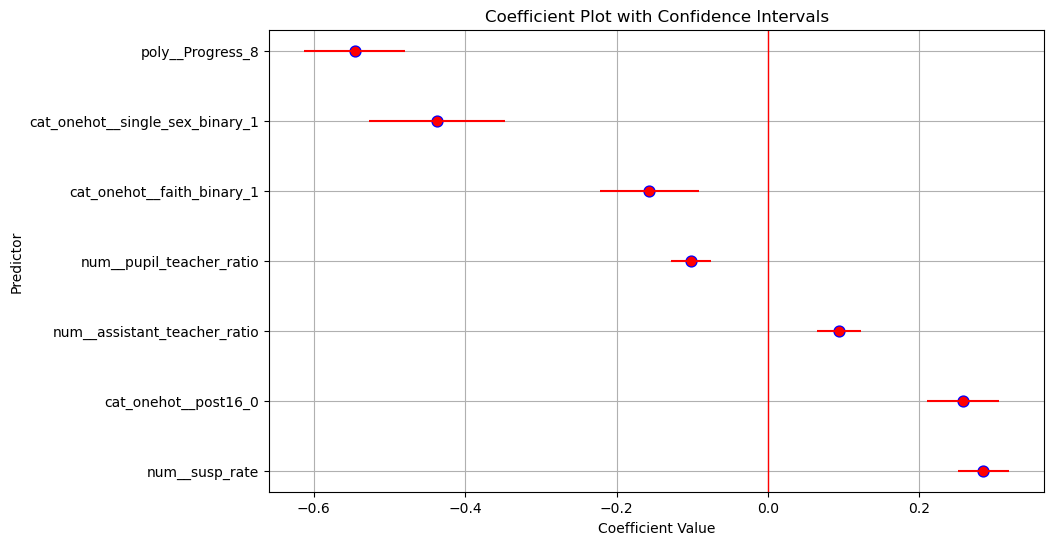

In [136]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

In [137]:
coef_df

Predictor  Coefficient  Lower CI  Upper CI
4                 poly__Progress_8    -0.545953 -0.612468 -0.479439
6  cat_onehot__single_sex_binary_1    -0.437326 -0.527497 -0.347154
5       cat_onehot__faith_binary_1    -0.156492 -0.222431 -0.090553
1         num__pupil_teacher_ratio    -0.101834 -0.128701 -0.074967
0     num__assistant_teacher_ratio     0.093516  0.064484  0.122549
3             cat_onehot__post16_0     0.257125  0.209508  0.304741
2                   num__susp_rate     0.284795  0.251181  0.318410

### Add in control variables

#### individual controls

In [ ]:
controls.info()

In [ ]:
control_results = {}

for c in controls:
    x = data_transformed[c]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    control_results[c] = model.summary()
    

In [ ]:
control_results

#### all predictors and all controls

In [ ]:
x = predictors_controls

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
controls.info()

#### forward selection controls

In [138]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM'
]]

In [139]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.564
Model:                                   OLS   Adj. R-squared (uncentered):              0.563
Method:                        Least Squares   F-statistic:                              479.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:27   Log-Likelihood:                         -2983.1
No. Observations:                       2972   AIC:                                      5982.
Df Residuals:                           2964   BIC:                                      6030.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0392      0.013      2.944      0.003       0.013       0.065
num__pupil_teacher_ratio           -0.0181      0.013     -1.441      0.150      -0.043       0.007
num__susp_rate                      0.1543      0.016      9.679      0.000       0.123       0.186
cat_onehot__post16_0                0.2265      0.022     10.476      0.000       0.184       0.269
poly__Progress_8                   -0.3154      0.031    -10.086      0.000      -0.377      -0.254
cat_onehot__faith_binary_1         -0.1513      0.030     -5.058      0.000      -0.210      -0.093
cat_onehot__single_sex_binary_1    -0.4295      0.041    -10.502      0.000      -0.510      -0.349
num__FSM                            0.4271      0.015     28.017      0.000       0.397       0.457
==============================================================================
Omnibus:                       46.404   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.238
Skew:                          -0.078   Prob(JB):                     8.42e-19
Kurtosis:                       3.805   Cond. No.                         4.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence'
]]

In [141]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.570
Model:                                   OLS   Adj. R-squared (uncentered):              0.569
Method:                        Least Squares   F-statistic:                              491.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:28   Log-Likelihood:                         -2962.6
No. Observations:                       2972   AIC:                                      5941.
Df Residuals:                           2964   BIC:                                      5989.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0362      0.013      2.746      0.006       0.010       0.062
num__susp_rate                      0.1061      0.017      6.157      0.000       0.072       0.140
cat_onehot__post16_0                0.2305      0.021     10.729      0.000       0.188       0.273
poly__Progress_8                   -0.2082      0.035     -5.960      0.000      -0.277      -0.140
cat_onehot__faith_binary_1         -0.1251      0.030     -4.194      0.000      -0.184      -0.067
cat_onehot__single_sex_binary_1    -0.4298      0.041    -10.582      0.000      -0.509      -0.350
num__FSM                            0.4052      0.015     26.537      0.000       0.375       0.435
num__total_absence                  0.1333      0.020      6.587      0.000       0.094       0.173
==============================================================================
Omnibus:                       45.578   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.287
Skew:                          -0.057   Prob(JB):                     8.21e-19
Kurtosis:                       3.812   Cond. No.                         5.60
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model.aic

5941.113179732021

In [143]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support'
]]

In [144]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.575
Model:                                   OLS   Adj. R-squared (uncentered):              0.574
Method:                        Least Squares   F-statistic:                              445.3
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:30   Log-Likelihood:                         -2945.7
No. Observations:                       2972   AIC:                                      5909.
Df Residuals:                           2963   BIC:                                      5963.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0280      0.013      2.127      0.034       0.002       0.054
num__susp_rate                      0.1049      0.017      6.122      0.000       0.071       0.139
cat_onehot__post16_0                0.2179      0.021     10.148      0.000       0.176       0.260
poly__Progress_8                   -0.1985      0.035     -5.708      0.000      -0.267      -0.130
cat_onehot__faith_binary_1         -0.1218      0.030     -4.105      0.000      -0.180      -0.064
cat_onehot__single_sex_binary_1    -0.4103      0.041    -10.123      0.000      -0.490      -0.331
num__FSM                            0.3830      0.016     24.462      0.000       0.352       0.414
num__total_absence                  0.1163      0.020      5.715      0.000       0.076       0.156
num__sen_support                    0.0842      0.014      5.812      0.000       0.056       0.113
==============================================================================
Omnibus:                       56.249   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.136
Skew:                          -0.094   Prob(JB):                     5.44e-24
Kurtosis:                       3.911   Cond. No.                         6.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model.aic

5909.422772678795

In [146]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2'
]]

In [147]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.588
Model:                                   OLS   Adj. R-squared (uncentered):              0.586
Method:                        Least Squares   F-statistic:                              384.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:32   Log-Likelihood:                         -2899.6
No. Observations:                       2972   AIC:                                      5821.
Df Residuals:                           2961   BIC:                                      5887.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0035      0.013      0.267      0.789      -0.022       0.029
num__susp_rate                      0.0825      0.017      4.839      0.000       0.049       0.116
cat_onehot__post16_0                0.2419      0.026      9.211      0.000       0.190       0.293
poly__Progress_8                   -0.2386      0.035     -6.914      0.000      -0.306      -0.171
cat_onehot__faith_binary_1         -0.1171      0.031     -3.759      0.000      -0.178      -0.056
cat_onehot__single_sex_binary_1    -0.2734      0.043     -6.310      0.000      -0.358      -0.188
num__FSM                            0.3102      0.017     18.069      0.000       0.277       0.344
num__total_absence                  0.0835      0.021      4.072      0.000       0.043       0.124
num__sen_support                    0.0553      0.015      3.788      0.000       0.027       0.084
poly__KS2_history                   0.0631      0.007      9.436      0.000       0.050       0.076
poly__KS2_history^2                -0.0006    6.4e-05     -9.484      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       61.274   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.514
Skew:                          -0.149   Prob(JB):                     1.66e-24
Kurtosis:                       3.892   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2'
]]

In [149]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.588
Model:                                   OLS   Adj. R-squared (uncentered):              0.587
Method:                        Least Squares   F-statistic:                              422.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:42   Log-Likelihood:                         -2899.7
No. Observations:                       2972   AIC:                                      5819.
Df Residuals:                           2962   BIC:                                      5879.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0825      0.017      4.838      0.000       0.049       0.116
cat_onehot__post16_0                0.2430      0.026      9.367      0.000       0.192       0.294
poly__Progress_8                   -0.2393      0.034     -6.952      0.000      -0.307      -0.172
cat_onehot__faith_binary_1         -0.1171      0.031     -3.761      0.000      -0.178      -0.056
cat_onehot__single_sex_binary_1    -0.2746      0.043     -6.369      0.000      -0.359      -0.190
num__FSM                            0.3102      0.017     18.071      0.000       0.277       0.344
num__total_absence                  0.0834      0.021      4.067      0.000       0.043       0.124
num__sen_support                    0.0555      0.015      3.813      0.000       0.027       0.084
poly__KS2_history                   0.0634      0.007      9.652      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.29e-05     -9.703      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       61.133   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.269
Skew:                          -0.149   Prob(JB):                     1.87e-24
Kurtosis:                       3.891   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
model.aic

5819.320968853215

In [151]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys'
]]

In [152]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.589
Model:                                   OLS   Adj. R-squared (uncentered):              0.587
Method:                        Least Squares   F-statistic:                              385.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:44   Log-Likelihood:                         -2897.3
No. Observations:                       2972   AIC:                                      5817.
Df Residuals:                           2961   BIC:                                      5883.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0781      0.017      4.550      0.000       0.044       0.112
cat_onehot__post16_0                0.2448      0.026      9.438      0.000       0.194       0.296
poly__Progress_8                   -0.2306      0.035     -6.657      0.000      -0.298      -0.163
cat_onehot__faith_binary_1         -0.1160      0.031     -3.726      0.000      -0.177      -0.055
cat_onehot__single_sex_binary_1    -0.2694      0.043     -6.244      0.000      -0.354      -0.185
num__FSM                            0.3112      0.017     18.136      0.000       0.278       0.345
num__total_absence                  0.0912      0.021      4.386      0.000       0.050       0.132
num__sen_support                    0.0533      0.015      3.653      0.000       0.025       0.082
poly__KS2_history                   0.0635      0.007      9.663      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.29e-05     -9.716      0.000      -0.001      -0.000
num__perc_boys                      0.0264      0.012      2.181      0.029       0.003       0.050
==============================================================================
Omnibus:                       60.251   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.003
Skew:                          -0.144   Prob(JB):                     3.53e-24
Kurtosis:                       3.888   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
model.aic

5816.5488015509745

In [154]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British'
]]

In [155]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.597
Model:                                   OLS   Adj. R-squared (uncentered):              0.596
Method:                        Least Squares   F-statistic:                              366.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:46   Log-Likelihood:                         -2864.8
No. Observations:                       2972   AIC:                                      5754.
Df Residuals:                           2960   BIC:                                      5826.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0582      0.017      3.396      0.001       0.025       0.092
cat_onehot__post16_0                0.2136      0.026      8.230      0.000       0.163       0.264
poly__Progress_8                   -0.1468      0.036     -4.100      0.000      -0.217      -0.077
cat_onehot__faith_binary_1         -0.0961      0.031     -3.110      0.002      -0.157      -0.035
cat_onehot__single_sex_binary_1    -0.2186      0.043     -5.065      0.000      -0.303      -0.134
num__FSM                            0.4059      0.021     19.680      0.000       0.365       0.446
num__total_absence                  0.0705      0.021      3.398      0.001       0.030       0.111
num__sen_support                    0.0340      0.015      2.326      0.020       0.005       0.063
poly__KS2_history                   0.0601      0.007      9.227      0.000       0.047       0.073
poly__KS2_history^2                -0.0006   6.23e-05     -9.278      0.000      -0.001      -0.000
num__perc_boys                      0.0343      0.012      2.861      0.004       0.011       0.058
num__White_British                  0.1280      0.016      8.084      0.000       0.097       0.159
==============================================================================
Omnibus:                       75.590   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.091
Skew:                          -0.173   Prob(JB):                     5.14e-32
Kurtosis:                       4.021   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
model.aic

5753.650197787795

In [157]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0'
]]

In [158]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.600
Model:                                   OLS   Adj. R-squared (uncentered):              0.598
Method:                        Least Squares   F-statistic:                              341.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:51   Log-Likelihood:                         -2855.4
No. Observations:                       2972   AIC:                                      5737.
Df Residuals:                           2959   BIC:                                      5815.
Df Model:                                 13                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0574      0.017      3.358      0.001       0.024       0.091
cat_onehot__post16_0                0.2208      0.026      8.518      0.000       0.170       0.272
poly__Progress_8                   -0.1425      0.036     -3.991      0.000      -0.213      -0.072
cat_onehot__faith_binary_1         -0.1058      0.031     -3.425      0.001      -0.166      -0.045
cat_onehot__single_sex_binary_1    -0.2302      0.043     -5.341      0.000      -0.315      -0.146
num__FSM                            0.3918      0.021     18.818      0.000       0.351       0.433
num__total_absence                  0.0702      0.021      3.393      0.001       0.030       0.111
num__sen_support                    0.0363      0.015      2.490      0.013       0.008       0.065
poly__KS2_history                   0.0634      0.007      9.701      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.25e-05     -9.726      0.000      -0.001      -0.000
num__perc_boys                      0.0335      0.012      2.803      0.005       0.010       0.057
num__White_British                  0.1409      0.016      8.771      0.000       0.109       0.172
cat_onehot__urban_binary_0         -0.1568      0.036     -4.334      0.000      -0.228      -0.086
==============================================================================
Omnibus:                       67.206   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.003
Skew:                          -0.143   Prob(JB):                     1.60e-28
Kurtosis:                       3.976   Cond. No.                     4.15e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
model.aic

5736.841670829861

In [160]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'poly__Attainment_8',
    'poly__Attainment_8^2'
]]

In [161]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.608
Model:                                   OLS   Adj. R-squared (uncentered):              0.606
Method:                        Least Squares   F-statistic:                              305.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:52   Log-Likelihood:                         -2826.3
No. Observations:                       2972   AIC:                                      5683.
Df Residuals:                           2957   BIC:                                      5773.
Df Model:                                 15                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0551      0.017      3.255      0.001       0.022       0.088
cat_onehot__post16_0                0.2158      0.026      8.402      0.000       0.165       0.266
poly__Progress_8                   -0.5140      0.171     -3.003      0.003      -0.850      -0.178
cat_onehot__faith_binary_1         -0.0937      0.031     -3.058      0.002      -0.154      -0.034
cat_onehot__single_sex_binary_1    -0.2770      0.043     -6.385      0.000      -0.362      -0.192
num__FSM                            0.3805      0.021     18.399      0.000       0.340       0.421
num__total_absence                  0.0544      0.021      2.630      0.009       0.014       0.095
num__sen_support                    0.0312      0.014      2.159      0.031       0.003       0.060
poly__KS2_history                   0.1624      0.020      8.171      0.000       0.123       0.201
poly__KS2_history^2                -0.0016      0.000     -6.272      0.000      -0.002      -0.001
num__perc_boys                      0.0312      0.012      2.628      0.009       0.008       0.054
num__White_British                  0.1598      0.016      9.915      0.000       0.128       0.191
cat_onehot__urban_binary_0         -0.1574      0.036     -4.393      0.000      -0.228      -0.087
poly__Attainment_8                 -0.0199      0.021     -0.930      0.353      -0.062       0.022
poly__Attainment_8^2                0.0006   9.82e-05      6.295      0.000       0.000       0.001
==============================================================================
Omnibus:                       76.574   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.383
Skew:                          -0.173   Prob(JB):                     9.91e-33
Kurtosis:                       4.035   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0'
    #'poly__Attainment_8',
    #'poly__Attainment_8^2'
]]

In [163]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.600
Model:                                   OLS   Adj. R-squared (uncentered):              0.598
Method:                        Least Squares   F-statistic:                              341.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:53   Log-Likelihood:                         -2855.4
No. Observations:                       2972   AIC:                                      5737.
Df Residuals:                           2959   BIC:                                      5815.
Df Model:                                 13                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0574      0.017      3.358      0.001       0.024       0.091
cat_onehot__post16_0                0.2208      0.026      8.518      0.000       0.170       0.272
poly__Progress_8                   -0.1425      0.036     -3.991      0.000      -0.213      -0.072
cat_onehot__faith_binary_1         -0.1058      0.031     -3.425      0.001      -0.166      -0.045
cat_onehot__single_sex_binary_1    -0.2302      0.043     -5.341      0.000      -0.315      -0.146
num__FSM                            0.3918      0.021     18.818      0.000       0.351       0.433
num__total_absence                  0.0702      0.021      3.393      0.001       0.030       0.111
num__sen_support                    0.0363      0.015      2.490      0.013       0.008       0.065
poly__KS2_history                   0.0634      0.007      9.701      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.25e-05     -9.726      0.000      -0.001      -0.000
num__perc_boys                      0.0335      0.012      2.803      0.005       0.010       0.057
num__White_British                  0.1409      0.016      8.771      0.000       0.109       0.172
cat_onehot__urban_binary_0         -0.1568      0.036     -4.334      0.000      -0.228      -0.086
==============================================================================
Omnibus:                       67.206   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.003
Skew:                          -0.143   Prob(JB):                     1.60e-28
Kurtosis:                       3.976   Cond. No.                     4.15e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
model.aic

5736.841670829861

In [165]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2972 non-null   float64
 1   cat_onehot__post16_1             2972 non-null   float64
 2   cat_onehot__faith_binary_0       2972 non-null   float64
 3   cat_onehot__faith_binary_1       2972 non-null   float64
 4   cat_onehot__single_sex_binary_0  2972 non-null   float64
 5   cat_onehot__single_sex_binary_1  2972 non-null   float64
 6   cat_onehot__urban_binary_0       2972 non-null   float64
 7   cat_onehot__urban_binary_1       2972 non-null   float64
 8   cat_onehot__selective_0          2972 non-null   float64
 9   cat_onehot__selective_1          2972 non-null   float64
 10  poly__KS2_history                2972 non-null   float64
 11  poly__Attainment_8               2972 non-null   float64
 12  poly__Progress_8    

In [166]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1'
]]

In [167]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.602
Model:                                   OLS   Adj. R-squared (uncentered):              0.600
Method:                        Least Squares   F-statistic:                              319.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:56   Log-Likelihood:                         -2849.4
No. Observations:                       2972   AIC:                                      5727.
Df Residuals:                           2958   BIC:                                      5811.
Df Model:                                 14                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0598      0.017      3.503      0.000       0.026       0.093
cat_onehot__post16_0                0.2206      0.026      8.527      0.000       0.170       0.271
poly__Progress_8                   -0.1403      0.036     -3.936      0.000      -0.210      -0.070
cat_onehot__faith_binary_1         -0.0903      0.031     -2.899      0.004      -0.151      -0.029
cat_onehot__single_sex_binary_1    -0.2644      0.044     -5.990      0.000      -0.351      -0.178
num__FSM                            0.3846      0.021     18.415      0.000       0.344       0.425
num__total_absence                  0.0635      0.021      3.063      0.002       0.023       0.104
num__sen_support                    0.0399      0.015      2.736      0.006       0.011       0.069
poly__KS2_history                   0.0803      0.008      9.867      0.000       0.064       0.096
poly__KS2_history^2                -0.0008   7.81e-05     -9.876      0.000      -0.001      -0.001
num__perc_boys                      0.0291      0.012      2.428      0.015       0.006       0.053
num__White_British                  0.1416      0.016      8.831      0.000       0.110       0.173
cat_onehot__urban_binary_0         -0.1559      0.036     -4.318      0.000      -0.227      -0.085
cat_onehot__selective_1             0.2822      0.081      3.469      0.001       0.123       0.442
==============================================================================
Omnibus:                       70.170   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.450
Skew:                          -0.155   Prob(JB):                     1.05e-29
Kurtosis:                       3.991   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
model.aic

5726.772052647477

In [169]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [170]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.603
Model:                                   OLS   Adj. R-squared (uncentered):              0.601
Method:                        Least Squares   F-statistic:                              299.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               09:38:59   Log-Likelihood:                         -2843.8
No. Observations:                       2972   AIC:                                      5718.
Df Residuals:                           2957   BIC:                                      5808.
Df Model:                                 15                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0596      0.017      3.495      0.000       0.026       0.093
cat_onehot__post16_0                0.2160      0.026      8.349      0.000       0.165       0.267
poly__Progress_8                   -0.1388      0.036     -3.900      0.000      -0.209      -0.069
cat_onehot__faith_binary_1         -0.1060      0.031     -3.370      0.001      -0.168      -0.044
cat_onehot__single_sex_binary_1    -0.2711      0.044     -6.146      0.000      -0.358      -0.185
num__FSM                            0.3535      0.023     15.484      0.000       0.309       0.398
num__total_absence                  0.0663      0.021      3.201      0.001       0.026       0.107
num__sen_support                    0.0395      0.015      2.710      0.007       0.011       0.068
poly__KS2_history                   0.0808      0.008      9.945      0.000       0.065       0.097
poly__KS2_history^2                -0.0008   7.79e-05     -9.848      0.000      -0.001      -0.001
num__perc_boys                      0.0303      0.012      2.531      0.011       0.007       0.054
num__White_British                  0.1446      0.016      9.017      0.000       0.113       0.176
cat_onehot__urban_binary_0         -0.1545      0.036     -4.286      0.000      -0.225      -0.084
cat_onehot__selective_1             0.2284      0.083      2.759      0.006       0.066       0.391
cat_ordinal__IMD                   -0.0175      0.005     -3.331      0.001      -0.028      -0.007
==============================================================================
Omnibus:                       68.146   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.709
Skew:                          -0.151   Prob(JB):                     1.12e-28
Kurtosis:                       3.974   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
model.aic

5717.638810036275

In [172]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [173]:
vif_values

predictor          VIF
10                   num__perc_boys     1.071457
3        cat_onehot__faith_binary_1     1.355989
12       cat_onehot__urban_binary_0     1.380756
7                  num__sen_support     1.582212
4   cat_onehot__single_sex_binary_1     1.643451
1              cat_onehot__post16_0     1.865820
11               num__White_British     1.915347
0                    num__susp_rate     2.166466
2                  poly__Progress_8     2.411011
13          cat_onehot__selective_1     2.731486
6                num__total_absence     3.196198
5                          num__FSM     3.884174
14                 cat_ordinal__IMD     6.138198
8                 poly__KS2_history  5366.280500
9               poly__KS2_history^2  5405.391578

In [174]:
x

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
0           0.107571                   0.0             -0.18   
1          -0.337648                   0.0              0.61   
2          -0.809995                   0.0             -0.06   
3          -1.212760                   0.0             -0.04   
4          -0.430481                   0.0             -0.17   
...              ...                   ...               ...   
2967       -0.900101                   0.0              0.01   
2968       -0.763495                   0.0             -0.15   
2969       -0.732638                   1.0              0.28   
2970       -1.179152                   0.0              0.43   
2971       -0.292726                   1.0             -0.27   

      cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  num__FSM  \
0                            0.0                              0.0  1.235686   
1                            0.0                              1.0  0.905791   
2                            0.0                              0.0  2.268906   
3                            0.0                              0.0  1.269491   
4                            0.0                              0.0  0.825098   
...                          ...                              ...       ...   
2967                         0.0                              0.0 -0.586563   
2968                         0.0                              0.0 -0.817705   
2969                         1.0                              0.0 -0.913910   
2970                         0.0                              0.0 -1.633010   
2971                         0.0                              0.0  0.449270   

      num__total_absence  num__sen_support  poly__KS2_history  \
0               0.874049         -0.414026              105.1   
1              -0.423170          0.167106              107.1   
2               0.979732          0.929321              103.5   
3              -0.285640         -0.536120              103.2   
4              -0.331044         -0.090336              106.0   
...                  ...               ...                ...   
2967           -1.123804          1.021801              103.2   
2968            0.228154          0.428096              102.1   
2969            0.308718         -0.698932              105.4   
2970           -0.964621          0.665092              107.6   
2971           -0.021898         -0.293541              102.6   

      poly__KS2_history^2  num__perc_boys  num__White_British  \
0                11046.01        0.375718           -1.765784   
1                11470.41       -2.549880           -0.980293   
2                10712.25        0.329568           -1.902048   
3                10650.24        0.038240           -1.752378   
4                11236.00        0.962676           -0.729290   
...                   ...             ...                 ...   
2967             10650.24       -0.137109            1.080372   
2968             10424.41       -0.048187            0.957254   
2969             11109.16        0.009361            0.995332   
2970             11577.76       -0.086872            1.071842   
2971             10526.76       -0.013321            1.239200   

      cat_onehot__urban_binary_0  cat_onehot__selective_1  cat_ordinal__IMD  
0                            0.0                      0.0               7.0  
1                            0.0                      0.0               3.0  
2                            0.0                      0.0               1.0  
3                            0.0                      0.0               6.0  
4                            0.0                      0.0               4.0  
...                          ...                      ...               ...  
2967                         1.0                      0.0               3.0  
2968                         1.0                      0.0               7.0  
2969                    

In [175]:
x = x.drop(columns=['poly__KS2_history^2'])

vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [176]:
vif_values

predictor       VIF
9                    num__perc_boys  1.066700
3        cat_onehot__faith_binary_1  1.353982
11       cat_onehot__urban_binary_0  1.371020
7                  num__sen_support  1.561502
4   cat_onehot__single_sex_binary_1  1.630748
12          cat_onehot__selective_1  1.776064
1              cat_onehot__post16_0  1.864699
10               num__White_British  1.913933
0                    num__susp_rate  2.156275
2                  poly__Progress_8  2.393589
6                num__total_absence  3.076908
5                          num__FSM  3.419445
13                 cat_ordinal__IMD  6.137131
8                 poly__KS2_history  7.826493

## Final Model

In [569]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'num__perc_boys',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [570]:
y = data_transformed['Not_Sustained_transformed']

In [571]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.590
Model:                                   OLS   Adj. R-squared (uncentered):              0.588
Method:                        Least Squares   F-statistic:                              304.2
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               16:53:32   Log-Likelihood:                         -2891.8
No. Observations:                       2972   AIC:                                      5812.
Df Residuals:                           2958   BIC:                                      5896.
Df Model:                                 14                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0711      0.017      4.114      0.000       0.037       0.105
cat_onehot__post16_0                0.2222      0.026      8.457      0.000       0.171       0.274
poly__Progress_8                   -0.1090      0.036     -3.025      0.003      -0.180      -0.038
cat_onehot__faith_binary_1         -0.1179      0.032     -3.693      0.000      -0.181      -0.055
cat_onehot__single_sex_binary_1    -0.3093      0.045     -6.928      0.000      -0.397      -0.222
num__FSM                            0.4313      0.022     19.814      0.000       0.389       0.474
num__total_absence                  0.1057      0.021      5.119      0.000       0.065       0.146
num__sen_support                    0.0559      0.015      3.801      0.000       0.027       0.085
poly__KS2_history                   0.0008      0.000      2.680      0.007       0.000       0.001
num__perc_boys                      0.0382      0.012      3.143      0.002       0.014       0.062
num__White_British                  0.1489      0.016      9.141      0.000       0.117       0.181
cat_onehot__urban_binary_0         -0.1247      0.036     -3.416      0.001      -0.196      -0.053
cat_onehot__selective_1            -0.2537      0.068     -3.741      0.000      -0.387      -0.121
cat_ordinal__IMD                   -0.0182      0.005     -3.407      0.001      -0.029      -0.008
==============================================================================
Omnibus:                       62.758   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.415
Skew:                          -0.092   Prob(JB):                     3.54e-28
Kurtosis:                       3.993   Cond. No.                         630.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
model.aic

5811.543925905429

### VIF scores and corr matrix

In [108]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [109]:
vif_values

predictor       VIF
9                    num__perc_boys  1.066700
3        cat_onehot__faith_binary_1  1.353982
11       cat_onehot__urban_binary_0  1.371020
7                  num__sen_support  1.561502
4   cat_onehot__single_sex_binary_1  1.630748
12          cat_onehot__selective_1  1.776064
1              cat_onehot__post16_0  1.864699
10               num__White_British  1.913933
0                    num__susp_rate  2.156275
2                  poly__Progress_8  2.393589
6                num__total_absence  3.076908
5                          num__FSM  3.419445
13                 cat_ordinal__IMD  6.137131
8                 poly__KS2_history  7.826493

In [110]:
x.describe()

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
count    2.972000e+03           2972.000000       2972.000000   
mean    -4.996751e-16              0.374159         -0.001413   
std      1.000168e+00              0.483986          0.505607   
min     -2.596117e+00              0.000000         -3.380000   
25%     -6.293359e-01              0.000000         -0.330000   
50%      6.539281e-03              0.000000         -0.010000   
75%      6.396397e-01              1.000000          0.330000   
max      3.690839e+00              1.000000          2.370000   

       cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  \
count                 2972.000000                      2972.000000   
mean                     0.184051                         0.113392   
std                      0.387591                         0.317124   
min                      0.000000                         0.000000   
25%                      0.000000                         0.000000   
50%                      0.000000                         0.000000   
75%                      0.000000                         0.000000   
max                      1.000000                         1.000000   

           num__FSM  num__total_absence  num__sen_support  poly__KS2_history  \
count  2.972000e+03        2.972000e+03      2.972000e+03        2972.000000   
mean   1.147579e-16        1.434474e-16     -4.351237e-16         104.437248   
std    1.000168e+00        1.000168e+00      1.000168e+00           2.745410   
min   -2.766387e+00       -3.475018e+00     -2.969958e+00          92.100000   
25%   -6.946596e-01       -6.129564e-01     -6.167089e-01         102.800000   
50%   -2.815740e-03        2.068580e-02      3.009517e-02         104.200000   
75%    7.249960e-01        6.182993e-01      6.269144e-01         105.500000   
max    2.845788e+00        5.580098e+00      4.918520e+00         117.400000   

       num__perc_boys  num__White_British  cat_onehot__urban_binary_0  \
count    2.972000e+03        2.972000e+03                 2972.000000   
mean     2.193550e-16       -2.677685e-16                    0.142665   
std      1.000168e+00        1.000168e+00                    0.349790   
min     -2.730169e+00       -1.956879e+00                    0.000000   
25%     -1.172266e-01       -7.941569e-01                    0.000000   
50%     -3.277828e-03        3.527364e-01                    0.000000   
75%      1.286333e-01        8.437352e-01                    0.000000   
max      3.355245e+00        1.356312e+00                    1.000000   

       cat_onehot__selective_1  cat_ordinal__IMD  
count              2972.000000        2972.00000  
mean                  0.053499           4.66319  
std                   0.225065           2.81924  
min                   0.000000           0.00000  
25%                   0.000000           2.00000  
50%                   0.000000           5.00000  
75%                   0.000000           7.00000  
max                   1.000000           9.00000

In [111]:
vars = x.columns.tolist()
vars

['num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'num__total_absence',
 'num__sen_support',
 'poly__KS2_history',
 'num__perc_boys',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_onehot__selective_1',
 'cat_ordinal__IMD']

In [112]:
vars_for_corr = data_transformed[[
    'num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'num__total_absence',
 'num__sen_support',
 'poly__KS2_history',
 'num__perc_boys',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_onehot__selective_1',
 'cat_ordinal__IMD'
]]


In [113]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

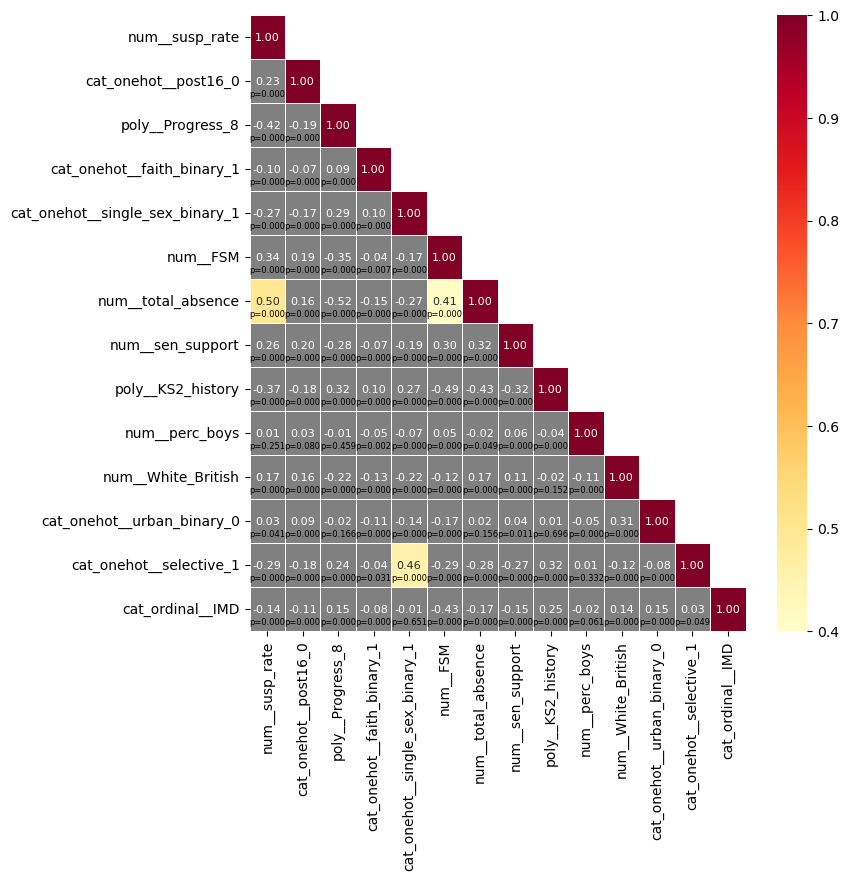

In [114]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


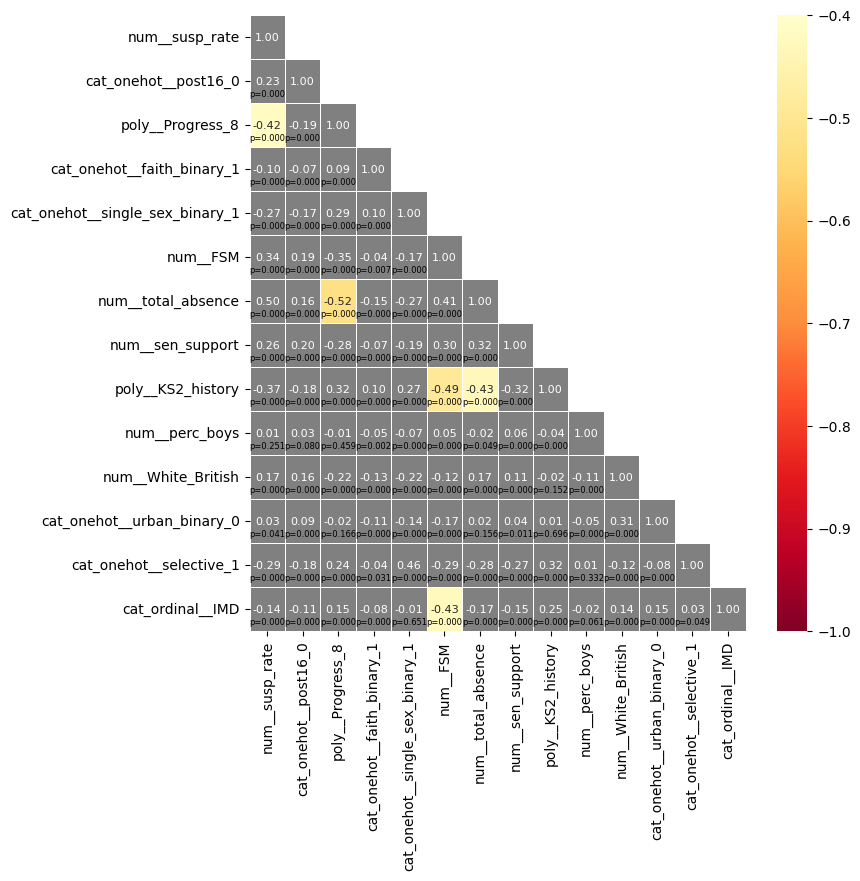

In [115]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Visualise

In [116]:
reg_names = {
    'Not_Sustained_transformed': 'Not sustained %', 
    'num__total_absence': 'Absence %', 
    #'persistent_absence': 'Persistent absence %',
    #'perm_excl_rate': 'Permanent exclusion %', 
    'num__susp_rate': 'Suspension %', 
    #'one_plus_susp_rate': 'One-plus suspension %', 
    'num__FSM': 'FSM %',
    'num__White_British': 'White British %', 
    #'EAL': 'EAL %', 
    'num__perc_boys': 'Boys %', 
    'num__sen_support': 'SEN support %', 
    #'ehcp': 'EHCP %', 
    'poly__headcount': 'School headcount',
    #'KS4_headcount': 'KS4 headcount', 
    #'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    #'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    #'Ofsted_num': 'Ofsted rating',
    'poly__KS2_history': 'KS2 score', 
    'poly__KS2_history^2': 'KS2 score ^2', 
    #'Attainment_8': 'A8', 
    'poly__Progress_8': 'P8',
    'cat_onehot__selective_1': 'Selective schools', 
    'cat_onehot__post16_0': 'No Post-16', 
    'cat_ordinal__IMD': 'IMD of LSOA', 
    'cat_onehot__urban_binary_0': 'Rural schools', 
    'cat_onehot__single_sex_binary_1': 'Single sex schools',
    'cat_onehot__faith_binary_1': 'Faith schools'
}

In [117]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2972 non-null   float64
 1   cat_onehot__post16_1             2972 non-null   float64
 2   cat_onehot__faith_binary_0       2972 non-null   float64
 3   cat_onehot__faith_binary_1       2972 non-null   float64
 4   cat_onehot__single_sex_binary_0  2972 non-null   float64
 5   cat_onehot__single_sex_binary_1  2972 non-null   float64
 6   cat_onehot__urban_binary_0       2972 non-null   float64
 7   cat_onehot__urban_binary_1       2972 non-null   float64
 8   cat_onehot__selective_0          2972 non-null   float64
 9   cat_onehot__selective_1          2972 non-null   float64
 10  poly__KS2_history                2972 non-null   float64
 11  poly__Attainment_8               2972 non-null   float64
 12  poly__Progress_8    

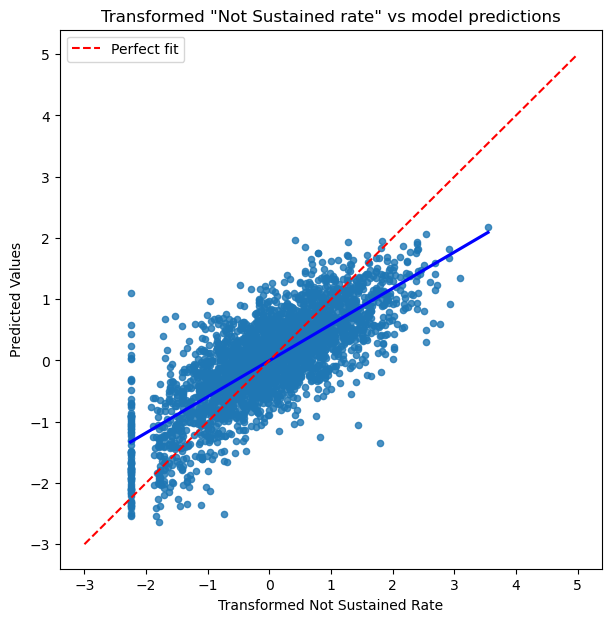

In [118]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['Not_Sustained_transformed'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([-3, 5], 
         [-3, 5], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Transformed "Not Sustained rate" vs model predictions')
plt.xlabel('Transformed Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

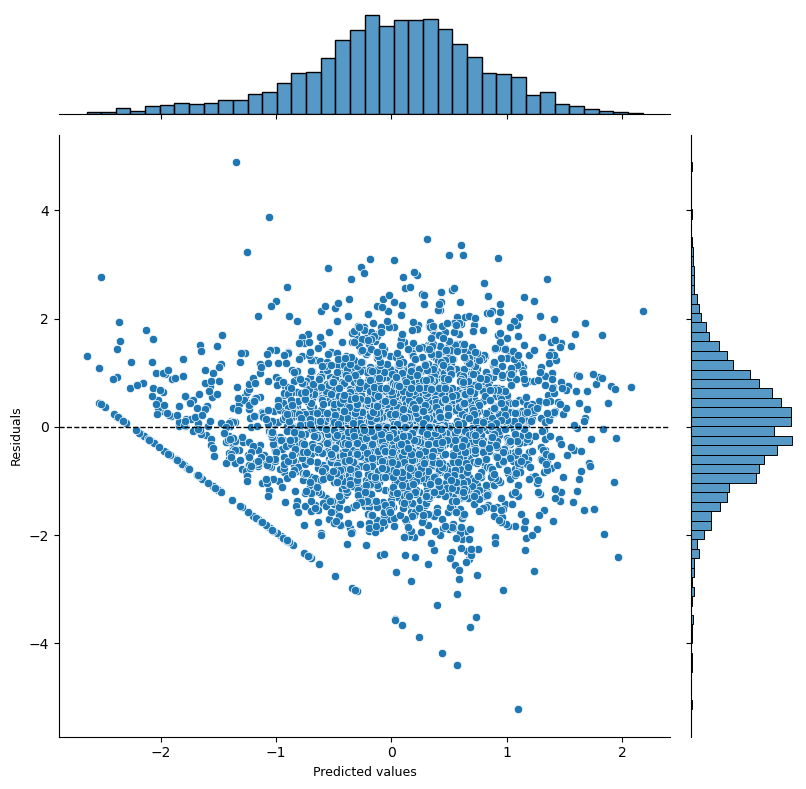

In [119]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

### Partial Residuals Plots

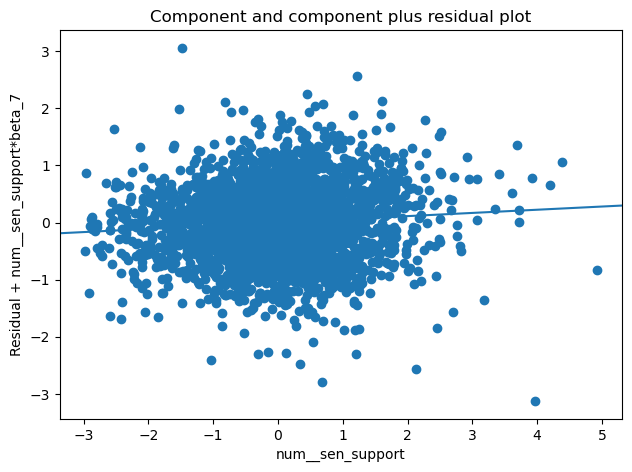

In [120]:
fig = sm.graphics.plot_ccpr(model, 'num__sen_support')
fig.tight_layout(pad=1.0)

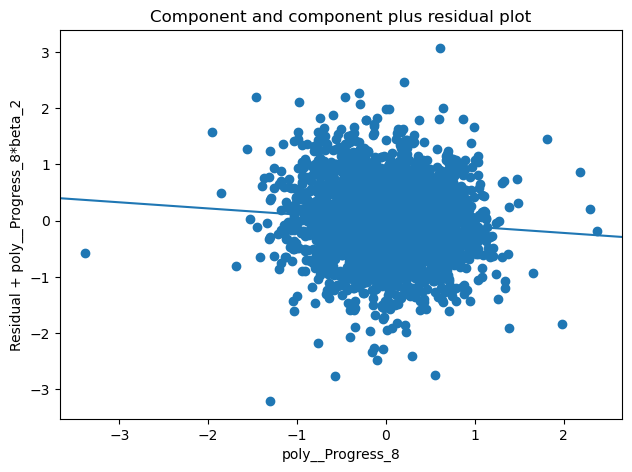

In [121]:
fig = sm.graphics.plot_ccpr(model, 'poly__Progress_8')
fig.tight_layout(pad=1.0)

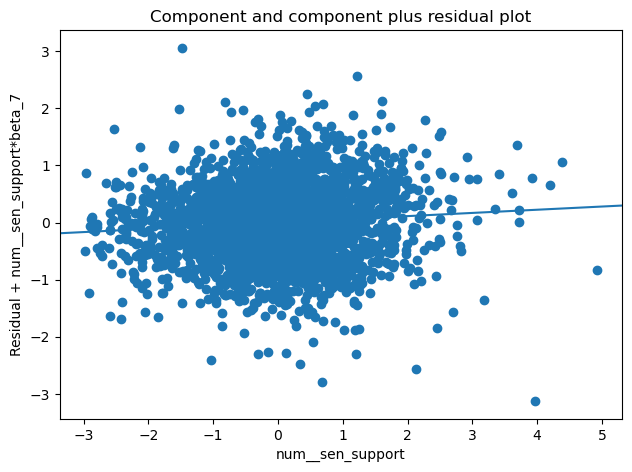

In [122]:
fig = sm.graphics.plot_ccpr(model, 'num__sen_support')
fig.tight_layout(pad=1.0)

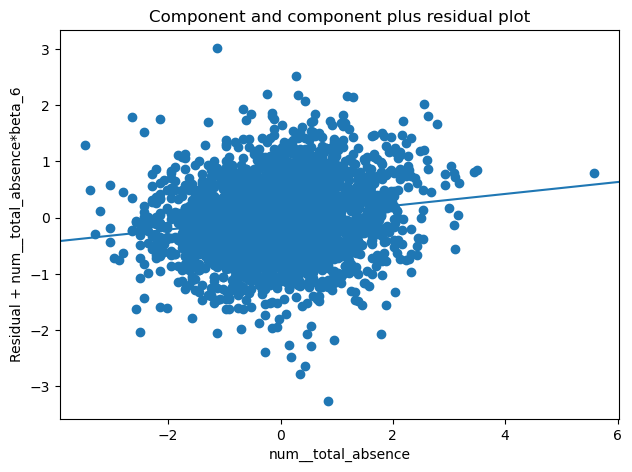

In [123]:
fig = sm.graphics.plot_ccpr(model, 'num__total_absence')
fig.tight_layout(pad=1.0)

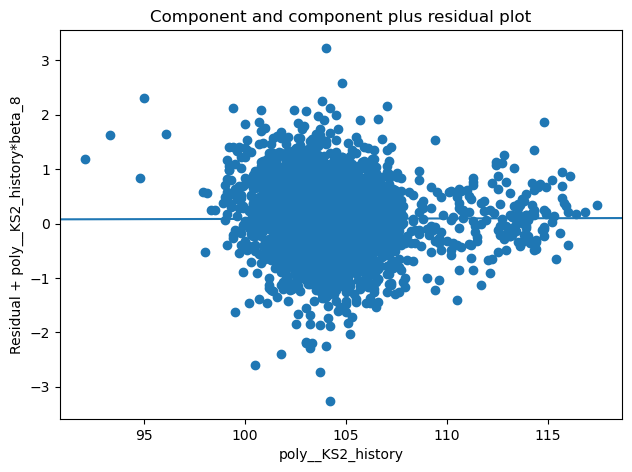

In [124]:
fig = sm.graphics.plot_ccpr(model, 'poly__KS2_history')
fig.tight_layout(pad=1.0)

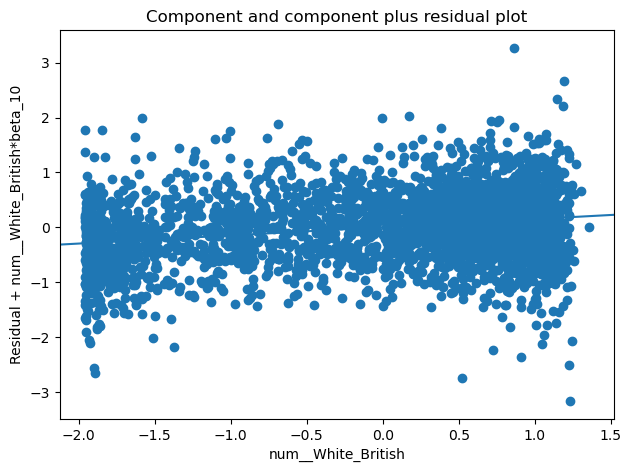

In [125]:
fig = sm.graphics.plot_ccpr(model, 'num__White_British')
fig.tight_layout(pad=1.0)

### Other model diagnostic plots

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


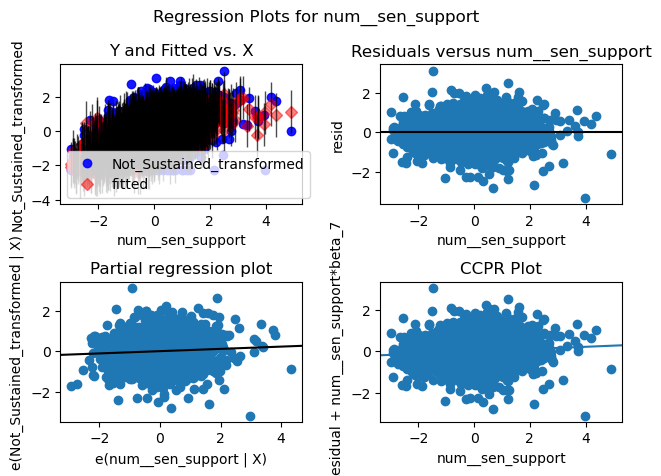

In [126]:
fig = sm.graphics.plot_regress_exog(model, "num__sen_support")
fig.tight_layout(pad=1.0)

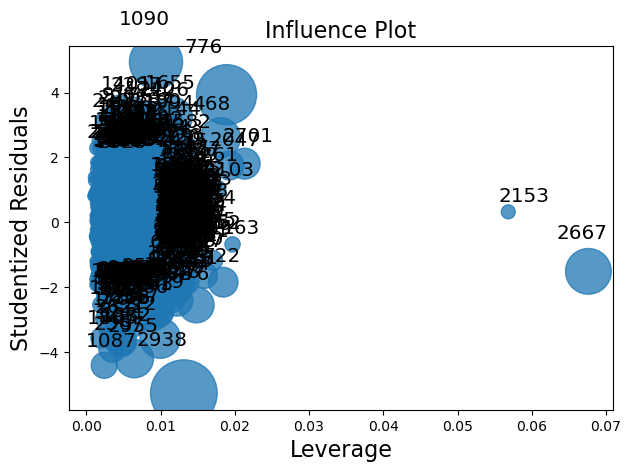

In [127]:
fig = sm.graphics.influence_plot(model)
fig.tight_layout(pad=1.0)

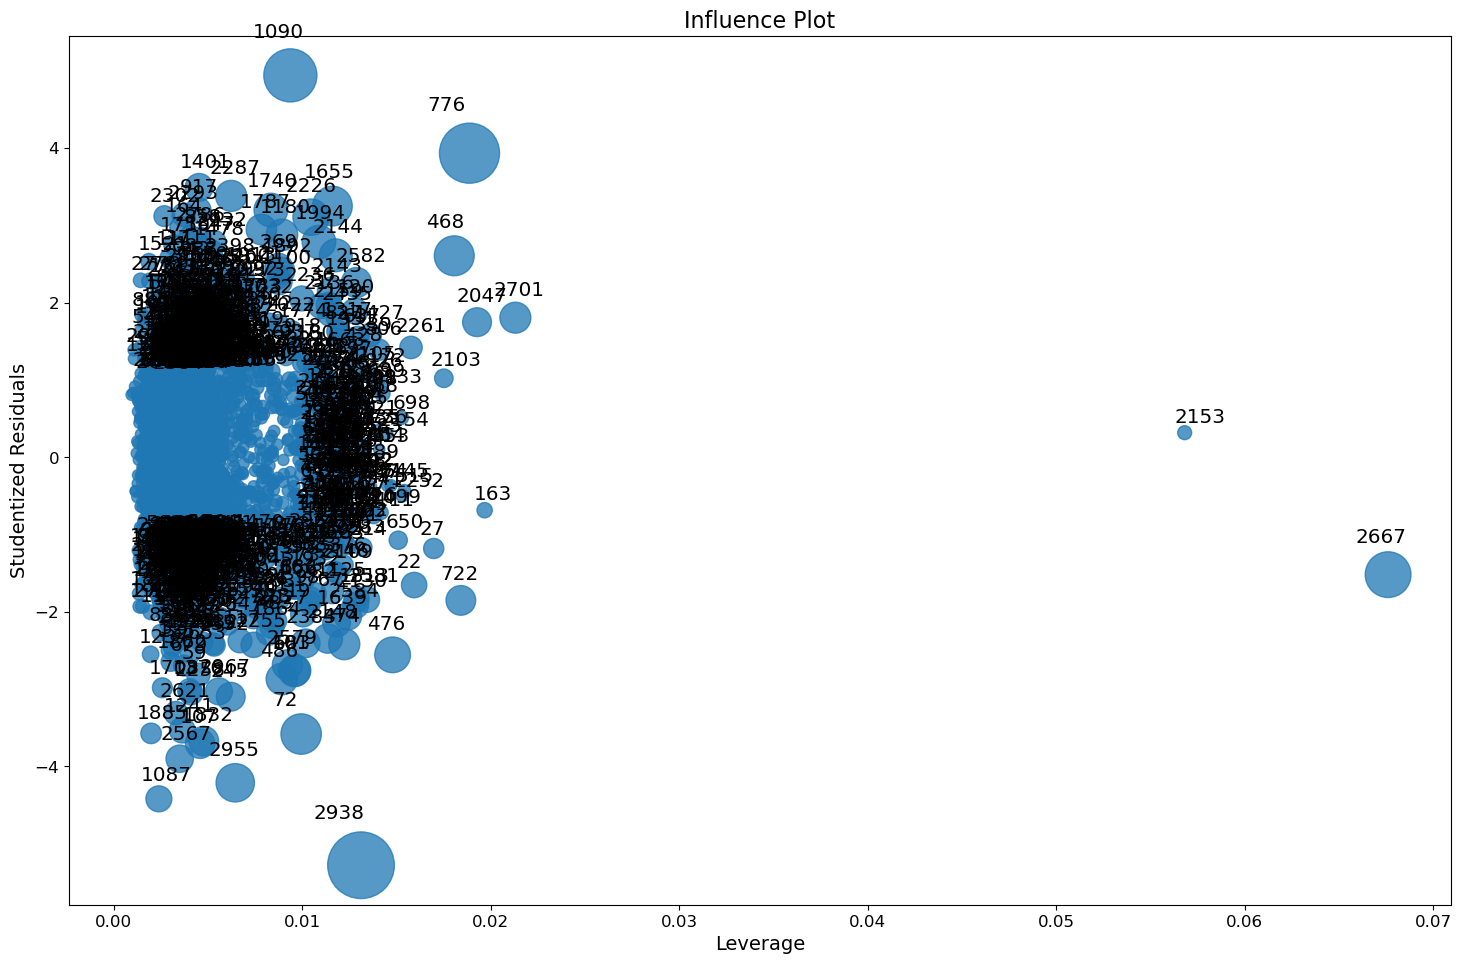

In [128]:
fig, ax = plt.subplots(figsize=(15, 10))  
sm.graphics.influence_plot(
    model, 
    ax=ax, 
    criterion="cooks", 
    #size=8,  
    alpha=0.3, 
    labels=5  
)

# plot labels 
ax.set_title("Influence Plot", fontsize=16)
ax.set_xlabel("Leverage", fontsize=14)
ax.set_ylabel("Studentized Residuals", fontsize=14)
ax.tick_params(axis="both", labelsize=12)

# Adjust layout for better spacing
fig.tight_layout(pad=2.0)

plt.show()

In [129]:
data_transformed.loc[2938]

cat_onehot__post16_0                   1.000000
cat_onehot__post16_1                   0.000000
cat_onehot__faith_binary_0             1.000000
cat_onehot__faith_binary_1             0.000000
cat_onehot__single_sex_binary_0        1.000000
cat_onehot__single_sex_binary_1        0.000000
cat_onehot__urban_binary_0             1.000000
cat_onehot__urban_binary_1             0.000000
cat_onehot__selective_0                1.000000
cat_onehot__selective_1                0.000000
poly__KS2_history                    104.200000
poly__Attainment_8                    33.500000
poly__Progress_8                      -1.310000
poly__headcount                      137.000000
poly__KS2_history^2                10857.640000
poly__KS2_history Attainment_8      3490.700000
poly__KS2_history Progress_8        -136.502000
poly__KS2_history headcount        14275.400000
poly__Attainment_8^2                1122.250000
poly__Attainment_8 Progress_8        -43.885000
poly__Attainment_8 headcount        4589

In [130]:
data.loc[data['headcount'] == 137]

URN  not_sustained_rate  total_absence  persistent_absence  \
1054  139773            7.692308            6.8                15.8   
3111  112377            0.000000           11.0                37.6   

                                    urban_rural denomination   FSM  \
1054                    Urban major conurbation  Other faith  18.2   
3111  Rural town and fringe in a sparse setting     No faith  35.8   

      White_British   EAL  perc_boys               region_name  \
1054           52.6  27.0  49.635036  Yorkshire and The Humber   
3111           96.4   0.7  52.554745                North West   

                   school_name  headcount  perm_excl_rate  susp_rate  \
1054  Leeds Jewish Free School      137.0             0.0    0.00000   
3111   Solway Community School      137.0             0.0    4.37956   

      one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  \
1054             0.00000             25        104.0          42.1   
3111             2.91971             26        104.2          33.5   

      Progress_8  selective  KS4_pass_rate  POSTCODE  post16 school_sex  \
1054       -0.30          0             12  LS17 7TN       1      Mixed   
3111       -1.31          0              4   CA7 4DD       0      Mixed   

                  type Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
1054      Free schools          Good    16.788321  2.189781  E01011555  8.0   
3111  Community school          Good    40.145985  6.569343  E01019127  4.0   

      pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1054                  9.8                      0.1               6.759039   
3111                 12.1                      0.5              10.921664   

      single_sex_binary  faith_binary region_new urban_binary Ofsted_num  
1054                  0             1      North            1          3  
3111                  0             0      North            0          3

In [131]:
data.loc[3111]

URN                                                           112377
not_sustained_rate                                               0.0
total_absence                                                   11.0
persistent_absence                                              37.6
urban_rural                Rural town and fringe in a sparse setting
denomination                                                No faith
FSM                                                             35.8
White_British                                                   96.4
EAL                                                              0.7
perc_boys                                                  52.554745
region_name                                               North West
school_name                                  Solway Community School
headcount                                                      137.0
perm_excl_rate                                                   0.0
susp_rate                         

In [132]:
data_transformed.loc[2667]

cat_onehot__post16_0               0.000000e+00
cat_onehot__post16_1               1.000000e+00
cat_onehot__faith_binary_0         1.000000e+00
cat_onehot__faith_binary_1         0.000000e+00
cat_onehot__single_sex_binary_0    1.000000e+00
cat_onehot__single_sex_binary_1    0.000000e+00
cat_onehot__urban_binary_0         1.000000e+00
cat_onehot__urban_binary_1         0.000000e+00
cat_onehot__selective_0            1.000000e+00
cat_onehot__selective_1            0.000000e+00
poly__KS2_history                  1.071000e+02
poly__Attainment_8                 1.880000e+01
poly__Progress_8                  -3.380000e+00
poly__headcount                    1.039000e+03
poly__KS2_history^2                1.147041e+04
poly__KS2_history Attainment_8     2.013480e+03
poly__KS2_history Progress_8      -3.619980e+02
poly__KS2_history headcount        1.112769e+05
poly__Attainment_8^2               3.534400e+02
poly__Attainment_8 Progress_8     -6.354400e+01
poly__Attainment_8 headcount       1.953

In [133]:
data.loc[data['headcount'] == 1039]

URN  not_sustained_rate  total_absence  persistent_absence  \
529   138059            3.333333           11.3                40.8   
2358  119771           18.125000           12.3                36.8   
2831  138269            0.000000            5.4                12.3   
3086  138073            5.405405            8.6                26.8   

                              urban_rural denomination   FSM  White_British  \
529               Urban major conurbation     No faith  37.1            0.0   
2358                  Urban city and town     No faith  48.7           93.5   
2831  Rural hamlet and isolated dwellings     No faith   3.3           33.2   
3086                  Urban city and town     No faith  28.1           72.9   

       EAL  perc_boys    region_name            school_name  headcount  \
529   28.1  48.508181  West Midlands       Rockwood Academy     1039.0   
2358   1.9  53.320500     North West  Fleetwood High School     1039.0   
2831  53.1  51.299326     South East       Europa School UK     1039.0   
3086  19.2  51.010587  East Midlands     DSLV E-ACT Academy     1039.0   

      perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
529          0.19249   25.02406            15.30318            180   
2358         0.19249   29.45140            12.60828            197   
2831         0.00000    0.00000             0.00000             55   
3086         0.09625    3.46487             2.59865             87   

      KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate  \
529         102.1          41.9       -0.09          0             14   
2358        102.5          33.6       -0.91          0              1   
2831        107.1          18.8       -3.38          0              0   
3086        102.7          39.9       -0.31          0              1   

      POSTCODE  post16 school_sex                 type Ofsted_rating  \
529     B8 3HG       0      Mixed    Academy converter          Good   
2358   FY7 8HE       0      Mixed    Foundation school          Good   
2831  OX14 3DZ       1      Mixed         Free schools          Good   
3086  NN11 4LJ       1      Mixed  Academy sponsor led          Good   

      sen_support      ehcp     LSOA11  IMD  pupil_teacher_ratio  \
529     14.725698  0.673725  E01009485  1.0                 21.3   
2358    11.453321  1.636189  E01025590  1.0                 14.9   
2831    10.875842  0.192493  E01028658  7.0                 18.4   
3086    14.821944  0.962464  E01027013  1.0                 17.3   

      assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
529                       0.1              10.932311                  0   
2358                      0.4              11.862351                  0   
2831                      0.3               5.390734                  0   
3086                      0.2               8.586947                  0   

      faith_binary region_new urban_binary Ofsted_num  
529              0   Midlands            1          3  
2358             0      North            1          3  
2831             0      South            0          3  
3086             0   Midlands            1          3

In [134]:
data.loc[2831]

URN                                                     138269
not_sustained_rate                                         0.0
total_absence                                              5.4
persistent_absence                                        12.3
urban_rural                Rural hamlet and isolated dwellings
denomination                                          No faith
FSM                                                        3.3
White_British                                             33.2
EAL                                                       53.1
perc_boys                                            51.299326
region_name                                         South East
school_name                                   Europa School UK
headcount                                               1039.0
perm_excl_rate                                             0.0
susp_rate                                                  0.0
one_plus_susp_rate                                     

In [135]:
data_transformed.loc[1090]

cat_onehot__post16_0                   1.000000
cat_onehot__post16_1                   0.000000
cat_onehot__faith_binary_0             0.000000
cat_onehot__faith_binary_1             1.000000
cat_onehot__single_sex_binary_0        1.000000
cat_onehot__single_sex_binary_1        0.000000
cat_onehot__urban_binary_0             1.000000
cat_onehot__urban_binary_1             0.000000
cat_onehot__selective_0                1.000000
cat_onehot__selective_1                0.000000
poly__KS2_history                    104.000000
poly__Attainment_8                    53.200000
poly__Progress_8                       0.610000
poly__headcount                      263.000000
poly__KS2_history^2                10816.000000
poly__KS2_history Attainment_8      5532.800000
poly__KS2_history Progress_8          63.440000
poly__KS2_history headcount        27352.000000
poly__Attainment_8^2                2830.240000
poly__Attainment_8 Progress_8         32.452000
poly__Attainment_8 headcount       13991

In [136]:
data.loc[data['headcount'] == 263]

URN  not_sustained_rate  total_absence  persistent_absence  \
1158  144638           13.333333            6.5                15.8   
2010  146567           20.000000           17.0                53.2   
2165  137608            9.230769            8.9                26.6   

                                    urban_rural denomination   FSM  \
1158          Rural village in a sparse setting    Christian   3.0   
2010        Rural hamlet and isolated dwellings     No faith  31.6   
2165  Rural town and fringe in a sparse setting     No faith  14.4   

      White_British  EAL  perc_boys    region_name               school_name  \
1158           87.8  0.8  52.471483     South West  The Five Islands Academy   
2010           92.8  0.4  52.091255     South West          Atlantic Academy   
2165           86.7  7.2  46.387833  West Midlands      Lady Hawkins' School   

      headcount  perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
1158      263.0         0.00000    0.38023             0.38023             32   
2010      263.0         0.38023  217.87072            30.03802             50   
2165      263.0         0.00000   12.92776             7.60456             56   

      KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate  \
1158        104.0          53.2        0.61          0              9   
2010        103.7          43.6       -0.13          0             12   
2165        102.6          40.0       -0.33          0             11   

      POSTCODE  post16 school_sex                 type Ofsted_rating  \
1158  TR21 0NA       0      Mixed  Academy sponsor led          Good   
2010  EX39 5DW       0      Mixed         Free schools          Good   
2165   HR5 3AR       0      Mixed    Academy converter          Good   

      sen_support       ehcp     LSOA11  IMD  pupil_teacher_ratio  \
1158     5.323194   3.422053  E01019077  7.0                  8.2   
2010    21.673004  11.787072  E01020295  5.0                 16.1   
2165     7.224335   2.281369  E01014034  4.0                 14.7   

      assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
1158                      0.3               6.484333                  0   
2010                      0.5              15.812522                  0   
2165                      0.2               8.772087                  0   

      faith_binary region_new urban_binary Ofsted_num  
1158             1      South            0          3  
2010             0      South            0          3  
2165             0   Midlands            0          3

In [137]:
data.loc[1158]

URN                                                   144638
not_sustained_rate                                 13.333333
total_absence                                            6.5
persistent_absence                                      15.8
urban_rural                Rural village in a sparse setting
denomination                                       Christian
FSM                                                      3.0
White_British                                           87.8
EAL                                                      0.8
perc_boys                                          52.471483
region_name                                       South West
school_name                         The Five Islands Academy
headcount                                              263.0
perm_excl_rate                                           0.0
susp_rate                                            0.38023
one_plus_susp_rate                                   0.38023
KS4_headcount           

In [138]:
data_transformed.loc[776]

cat_onehot__post16_0                   1.000000
cat_onehot__post16_1                   0.000000
cat_onehot__faith_binary_0             0.000000
cat_onehot__faith_binary_1             1.000000
cat_onehot__single_sex_binary_0        0.000000
cat_onehot__single_sex_binary_1        1.000000
cat_onehot__urban_binary_0             0.000000
cat_onehot__urban_binary_1             1.000000
cat_onehot__selective_0                1.000000
cat_onehot__selective_1                0.000000
poly__KS2_history                    104.800000
poly__Attainment_8                    48.500000
poly__Progress_8                       0.200000
poly__headcount                      309.000000
poly__KS2_history^2                10983.040000
poly__KS2_history Attainment_8      5082.800000
poly__KS2_history Progress_8          20.960000
poly__KS2_history headcount        32383.200000
poly__Attainment_8^2                2352.250000
poly__Attainment_8 Progress_8          9.700000
poly__Attainment_8 headcount       14986

In [139]:
data.loc[data['headcount'] == 309]

URN  not_sustained_rate  total_absence  persistent_absence  \
832  138698           11.111111            9.5                37.9   

                 urban_rural denomination  FSM  White_British  EAL  perc_boys  \
832  Urban major conurbation  Other faith  2.3           95.5  1.3        0.0   

    region_name              school_name  headcount  perm_excl_rate  \
832  North West  Beis Yaakov High School      309.0             0.0   

     susp_rate  one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  \
832   13.26861             8.09061             66        104.8          48.5   

     Progress_8  selective  KS4_pass_rate POSTCODE  post16 school_sex  \
832         0.2          0             12   M7 4FF       0      Girls   

                  type Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
832  Academy converter    Inadequate      19.7411  2.588997  E01005650  2.0   

     pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
832                 11.7                      0.3               9.400396   

     single_sex_binary  faith_binary region_new urban_binary Ofsted_num  
832                  1             1      North            1          1

In [140]:
data.loc[832]

URN                                         138698
not_sustained_rate                       11.111111
total_absence                                  9.5
persistent_absence                            37.9
urban_rural                Urban major conurbation
denomination                           Other faith
FSM                                            2.3
White_British                                 95.5
EAL                                            1.3
perc_boys                                      0.0
region_name                             North West
school_name                Beis Yaakov High School
headcount                                    309.0
perm_excl_rate                                 0.0
susp_rate                                 13.26861
one_plus_susp_rate                         8.09061
KS4_headcount                                   66
KS2_history                                  104.8
Attainment_8                                  48.5
Progress_8                     

### Coefficient plot

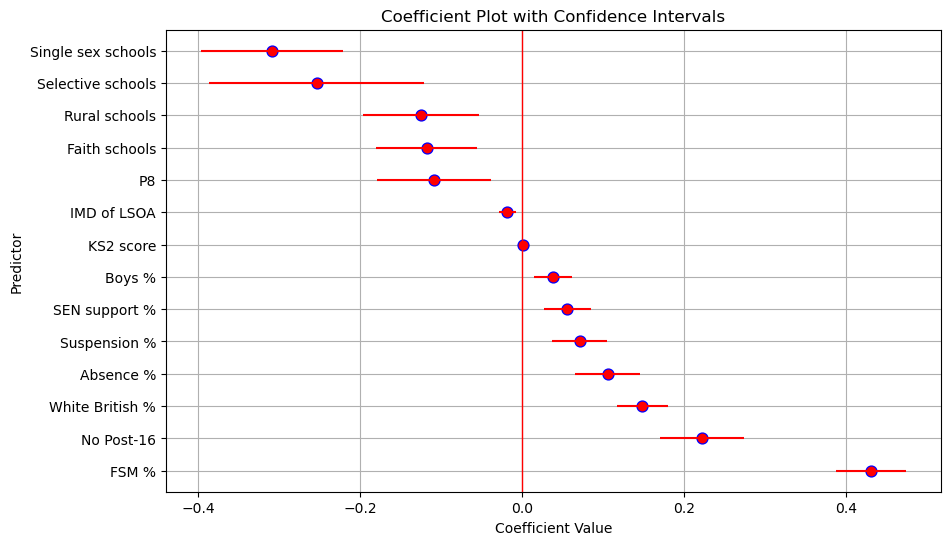

In [141]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

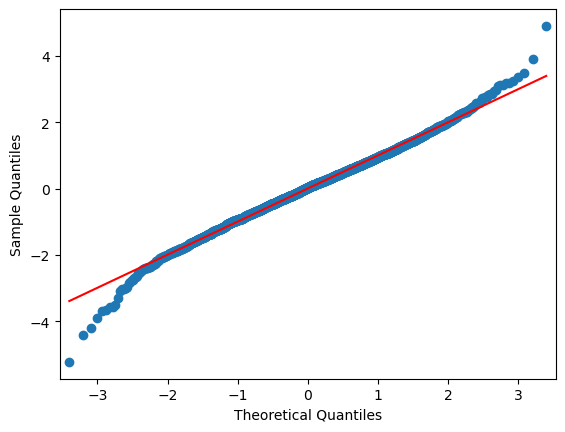

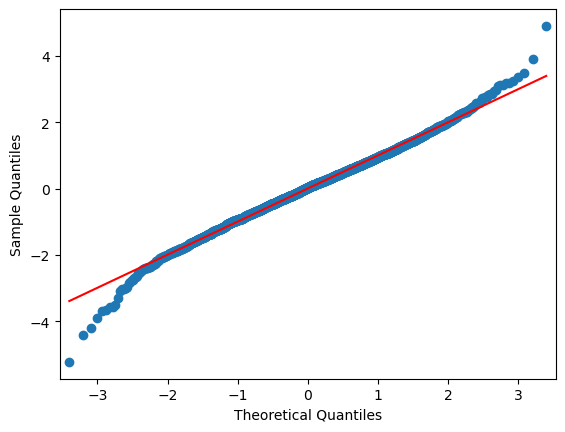

In [142]:
qqplot(model.resid_pearson, line='r')

# Add predictions and residuals to dataframe

In [143]:
data['predictions'] = model.fittedvalues

In [144]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [145]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
count              2972.000000            2972.000000        2972.000000   
mean                  0.230585               8.819434           0.113392   
std                   0.120709               2.263271           0.317124   
min                   0.000000               3.034038           0.000000   
25%                   0.100000               7.330413           0.000000   
50%                   0.200000               8.653188           0.000000   
75%   

In [146]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   
6  100053            4.469274            8.1                24.7   

               urban_rural denomination   FSM  White_British   EAL  perc_boys  \
1  Urban major conurbation     No faith  41.2           10.8  51.7  56.874466   
3  Urban major conurbation     No faith  35.6           38.8  34.1   4.963971   
4  Urban major conurbation     No faith  61.8            3.9  67.3  56.163114   
5  Urban major conurbation     No faith  41.8           11.4  38.1  51.630023   
6  Urban major conurbation     No faith  34.3           46.3  23.6  65.778160   

    region_name             school_name  headcount  perm_excl_rate  susp_rate  \
1  Inner London         The UCL Academy     1171.0         0.34159   14.51751   
3  Inner London  Parliament Hill School     1249.0         0.08006    9.12730   
4  Inner London      Regent High School     1079.0         0.09268    5.37535   
5  Inner London        Hampstead School     1319.0         0.07582    3.26005   
6  Inner London  Acland Burghley School     1163.0         0.17197    8.25451   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1             8.45431            168        105.1          47.4       -0.18   
3             5.04404            174        107.1          59.1        0.61   
4             4.26321            173        103.5          43.8       -0.06   
5             2.65353            197        103.2          44.6       -0.04   
6             4.47120            178        106.0          50.3       -0.17   

   selective  KS4_pass_rate POSTCODE  post16 school_sex                 type  \
1          0             27  NW3 3AQ       1      Mixed  Academy sponsor led   
3          0             40  NW5 1RL       1      Girls     Community school   
4          0             21  NW1 1RX       1      Mixed     Community school   
5          0             10  NW2 3RT       1      Mixed     Community school   
6          0             34  NW5 1UJ       1      Mixed     Community school   

          Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
1  Requires improvement    10.247652  3.245090  E01000963  8.0   
3                  Good    13.370697  1.281025  E01000912  4.0   
4                  Good    17.886932  3.614458  E01000952  2.0   
5                  Good     9.628506  2.880970  E01000871  7.0   
6                  Good    11.951849  7.480653  E01000928  5.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1                 13.0                      0.2              10.803701   
3                 14.7                      0.1               7.769210   
4                 11.9                      0.2              11.246731   
5                 14.9                      0.2               8.103096   
6                 12.2                      0.3               7.963311   

   single_sex_binary  faith_binary region_new urban_binary Ofsted_num  \
1                  0             0     London            1          2   
3                  1             0     London            1          3   
4                  0             0     London            1          3   
5                  0             0     London            1          3   
6                  0             0     London            1          3   

   predictions  residuals  
1    -0.252085  -0.298261  
3     0.123846  -0.563653  
4     0.248566  -1.014597  
5    -0.879446  -1.740212  
6     0.429691  -0.470014

In [147]:
data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

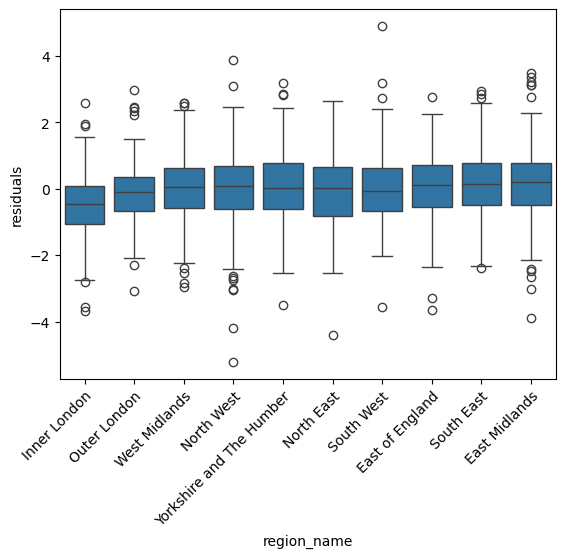

In [148]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

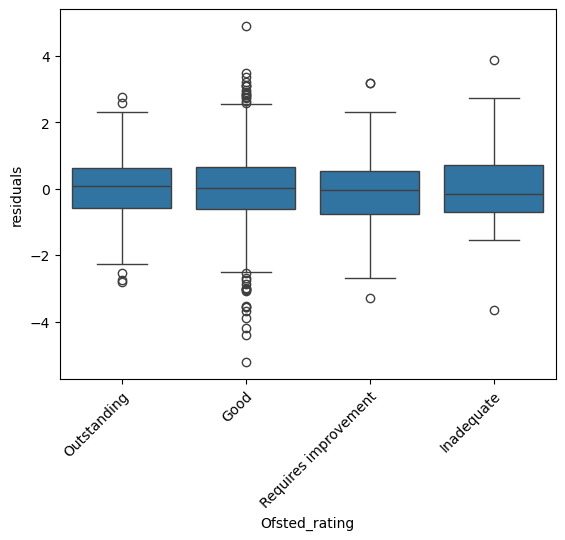

In [149]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

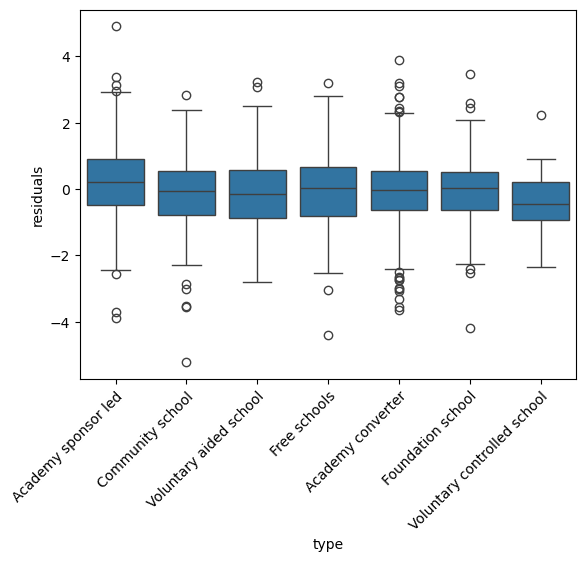

In [150]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

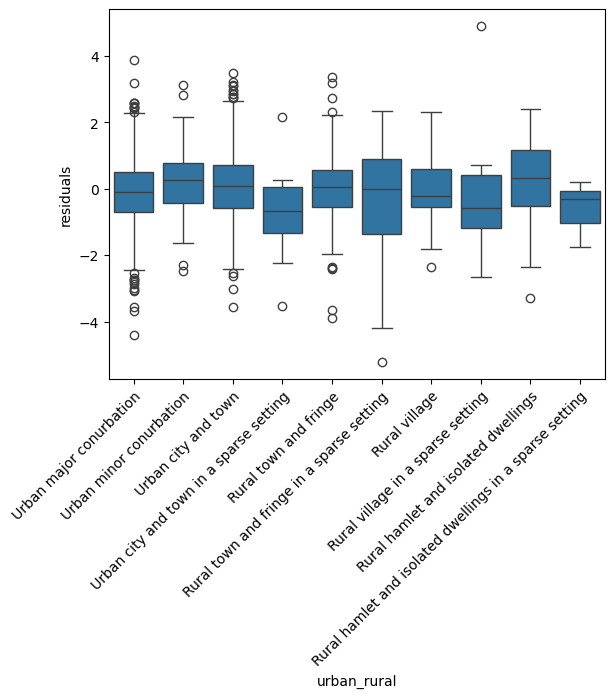

In [151]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

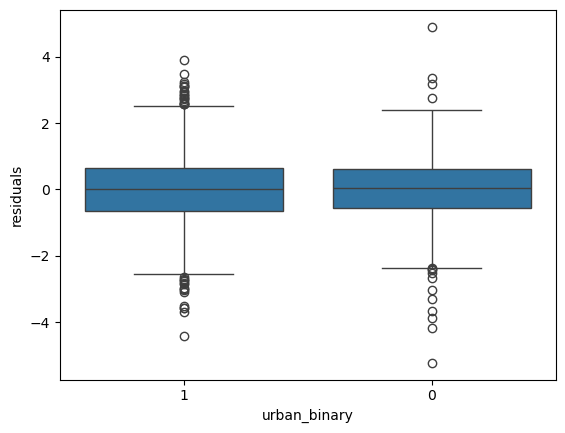

In [152]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

### read in coordinates and map residuals

In [153]:
import geopandas as gpd
import contextily as ctx

In [154]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [155]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [156]:
coords

URN   Easting  Northing
0     137181  526867.0  184105.0
1     100049  528159.0  184498.0
2     100050  528369.0  186019.0
3     100051  529555.0  183356.0
4     100052  524402.0  185633.0
...      ...       ...       ...
3141  137251  368104.0  521037.0
3142  137338  338127.0  478474.0
3143  136357  360707.0  478609.0
3144  141106  321416.0  471354.0
3145  135940  320952.0  469650.0

[3146 rows x 3 columns]

In [157]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [158]:
data_with_coords['residuals'].describe()

count    2972.000000
mean        0.002532
std         0.997807
min        -5.218761
25%        -0.638597
50%         0.027245
75%         0.636911
max         4.896763
Name: residuals, dtype: float64

In [159]:
data_with_coords['residuals_banding'] = data_with_coords['residuals']

In [160]:
data_with_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rat

In [161]:
print(data_with_coords['residuals_banding'].dtype)

float64


In [162]:
data_with_coords.loc[data_with_coords['residuals'] < -1, 'residuals_banding'] = -1
data_with_coords.loc[(data_with_coords['residuals'] >= -1) & (data_with_coords['residuals_banding'] <= 1), 'residuals_banding'] = 0
data_with_coords.loc[data_with_coords['residuals'] > 1, 'residuals_banding'] = 1

In [163]:
data_with_coords.loc[data_with_coords['residuals'] < -1]

URN  not_sustained_rate  total_absence  persistent_absence  \
2     100051            5.464481           11.4                42.9   
3     100052            1.932367            8.2                24.0   
6     100055            3.875969            7.6                20.8   
9     100171            2.840909            7.4                22.3   
19    100193            0.000000            7.2                20.4   
...      ...                 ...            ...                 ...   
2956  112379            1.123596            8.8                27.9   
2964  136732            0.000000            5.3                15.2   
2965  136526            1.898734            8.0                24.3   
2967  137107            0.000000            6.5                21.0   
2970  136357            0.000000            6.8                21.2   

                                    urban_rural denomination   FSM  \
2                       Urban major conurbation     No faith  61.8   
3                       Urban major conurbation     No faith  41.8   
6                       Urban major conurbation    Christian  51.3   
9                       Urban major conurbation    Christian  41.4   
19                      Urban major conurbation    Christian  17.6   
...                                         ...          ...   ...   
2956          Rural village in a sparse setting     No faith  11.0   
2964    Urban city and town in a sparse setting     No faith   3.1   
2965                        Urban city and town     No faith  16.6   
2967  Rural town and fringe in a sparse setting     No faith  15.8   
2970  Rural town and fringe in a sparse setting     No faith   6.9   

      White_British   EAL  perc_boys   region_name  \
2               3.9  67.3  56.163114  Inner London   
3              11.4  38.1  51.630023  Inner London   
6              16.8  51.7  54.206731  Inner London   
9               8.9  51.5  51.170960  Outer London   
19             10.8  16.6   0.000000  Outer London   
...             ...   ...        ...           ...   
2956           82.5  13.6  51.599147    North West   
2964           84.1   8.2  52.408478    North West   
2965           85.9   7.4  48.210526    North West   
2967           92.9   2.0  48.863636    North West   
2970           92.7   1.4  49.659284    North West   

                                            school_name  headcount  \
2                                    Regent High School     1079.0   
3                                      Hampstead School     1319.0   
6                     Maria Fidelis Catholic School FCJ      832.0   
9     Saint Mary Magdalene Church of England All Thr...     1708.0   
19                           St Ursula's Convent School      631.0   
...                                                 ...        ...   
2956                                   The Lakes School      469.0   
2964             Queen Elizabeth Grammar School Penrith     1038.0   
2965                         The Queen Katherine School      950.0   
2967                      Kirkby Stephen Grammar School      352.0   
2970                             Queen Elizabeth School     1174.0   

      perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
2            0.09268    5.37535             4.26321            173   
3            0.07582    3.26005             2.65353            197   
6            0.24038   13.70192             7.45192            134   
9            0.00000    5.97190             3.68852            168   
19           0.00000   16.48177            11.41046            122   
...              ...        ...                 ...            ...   
2956         0.00000   16.41791            10.87420             66   
2964         0.09634    6.16570             4.33526            158   
2965         0.10526   16.00000             6.00000            148   
2967         0.00000    4.82955             4.26136             57   
2970         0.08518    3.40716             2.38501    

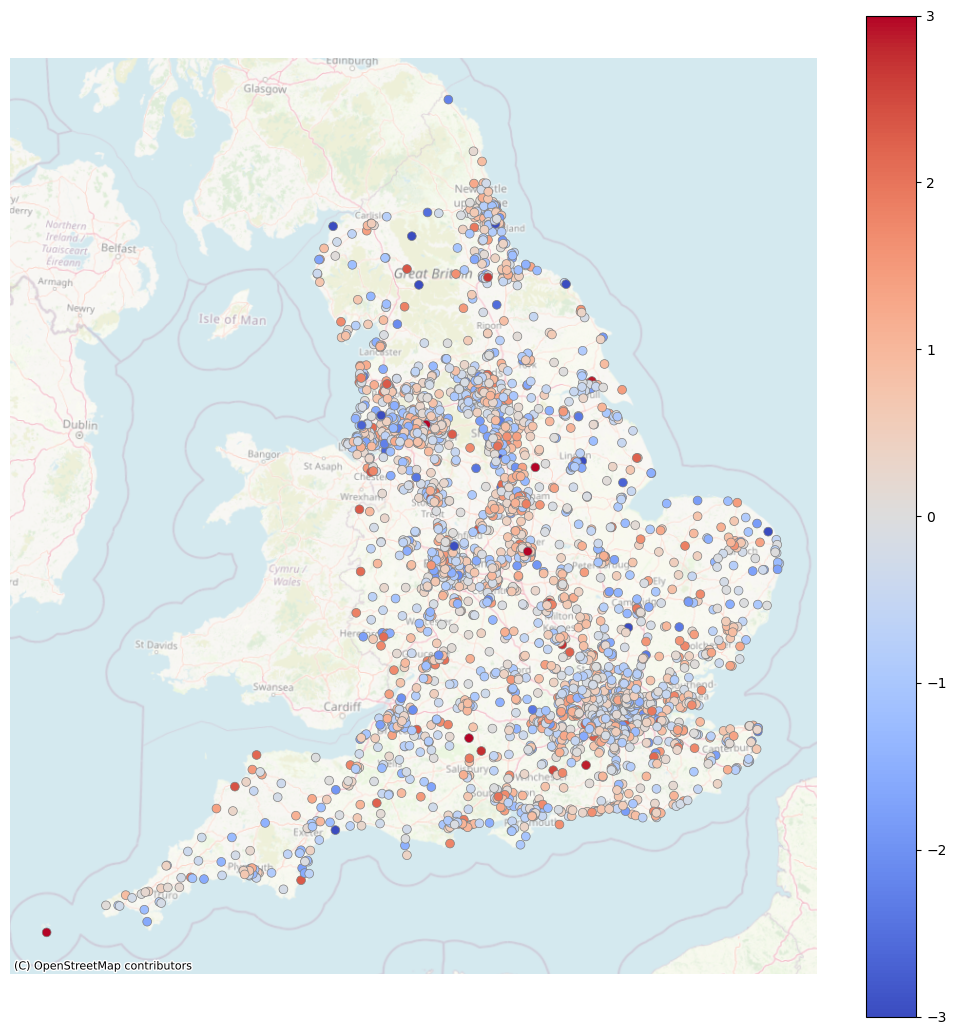

In [164]:
gdf = gpd.GeoDataFrame(
    data_with_coords,
    geometry = gpd.points_from_xy(data_with_coords['Easting'], data_with_coords['Northing']),
    crs = 'EPSG:27700'
)

fig, ax = plt.subplots(figsize=(13, 13))
gdf.plot(ax=ax, 
         column='residuals', 
         markersize=40, 
         cmap="coolwarm",
         edgecolor='grey',
         linewidth = 0.5,
         vmin=-3,
         vmax=3,
        legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

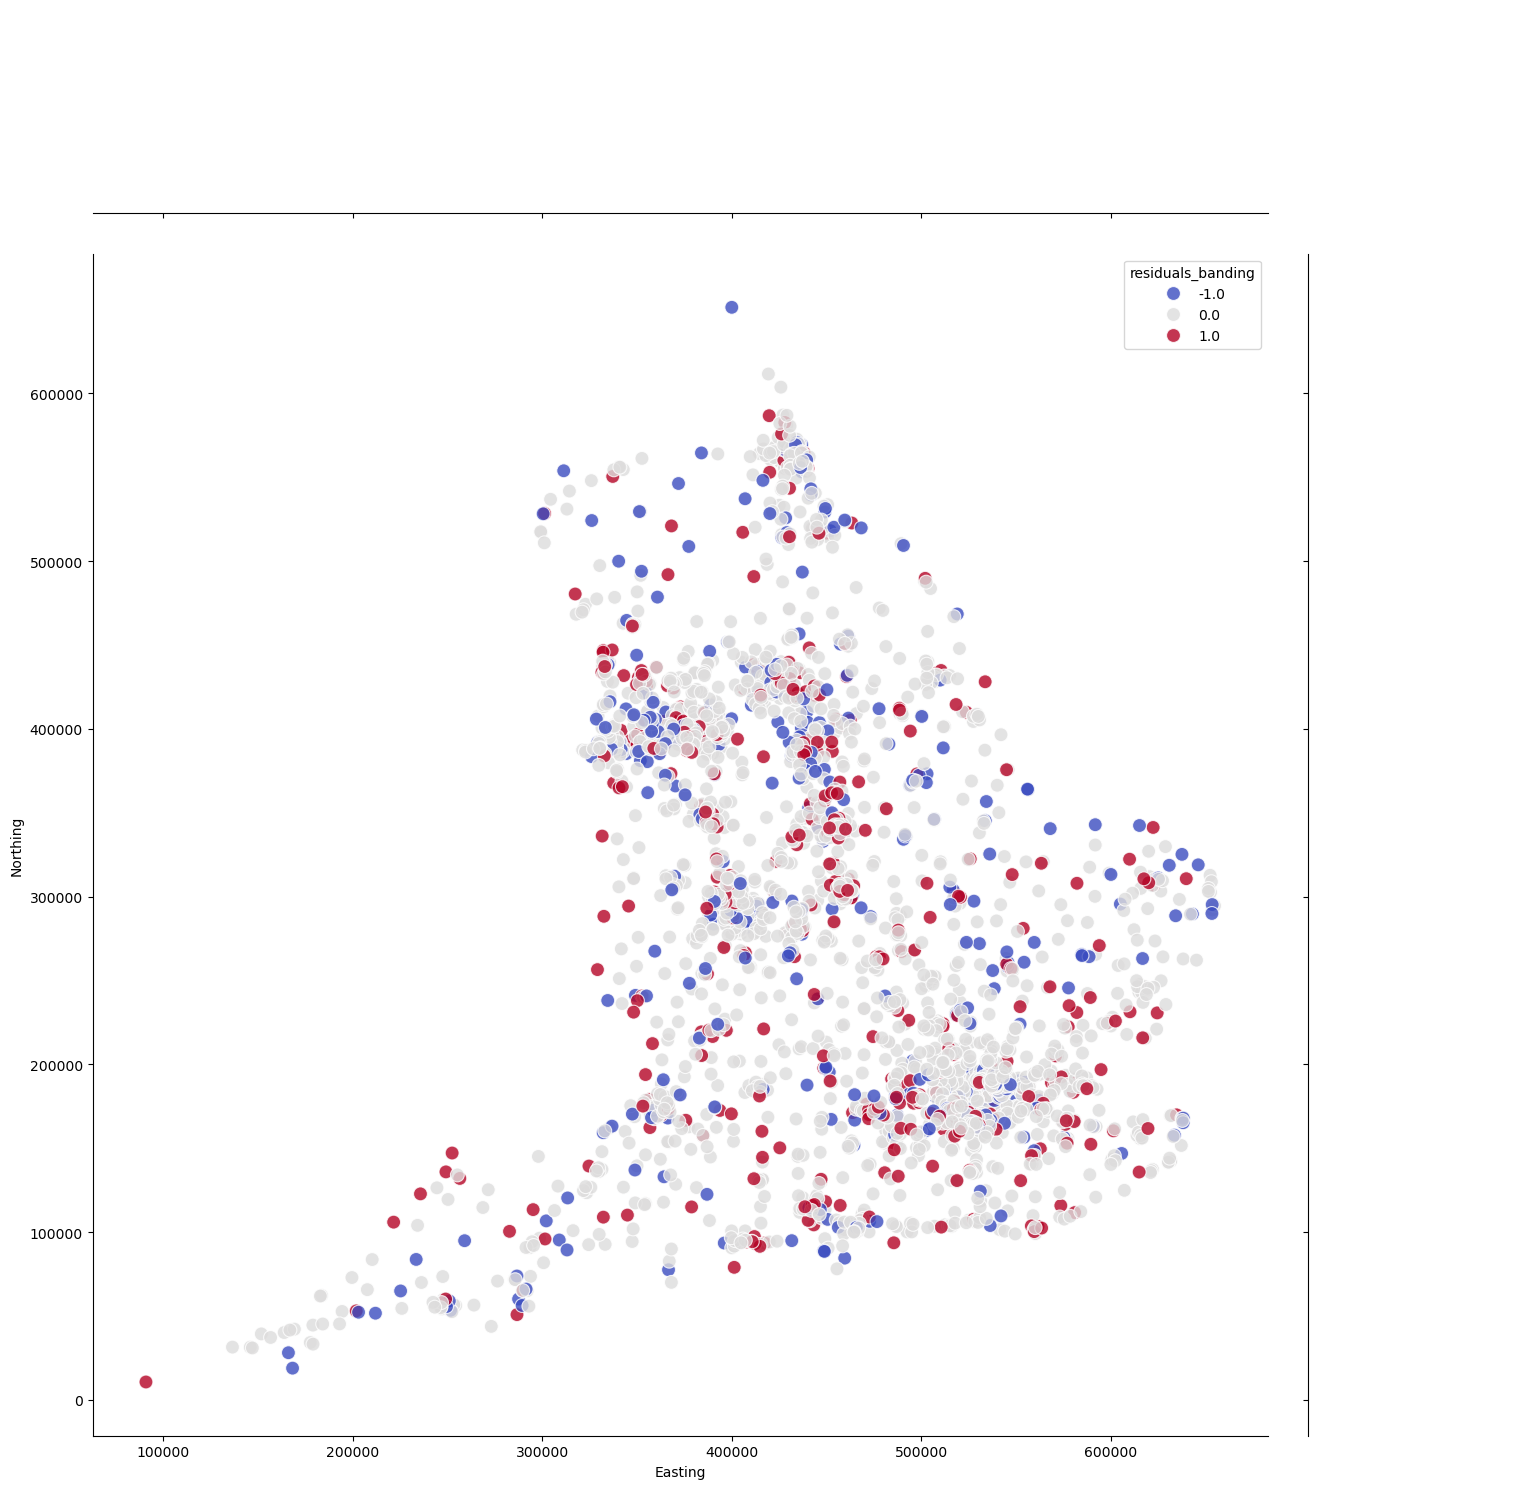

In [165]:
g = sns.JointGrid(data=data_with_coords, 
                  x='Easting', y='Northing', hue='residuals_banding', height=15, marginal_ticks=False)

g.plot_joint(sns.scatterplot, s=100, alpha=0.8,
            hue_norm=(-1, 1), palette="coolwarm");

## Groupby LSOA

In [315]:
LSOA_residuals = data.groupby('LSOA11')['residuals'].mean()

In [317]:
LSOA_residuals = pd.DataFrame(LSOA_residuals)
LSOA_residuals

residuals
LSOA11              
E01000031  -0.749526
E01000035   0.041182
E01000051  -0.248226
E01000061  -0.086691
E01000066   0.226985
...              ...
E01033693   5.193386
E01033701  -0.654812
E01033726   0.334445
E01033737  -1.221233
E01033745   0.517026

[2860 rows x 1 columns]

In [318]:
LSOA_residuals.to_csv('LSOA_residuals.csv', index=False)

Shape file source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones/resource/bf174b2e-fc72-449d-bbbf-b12e9892c88d 

In [321]:
map = gpd.read_file('infuse_lsoa_lyr_2011.shp')

In [326]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42619 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    42619 non-null  object  
 1   geo_label   42619 non-null  object  
 2   geo_labelw  6976 non-null   object  
 3   label       42619 non-null  object  
 4   name        42619 non-null  object  
 5   geometry    42619 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 2.0+ MB


<Axes: >

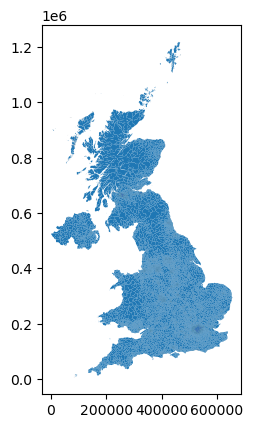

In [322]:
map.plot()

In [323]:
map.head()

geo_code       geo_label geo_labelw                        label  \
0  E01003513     Newham 035D       None  E92000001E09000025E01003513   
1  E01031647    Horsham 002D       None  E92000001E07000227E01031647   
2  E01022006   Tendring 002C       None  E92000001E07000076E01022006   
3  E01001159    Croydon 002C       None  E92000001E09000008E01001159   
4  E01008088  Sheffield 012B       None  E92000001E08000019E01008088   

             name                                           geometry  
0     Newham 035D  POLYGON ((541893.189 181249.621, 541900.568 18...  
1    Horsham 002D  POLYGON ((518376.682 132574.695, 518375.785 13...  
2   Tendring 002C  POLYGON ((623754.716 231042.037, 623759.75 231...  
3    Croydon 002C  POLYGON ((532233.977 170474.976, 532229.824 17...  
4  Sheffield 012B  POLYGON ((433539.233 392096.845, 433539.125 39...

In [324]:
england = map[map['geo_code'].str.startswith('E01')]

In [325]:
england.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32844 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 1.8+ MB


<Axes: >

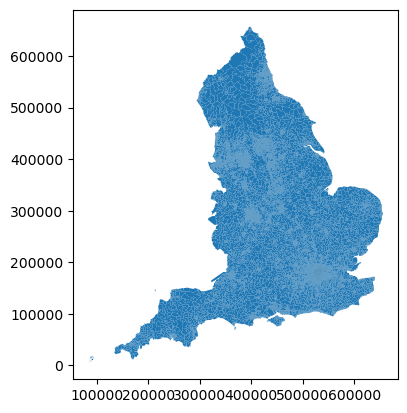

In [327]:
england.plot()

In [328]:
england_lsoa_residuals = pd.merge(england, LSOA_residuals, left_on='geo_code', right_on='LSOA11', how='left')

In [330]:
england_lsoa_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
 6   residuals   2860 non-null   float64 
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.8+ MB


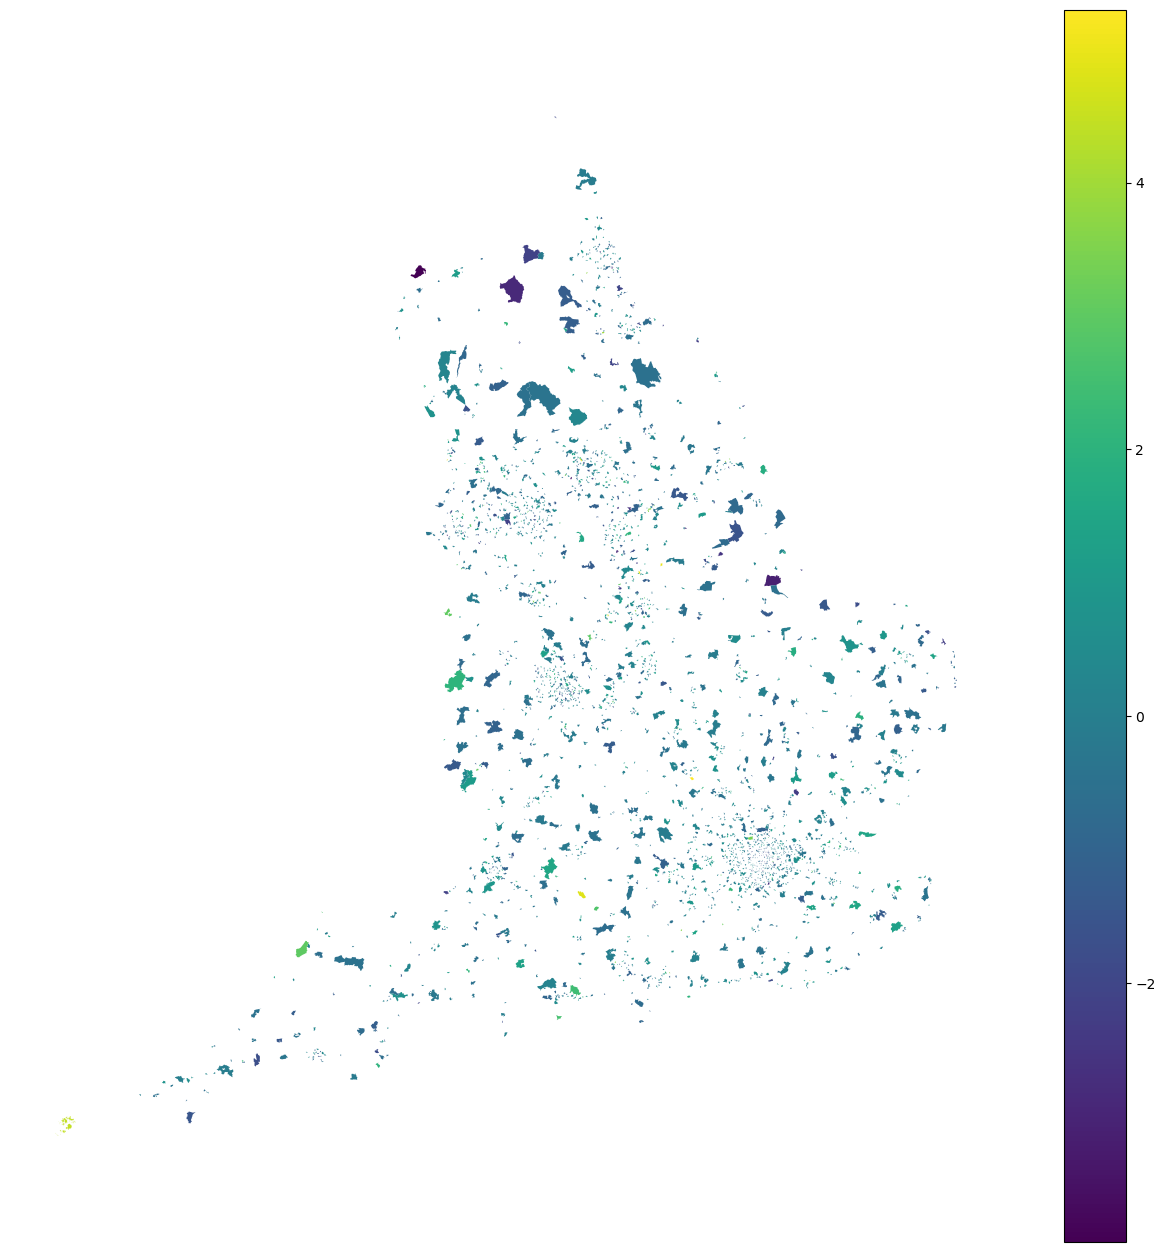

In [332]:
f,ax = plt.subplots(1, figsize=(16,16))
england_lsoa_residuals.plot(column='residuals', legend=True, ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


## Groupby region

In [166]:
data_temp_london = data.copy()

In [167]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [168]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [169]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                        
East Midlands              0.137442
East of England            0.054377
London                    -0.273547
North East                -0.089592
North West                 0.011741
South East                 0.122295
South West                 0.014435
West Midlands              0.024542
Yorkshire and The Humber   0.055179

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [170]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [171]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [172]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [173]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...   0.054377  
1  POLYGON ((510758.595 482644.305, 510766.754 48...   0.055179  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....   0.122295  
3  POLYGON ((454996.828 276726.552, 454974.133 27...   0.137442  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  -0.273547  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....   0.014435  
6  POLYGON ((431443.073 299111.23, 431449.304 299...   0.024542  
7  POLYGON ((380424.183 522381.432, 380424.209 52...   0.011741  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....  -0.089592

In [174]:
england_map_residuals['residuals'].describe()

count    9.000000
mean     0.006319
std      0.124143
min     -0.273547
25%      0.011741
50%      0.024542
75%      0.055179
max      0.137442
Name: residuals, dtype: float64

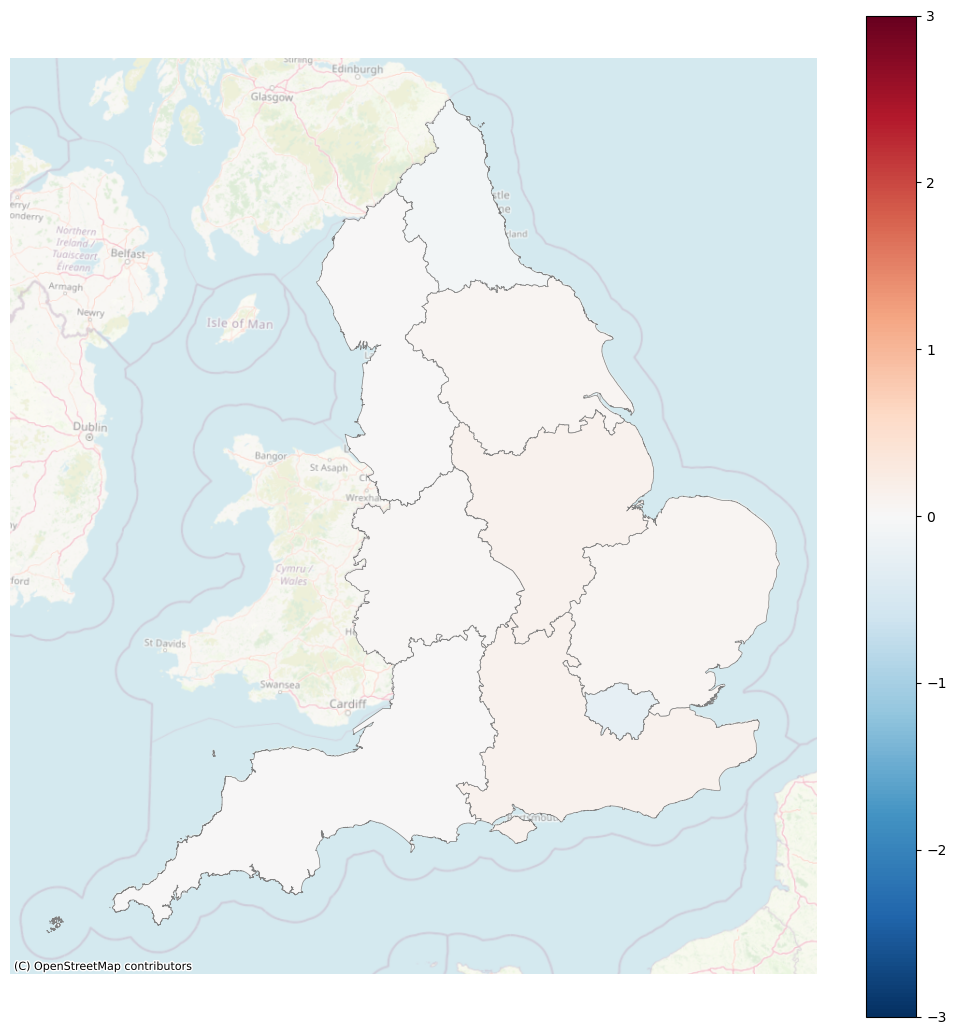

In [175]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           edgecolor='grey',
                           linewidth = 0.5,
                           vmin=-3,
                           vmax=3,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

## Groupby LA

In [176]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [177]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [178]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [179]:
data_residuals = data[['URN', 'residuals']]

In [180]:
data_residuals

URN  residuals
1     137181  -0.298261
3     100050  -0.563653
4     100051  -1.014597
5     100052  -1.740212
6     100053  -0.470014
...      ...        ...
3141  137107  -3.015579
3142  137251   2.356040
3143  137338   0.594829
3144  136357  -2.098326
3146  135940   0.830684

[2972 rows x 2 columns]

In [181]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [182]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           2972 non-null   int64  
 1   residuals                     2972 non-null   float64
 2   la_name                       2972 non-null   object 
 3   district_administrative_name  2972 non-null   object 
 4   district_administrative_code  2972 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 116.2+ KB


In [183]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [184]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [185]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  308 non-null    object 
 1   residuals                     308 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [186]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

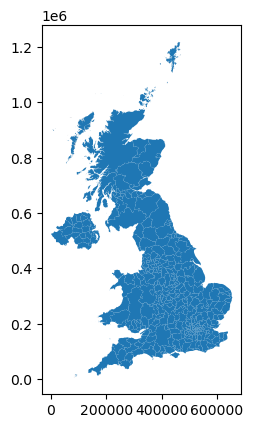

In [187]:
map.plot()

In [188]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [189]:
england = map[map['geo_code'].str.startswith('E')]

In [190]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

### update geo codes in 'england' to match current codes

In [191]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [192]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [193]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [194]:
england_updated = england.copy()

In [195]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [196]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [197]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [198]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [199]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [200]:
data['residuals'].describe()

count    2972.000000
mean        0.002532
std         0.997807
min        -5.218761
25%        -0.638597
50%         0.027245
75%         0.636911
max         4.896763
Name: residuals, dtype: float64

In [201]:
england_la_residuals['residuals'].describe()

count    324.000000
mean       0.007637
std        0.456149
min       -1.408646
25%       -0.261103
50%        0.017083
75%        0.325112
max        1.254763
Name: residuals, dtype: float64

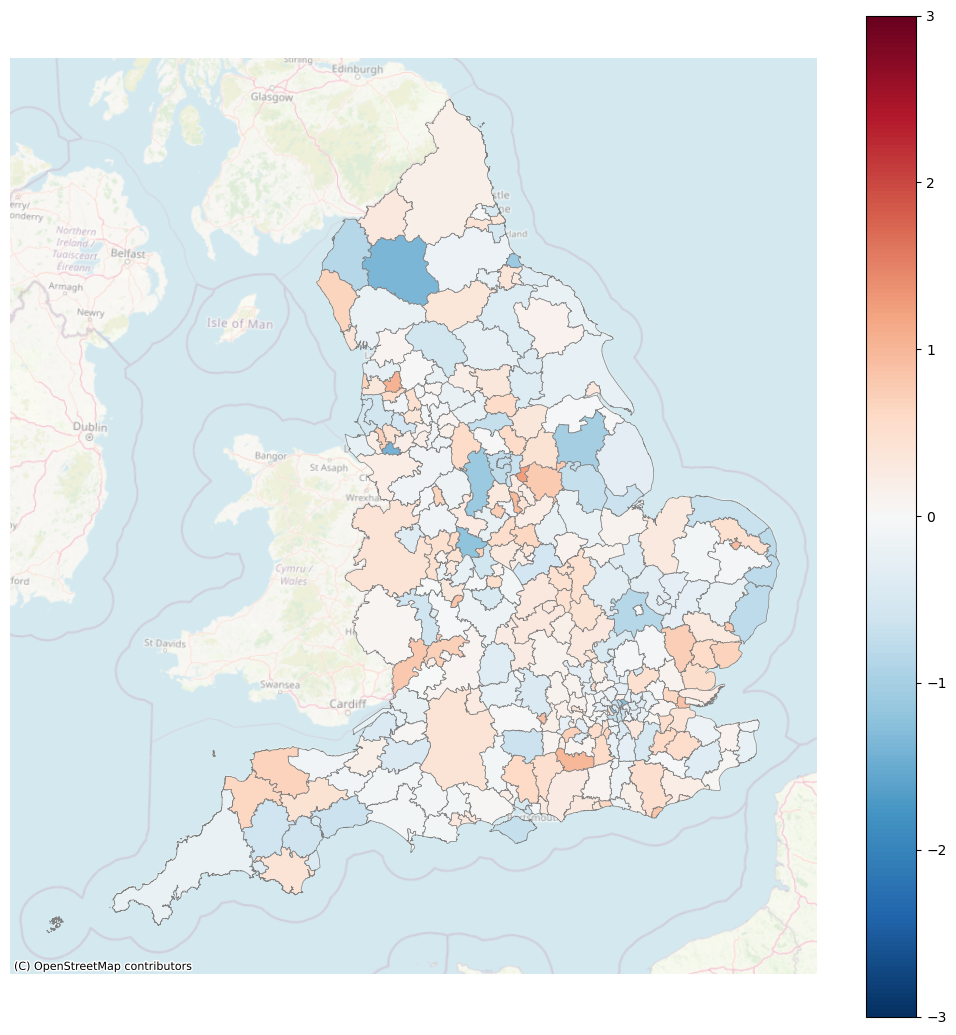

In [202]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-3,
                           vmax=3,
                           edgecolor='grey',
                           linewidth = 0.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


# remove axis
ax.set_axis_off()
plt.show();


# Plot means

In [203]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
count              2972.000000            2972.000000        2972.000000   
mean                  0.230585               8.819434           0.113392   
std                   0.120709               2.263271           0.317124   
min                   0.000000               3.034038           0.000000   
25%                   0.100000               7.330413           0.000000   
50%                   0.200000               8.653188           0.000000   
75%   

In [204]:
ns_mean = data['not_sustained_rate'].mean()
ns_mean

5.354764612450533

#### Headcount

In [205]:
headcount = data[['headcount', 'not_sustained_rate']]

In [206]:
headcount['Rank'] = 'Middle'
headcount

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/3364303623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headcount['Rank'] = 'Middle'


headcount  not_sustained_rate    Rank
1        1171.0            5.172414  Middle
3        1249.0            2.824859  Middle
4        1079.0            5.464481  Middle
5        1319.0            1.932367  Middle
6        1163.0            4.469274  Middle
...         ...                 ...     ...
3141      352.0            0.000000  Middle
3142      370.0            9.523810  Middle
3143      340.0            4.545455  Middle
3144     1174.0            0.000000  Middle
3146     1159.0            9.580838  Middle

[2972 rows x 3 columns]

In [207]:
q25 = data['headcount'].quantile(0.25)
q75 = data['headcount'].quantile(0.75)

In [208]:
headcount.loc[headcount['headcount'] > q75, 'Rank'] = 'High'
headcount.loc[headcount['headcount'] < q25, 'Rank'] = 'Low'

In [209]:
mean_neet_headcount = headcount.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_headcount

Rank
High      4.040723
Low       6.781379
Middle    5.298780
Name: not_sustained_rate, dtype: float64

In [210]:
# convert series to df
mean_neet_headcount = mean_neet_headcount.reset_index()

# rename columns
mean_neet_headcount.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_headcount['Level'] = pd.Categorical(mean_neet_headcount['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_headcount = mean_neet_headcount.sort_values('Level')

# replace values in Level col
mean_neet_headcount['Level'].replace('High', 'Top 25% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Middle', 'Center 50% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Low', 'Bottom 25% Headcount', inplace=True)

# new column for characteristic label
mean_neet_headcount['Characteristic'] = 'Headcount'

# reorder cols
mean_neet_headcount = mean_neet_headcount[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_headcount

Characteristic                 Level  Mean Not Sustained Rate
1      Headcount  Bottom 25% Headcount                 6.781379
2      Headcount  Center 50% Headcount                 5.298780
0      Headcount     Top 25% Headcount                 4.040723

#### Pupil:teacher

In [211]:
pup_teach = data[['pupil_teacher_ratio', 'not_sustained_rate']]

In [212]:
pup_teach['Rank'] = 'Middle'
pup_teach

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/1181414789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pup_teach['Rank'] = 'Middle'


pupil_teacher_ratio  not_sustained_rate    Rank
1                    13.0            5.172414  Middle
3                    14.7            2.824859  Middle
4                    11.9            5.464481  Middle
5                    14.9            1.932367  Middle
6                    12.2            4.469274  Middle
...                   ...                 ...     ...
3141                 16.1            0.000000  Middle
3142                 19.3            9.523810  Middle
3143                 17.3            4.545455  Middle
3144                 12.7            0.000000  Middle
3146                 16.6            9.580838  Middle

[2972 rows x 3 columns]

In [213]:
q25 = data['pupil_teacher_ratio'].quantile(0.25)
q75 = data['pupil_teacher_ratio'].quantile(0.75)

In [214]:
pup_teach.loc[pup_teach['pupil_teacher_ratio'] > q75, 'Rank'] = 'High'
pup_teach.loc[pup_teach['pupil_teacher_ratio'] < q25, 'Rank'] = 'Low'

In [215]:
mean_neet_pup_teach = pup_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_pup_teach

Rank
High      5.188179
Low       6.035457
Middle    5.111692
Name: not_sustained_rate, dtype: float64

In [216]:
# convert series to df
mean_neet_pup_teach = mean_neet_pup_teach.reset_index()

# rename columns
mean_neet_pup_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_pup_teach['Level'] = pd.Categorical(mean_neet_pup_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_pup_teach = mean_neet_pup_teach.sort_values('Level')

# replace values in Level col
mean_neet_pup_teach['Level'].replace('High', 'Top 25% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Middle', 'Center 50% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Low', 'Bottom 25% Pupil:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_pup_teach['Characteristic'] = 'Pupil:Teacher Ratio'

# reorder cols
mean_neet_pup_teach = mean_neet_pup_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_pup_teach

Characteristic                           Level  \
1  Pupil:Teacher Ratio  Bottom 25% Pupil:Teacher Ratio   
2  Pupil:Teacher Ratio  Center 50% Pupil:Teacher Ratio   
0  Pupil:Teacher Ratio     Top 25% Pupil:Teacher Ratio   

   Mean Not Sustained Rate  
1                 6.035457  
2                 5.111692  
0                 5.188179

#### Assistant:teacher

In [217]:
ass_teach = data[['assistant_teacher_ratio', 'not_sustained_rate']]

In [218]:
ass_teach['Rank'] = 'Middle'
ass_teach

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/828784514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_teach['Rank'] = 'Middle'


assistant_teacher_ratio  not_sustained_rate    Rank
1                         0.2            5.172414  Middle
3                         0.1            2.824859  Middle
4                         0.2            5.464481  Middle
5                         0.2            1.932367  Middle
6                         0.3            4.469274  Middle
...                       ...                 ...     ...
3141                      0.2            0.000000  Middle
3142                      0.2            9.523810  Middle
3143                      0.6            4.545455  Middle
3144                      0.2            0.000000  Middle
3146                      0.5            9.580838  Middle

[2972 rows x 3 columns]

In [219]:
q25 = data['assistant_teacher_ratio'].quantile(0.25)
q75 = data['assistant_teacher_ratio'].quantile(0.75)

In [220]:
ass_teach.loc[ass_teach['assistant_teacher_ratio'] > q75, 'Rank'] = 'High'
ass_teach.loc[ass_teach['assistant_teacher_ratio'] < q25, 'Rank'] = 'Low'

In [221]:
mean_neet_ass_teach = ass_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_ass_teach

Rank
High      7.003471
Low       3.056430
Middle    5.149174
Name: not_sustained_rate, dtype: float64

In [222]:
# convert series to df
mean_neet_ass_teach = mean_neet_ass_teach.reset_index()

# rename columns
mean_neet_ass_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_ass_teach['Level'] = pd.Categorical(mean_neet_ass_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_ass_teach = mean_neet_ass_teach.sort_values('Level')

# replace values in Level col
mean_neet_ass_teach['Level'].replace('High', 'Top 25% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Middle', 'Center 50% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Low', 'Bottom 25% Assistant:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_ass_teach['Characteristic'] = 'Assistant:Teacher Ratio'

# reorder cols
mean_neet_ass_teach = mean_neet_ass_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ass_teach

Characteristic                               Level  \
1  Assistant:Teacher Ratio  Bottom 25% Assistant:Teacher Ratio   
2  Assistant:Teacher Ratio  Center 50% Assistant:Teacher Ratio   
0  Assistant:Teacher Ratio     Top 25% Assistant:Teacher Ratio   

   Mean Not Sustained Rate  
1                 3.056430  
2                 5.149174  
0                 7.003471

#### Suspension rate

In [223]:
susp = data[['susp_rate', 'not_sustained_rate']]

In [224]:
susp['Rank'] = 'Middle'
susp

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/4005748282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susp['Rank'] = 'Middle'


susp_rate  not_sustained_rate    Rank
1      14.51751            5.172414  Middle
3       9.12730            2.824859  Middle
4       5.37535            5.464481  Middle
5       3.26005            1.932367  Middle
6       8.25451            4.469274  Middle
...         ...                 ...     ...
3141    4.82955            0.000000  Middle
3142    5.67568            9.523810  Middle
3143    5.88235            4.545455  Middle
3144    3.40716            0.000000  Middle
3146    9.57722            9.580838  Middle

[2972 rows x 3 columns]

In [225]:
q25 = data['susp_rate'].quantile(0.25)
q75 = data['susp_rate'].quantile(0.75)

In [226]:
susp.loc[susp['susp_rate'] > q75, 'Rank'] = 'High'
susp.loc[susp['susp_rate'] < q25, 'Rank'] = 'Low'

In [227]:
mean_neet_susp = susp.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_susp

Rank
High      7.905579
Low       3.086884
Middle    5.213298
Name: not_sustained_rate, dtype: float64

In [228]:
# convert series to df
mean_neet_susp = mean_neet_susp.reset_index()

# rename columns
mean_neet_susp.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_susp['Level'] = pd.Categorical(mean_neet_susp['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_susp = mean_neet_susp.sort_values('Level')

# replace values in Level col
mean_neet_susp['Level'].replace('High', 'Top 25% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Middle', 'Center 50% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Low', 'Bottom 25% Suspension Rate', inplace=True)

# new column for characteristic label
mean_neet_susp['Characteristic'] = 'Suspension Rate'

# reorder cols
mean_neet_susp = mean_neet_susp[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_susp

Characteristic                       Level  Mean Not Sustained Rate
1  Suspension Rate  Bottom 25% Suspension Rate                 3.086884
2  Suspension Rate  Center 50% Suspension Rate                 5.213298
0  Suspension Rate     Top 25% Suspension Rate                 7.905579

#### Progress 8

In [229]:
P8 = data[['Progress_8', 'not_sustained_rate']]

In [230]:
P8['Rank'] = 'Middle'
P8

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/3514377501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P8['Rank'] = 'Middle'


Progress_8  not_sustained_rate    Rank
1          -0.18            5.172414  Middle
3           0.61            2.824859  Middle
4          -0.06            5.464481  Middle
5          -0.04            1.932367  Middle
6          -0.17            4.469274  Middle
...          ...                 ...     ...
3141        0.01            0.000000  Middle
3142       -0.15            9.523810  Middle
3143        0.28            4.545455  Middle
3144        0.43            0.000000  Middle
3146       -0.27            9.580838  Middle

[2972 rows x 3 columns]

In [231]:
q25 = data['Progress_8'].quantile(0.25)
q75 = data['Progress_8'].quantile(0.75)

In [232]:
P8.loc[P8['Progress_8'] > q75, 'Rank'] = 'High'
P8.loc[P8['Progress_8'] < q25, 'Rank'] = 'Low'

In [233]:
mean_neet_P8 = P8.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_P8

Rank
High      3.045473
Low       8.139123
Middle    5.130148
Name: not_sustained_rate, dtype: float64

In [234]:
# convert series to df
mean_neet_P8 = mean_neet_P8.reset_index()

# rename columns
mean_neet_P8.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_P8['Level'] = pd.Categorical(mean_neet_P8['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_P8 = mean_neet_P8.sort_values('Level')

# replace values in Level col
mean_neet_P8['Level'].replace('High', 'Top 25% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Middle', 'Center 50% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Low', 'Bottom 25% Progress 8 Score', inplace=True)

# new column for characteristic label
mean_neet_P8['Characteristic'] = 'Progress 8 Score'

# reorder cols
mean_neet_P8 = mean_neet_P8[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_P8

Characteristic                        Level  Mean Not Sustained Rate
1  Progress 8 Score  Bottom 25% Progress 8 Score                 8.139123
2  Progress 8 Score  Center 50% Progress 8 Score                 5.130148
0  Progress 8 Score     Top 25% Progress 8 Score                 3.045473

#### Post 16

In [235]:
mean_neet_post16 = data.groupby('post16')['not_sustained_rate'].mean()
print(mean_neet_post16)

post16
0    6.885885
1    4.439385
Name: not_sustained_rate, dtype: float64


In [236]:
# convert series to df
mean_neet_post16 = mean_neet_post16.reset_index()

# rename columns
mean_neet_post16.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_post16['Level'].replace(0, 'No Post-16', inplace=True)
mean_neet_post16['Level'].replace(1, 'Post-16', inplace=True)

# new column for characteristic label
mean_neet_post16['Characteristic'] = 'Post-16'

# reorder cols
mean_neet_post16 = mean_neet_post16[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_post16

Characteristic       Level  Mean Not Sustained Rate
0        Post-16  No Post-16                 6.885885
1        Post-16     Post-16                 4.439385

#### Faith

In [237]:
mean_neet_faith = data.groupby('faith_binary')['not_sustained_rate'].mean()
print(mean_neet_faith)

faith_binary
0    5.559574
1    4.446789
Name: not_sustained_rate, dtype: float64


In [238]:
# convert series to df
mean_neet_faith = mean_neet_faith.reset_index()

# rename columns
mean_neet_faith.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_faith['Level'].replace(0, 'Non Faith School', inplace=True)
mean_neet_faith['Level'].replace(1, 'Faith School', inplace=True)

# new column for characteristic label
mean_neet_faith['Characteristic'] = 'Faith'

# reorder cols
mean_neet_faith = mean_neet_faith[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_faith

Characteristic             Level  Mean Not Sustained Rate
0          Faith  Non Faith School                 5.559574
1          Faith      Faith School                 4.446789

#### Single sex

In [239]:
mean_neet_sex = data.groupby('single_sex_binary')['not_sustained_rate'].mean()
print(mean_neet_sex)

single_sex_binary
0    5.753598
1    2.236289
Name: not_sustained_rate, dtype: float64


In [240]:
# convert series to df
mean_neet_sex = mean_neet_sex.reset_index()

# rename columns
mean_neet_sex.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_sex['Level'].replace(0, 'Mixed', inplace=True)
mean_neet_sex['Level'].replace(1, 'Single-sex', inplace=True)

# new column for characteristic label
mean_neet_sex['Characteristic'] = 'Single-sex'

# reorder cols
mean_neet_sex = mean_neet_sex[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_sex

Characteristic       Level  Mean Not Sustained Rate
0     Single-sex       Mixed                 5.753598
1     Single-sex  Single-sex                 2.236289

#### Ofsted

In [241]:
mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()
print(mean_neet_ofsted)

Ofsted_num
4    3.021785
3    5.470502
2    6.946038
1    8.373327
Name: not_sustained_rate, dtype: float64


/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15614/78526203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()


In [242]:
# convert series to df
mean_neet_ofsted = mean_neet_ofsted.reset_index()

# rename columns
mean_neet_ofsted.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_ofsted['Level'].replace(4, 'Outstanding', inplace=True)
mean_neet_ofsted['Level'].replace(3, 'Good', inplace=True)
mean_neet_ofsted['Level'].replace(2, 'Requires Improvement', inplace=True)
mean_neet_ofsted['Level'].replace(1, 'Inadequate', inplace=True)

# reorder rows
#mean_neet_ofsted['Level'] = pd.Categorical(mean_neet_ofsted['Level'], categories=['Inadequate', 'Requires Improvement', 'Good', 'Outstanding'], ordered=True)

#mean_neet_ofsted = mean_neet_ofsted.sort_values('Level')

# new column for characteristic label
mean_neet_ofsted['Characteristic'] = 'Ofsted Rating'

# reorder cols
mean_neet_ofsted = mean_neet_ofsted[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ofsted

Characteristic                 Level  Mean Not Sustained Rate
0  Ofsted Rating           Outstanding                 3.021785
1  Ofsted Rating                  Good                 5.470502
2  Ofsted Rating  Requires Improvement                 6.946038
3  Ofsted Rating            Inadequate                 8.373327

#### Plotting mean NEET rates

In [246]:
# join data frames
mean_df = pd.concat([#mean_neet_headcount,
                     #mean_neet_pup_teach,
                     #mean_neet_ass_teach,
                     mean_neet_susp,
                     mean_neet_P8,
                     mean_neet_post16,
                     mean_neet_faith,
                     mean_neet_sex,
                     #mean_neet_ofsted
                  ], 
                    axis=0, ignore_index=True)

mean_df

Characteristic                        Level  Mean Not Sustained Rate
0    Suspension Rate   Bottom 25% Suspension Rate                 3.086884
1    Suspension Rate   Center 50% Suspension Rate                 5.213298
2    Suspension Rate      Top 25% Suspension Rate                 7.905579
3   Progress 8 Score  Bottom 25% Progress 8 Score                 8.139123
4   Progress 8 Score  Center 50% Progress 8 Score                 5.130148
5   Progress 8 Score     Top 25% Progress 8 Score                 3.045473
6            Post-16                   No Post-16                 6.885885
7            Post-16                      Post-16                 4.439385
8              Faith             Non Faith School                 5.559574
9              Faith                 Faith School                 4.446789
10        Single-sex                        Mixed                 5.753598
11        Single-sex                   Single-sex                 2.236289

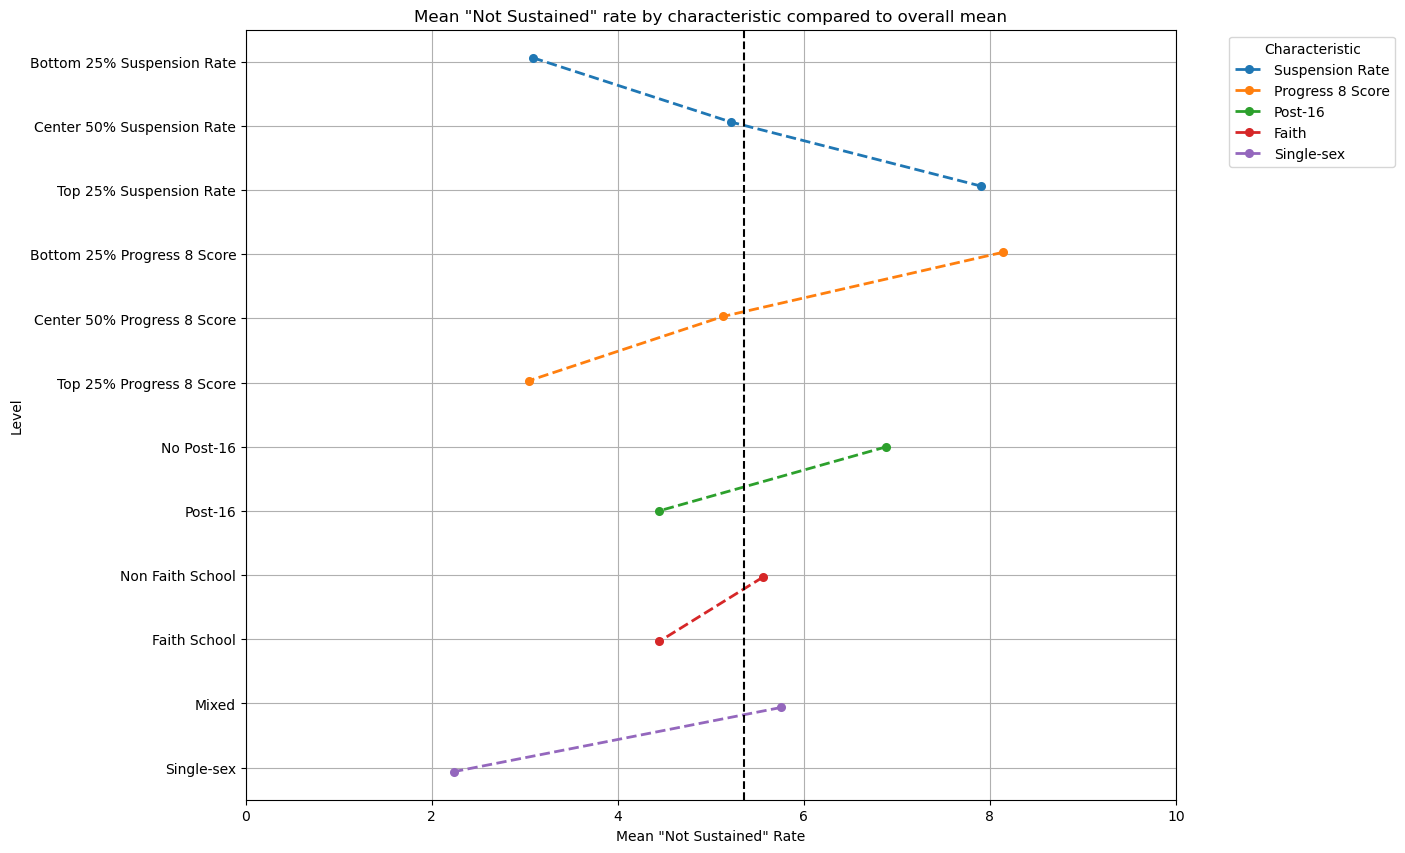

In [247]:
plt.figure(figsize=(12, 10))
sns.pointplot(data=mean_df, x='Mean Not Sustained Rate', y='Level', hue='Characteristic', 
              dodge=True, markers='o', linestyle='--', linewidth=2)

plt.axvline(x=ns_mean, color='black', linestyle='--') 

plt.xlim(0, 10)

plt.title('Mean "Not Sustained" rate by characteristic compared to overall mean')
plt.xlabel('Mean "Not Sustained" Rate')
plt.ylabel('Level')
plt.legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


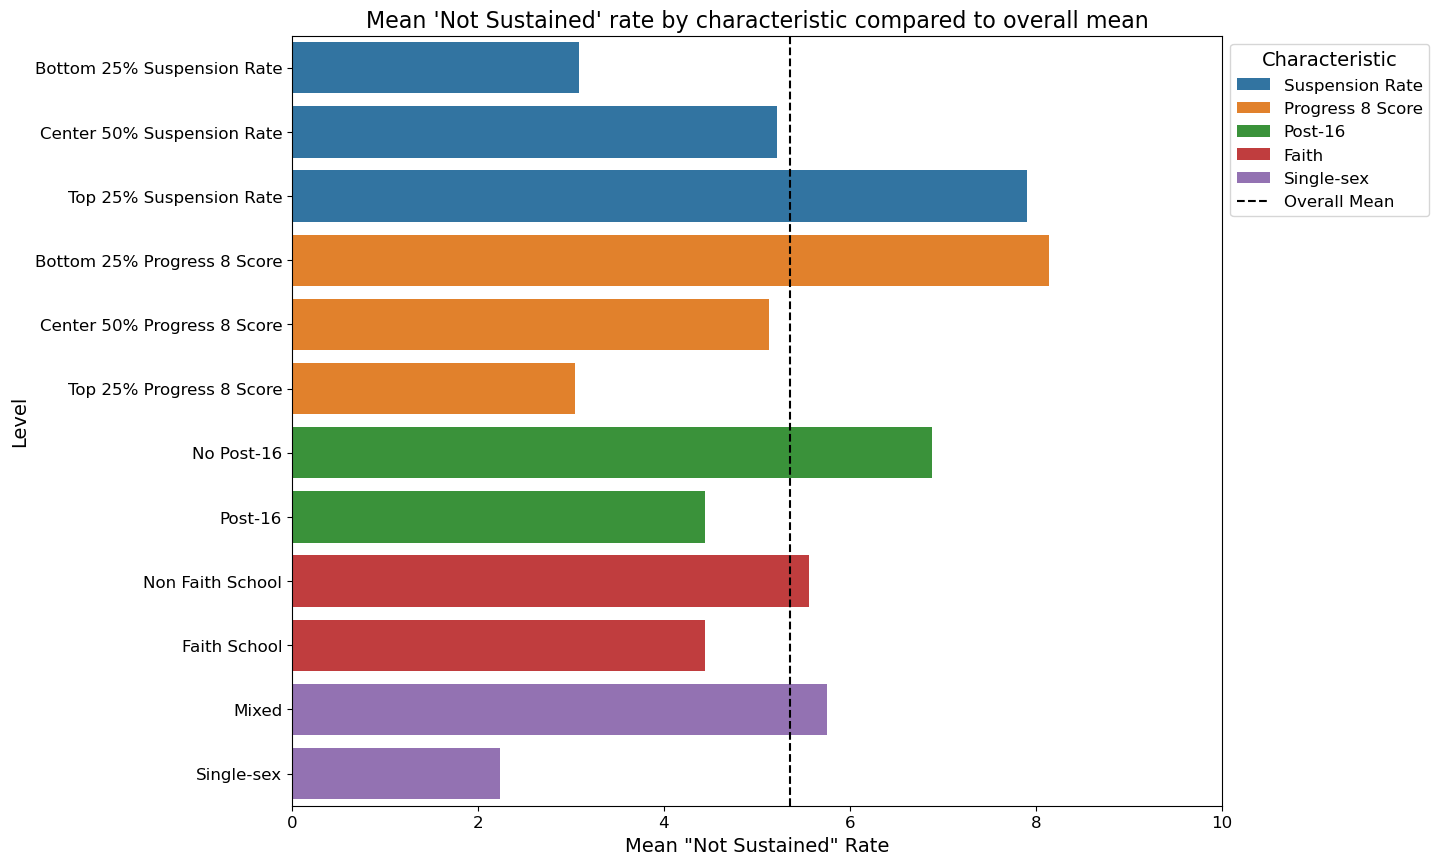

In [248]:
plt.figure(figsize=(12, 10))
sns.barplot(data=mean_df, x='Mean Not Sustained Rate', y='Level', hue='Characteristic', dodge=False)

plt.axvline(x=ns_mean, color='black', linestyle='--', label='Overall Mean') 

plt.xlim(0, 10)

plt.title("Mean 'Not Sustained' rate by characteristic compared to overall mean", fontsize=16)
plt.xlabel('Mean "Not Sustained" Rate', fontsize=14)
plt.ylabel('Level', fontsize=14)
plt.legend(title='Characteristic', bbox_to_anchor=(1.0, 1), loc='upper left', title_fontsize=14, fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)